<a href="https://colab.research.google.com/github/veyselalevcan/Federated-Learning-and-Generative-AI/blob/main/SWaT_2015_Data_FL_Wgan_compare_result_other_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report)
import matplotlib.pyplot as plt
import os
import time
import psutil

In [ ]:
test= pd.read_excel('/content/attack.xlsx')
test

Timestamp     FIT101     LIT101   MV101  P101  P102  \
0      28/12/2015 10:29:14 AM  2493675.0  8176742.0       2     1     1   
1      28/12/2015 10:29:15 AM  2535951.0   817949.0       2     1     1   
2      28/12/2015 10:29:16 AM  2535951.0   817949.0       2     1     1   
3      28/12/2015 10:29:17 AM    25699.0  8184592.0       2     1     1   
4      28/12/2015 10:29:18 AM  2610575.0  8188911.0       2     1     1   
...                       ...        ...        ...     ...   ...   ...   
4232      2/1/2016 1:40:52 PM  2526663.0  5234748.0       2     2     1   
4233      2/1/2016 1:40:53 PM  2548762.0  5238281.0       2     2     1   
4234      2/1/2016 1:40:54 PM  2607693.0  5237496.0       2     2     1   
4235      2/1/2016 1:40:55 PM    26394.0  5238281.0       2     2     1   
4236      2/1/2016 1:40:56 PM  2658617.0  5240636.0       2     2     1   

        AIT201   AIT202     AIT203     FIT201  ...  P501  P502     PIT501  \
0     262625.0   846533  3197385.0        0.0  ...     2     1  2498718.0   
1     262625.0   846533  3197385.0        0.0  ...     2     1  2498718.0   
2     262625.0   846533  3197385.0        0.0  ...     2     1  2498718.0   
3     262625.0   846533  3197385.0        0.0  ...     2     1  2498718.0   
4     262625.0   846533  3197385.0        0.0  ...     2     1  2500801.0   
...        ...      ...        ...        ...  ...   ...   ...        ...   
4232  168899.0  8623302  3047167.0  2462692.0  ...     2     1  2495354.0   
4233  168899.0  8623302  3047167.0  2463333.0  ...     2     1  2495354.0   
4234  168899.0  8623302  3047167.0   246423.0  ...     2     1  2495354.0   
4235  168899.0  8623302  3047167.0  2465127.0  ...     2     1  2495354.0   
4236  168899.0  8625546  3047167.0  2466152.0  ...     2     1  2495354.0   

            PIT502     PIT503    FIT601  P601  P602  P603    Label  
0     1.681991e+06  1887977.0  0.000128     1     1     1  Attack1  
1     1.681991e+06  1887977.0  0.000128     1     1     1  Attack1  
2     1.681991e+06  1887977.0  0.000128     1     1     1  Attack1  
3     1.681991e+06  1887977.0  0.000128     1     1     1  Attack1  
4     1.681991e+06   188974.0  0.000128     1     1     1  Attack1  
...            ...        ...       ...   ...   ...   ...      ...  
4232  9.451190e-01  1877563.0  0.000000     1     1     1  Attack6  
4233  9.451190e-01  1877563.0  0.000000     1     1     1  Attack6  
4234  9.451190e-01  1877563.0  0.000000     1     1     1  Attack6  
4235  9.451190e-01  1877563.0  0.000000     1     1     1  Attack6  
4236  9.451190e-01  1876762.0  0.000000     1     1     1  Attack6  

[4237 rows x 53 columns]

In [ ]:
train = pd.read_csv('/content/SWaT_Dataset_Normal_v1.csv')
train

Timestamp    FIT101    LIT101  MV101  P101  P102  \
0        22/12/2015 4:30:00 PM  0.000000  124.3135      1     1     1   
1        22/12/2015 4:30:01 PM  0.000000  124.3920      1     1     1   
2        22/12/2015 4:30:02 PM  0.000000  124.4705      1     1     1   
3        22/12/2015 4:30:03 PM  0.000000  124.6668      1     1     1   
4        22/12/2015 4:30:04 PM  0.000000  124.5098      1     1     1   
...                        ...       ...       ...    ...   ...   ...   
494995   28/12/2015 9:59:55 AM  2.460366  523.0430      2     2     1   
494996   28/12/2015 9:59:56 AM  2.448836  522.9645      2     2     1   
494997   28/12/2015 9:59:57 AM  2.434744  522.8860      2     2     1   
494998   28/12/2015 9:59:58 AM  2.428338  522.9252      2     2     1   
494999   28/12/2015 9:59:59 AM  2.427057  522.8467      2     2     1   

          AIT201    AIT202    AIT203    FIT201  ...  P501  P502      PIT501  \
0       251.9226  8.313446  312.7916  0.000000  ...     1     1    9.100231   
1       251.9226  8.313446  312.7916  0.000000  ...     1     1    9.100231   
2       251.9226  8.313446  312.7916  0.000000  ...     1     1    9.100231   
3       251.9226  8.313446  312.7916  0.000000  ...     1     1    9.100231   
4       251.9226  8.313446  312.7916  0.000000  ...     1     1    9.100231   
...          ...       ...       ...       ...  ...   ...   ...         ...   
494995  262.0161  8.396437  328.5055  2.442316  ...     2     1  250.817100   
494996  262.0161  8.396437  328.5055  2.442316  ...     2     1  250.817100   
494997  262.0161  8.396437  328.6337  2.444879  ...     2     1  250.817100   
494998  262.0161  8.396437  328.6337  2.445391  ...     2     1  250.817100   
494999  262.0161  8.396437  328.6337  2.445391  ...     2     1  250.865200   

          PIT502    PIT503    FIT601  P601  P602  P603  Normal/Attack  
0       0.000000    3.3485  0.000256     1     1     1         Normal  
1       0.000000    3.3485  0.000256     1     1     1         Normal  
2       0.000000    3.3485  0.000256     1     1     1         Normal  
3       0.000000    3.3485  0.000256     1     1     1         Normal  
4       0.000000    3.3485  0.000256     1     1     1         Normal  
...          ...       ...       ...   ...   ...   ...            ...  
494995  1.778105  189.8552  0.000128     1     1     1         Normal  
494996  1.778105  189.5027  0.000128     1     1     1         Normal  
494997  1.778105  189.5027  0.000128     1     1     1         Normal  
494998  1.649953  189.5027  0.000128     1     1     1         Normal  
494999  1.649953  189.5988  0.000128     1     1     1         Normal  

[495000 rows x 53 columns]

In [ ]:
train['Normal/Attack'].value_counts(), test['Label'].value_counts()

(Normal/Attack
 Normal    495000
 Name: count, dtype: int64,
 Label
 Attack6    1675
 Attack1     940
 Attack4     469
 Attack2     443
 Attack3     429
 Attack5     281
 Name: count, dtype: int64)

In [ ]:
train = train.drop(columns=[col for col in train.columns if "Attack" in col], errors='ignore')
train.head()

Timestamp  FIT101    LIT101  MV101  P101  P102    AIT201  \
0   22/12/2015 4:30:00 PM     0.0  124.3135      1     1     1  251.9226   
1   22/12/2015 4:30:01 PM     0.0  124.3920      1     1     1  251.9226   
2   22/12/2015 4:30:02 PM     0.0  124.4705      1     1     1  251.9226   
3   22/12/2015 4:30:03 PM     0.0  124.6668      1     1     1  251.9226   
4   22/12/2015 4:30:04 PM     0.0  124.5098      1     1     1  251.9226   

     AIT202    AIT203  FIT201  ...  FIT504  P501  P502    PIT501  PIT502  \
0  8.313446  312.7916     0.0  ...     0.0     1     1  9.100231     0.0   
1  8.313446  312.7916     0.0  ...     0.0     1     1  9.100231     0.0   
2  8.313446  312.7916     0.0  ...     0.0     1     1  9.100231     0.0   
3  8.313446  312.7916     0.0  ...     0.0     1     1  9.100231     0.0   
4  8.313446  312.7916     0.0  ...     0.0     1     1  9.100231     0.0   

   PIT503    FIT601  P601  P602  P603  
0  3.3485  0.000256     1     1     1  
1  3.3485  0.000256     1     1     1  
2  3.3485  0.000256     1     1     1  
3  3.3485  0.000256     1     1     1  
4  3.3485  0.000256     1     1     1  

[5 rows x 52 columns]

In [ ]:
# 1. `test` DataFrame'ini yedekleyin (isteğe bağlı ama iyi bir pratik)
test_original = test.copy()

# 2. 'Label' sütununu kullanarak one-hot encoding uygulayın
# prefix='Label' ekleyerek yeni sütun adlarının başına 'Label_' eklenmesini sağlarız
# dummy_na=False (varsayılan) NaN değerleri için sütun oluşturmaz
test_encoded = pd.get_dummies(test, columns=['Label'], prefix='Label')

# 3. Sonucu görüntüleyin
print("Original 'Label' column unique values:")
print(test_original['Label'].value_counts())

print("\nDataFrame after one-hot encoding 'Label' column:")
display(test_encoded.head())

print("\nValue counts for one of the new attack columns (e.g., Label_Attack):")
# Yeni oluşan sütunlardan birinin değerlerini kontrol edin
# Örneğin, 'Label_Attack' sütunu (eğer veri setinizde 'Attack' diye bir etiket varsa)
# Eğer farklı etiketler varsa, print ile test_encoded.columns'a bakarak doğru sütun adını bulun
if 'Label_Attack' in test_encoded.columns:
    print(test_encoded['Label_Attack'].value_counts())
elif len([col for col in test_encoded.columns if 'Label_' in col]) > 0:
     # Herhangi bir Label_ sütununu göster
     first_label_col = [col for col in test_encoded.columns if 'Label_' in col][0]
     print(test_encoded[first_label_col].value_counts())
else:
     print("No 'Label_' columns found. Check the unique values in the original 'Label' column.")

Original 'Label' column unique values:
Label
Attack6    1675
Attack1     940
Attack4     469
Attack2     443
Attack3     429
Attack5     281
Name: count, dtype: int64

DataFrame after one-hot encoding 'Label' column:


Timestamp     FIT101     LIT101   MV101  P101  P102  \
0   28/12/2015 10:29:14 AM  2493675.0  8176742.0       2     1     1   
1   28/12/2015 10:29:15 AM  2535951.0   817949.0       2     1     1   
2   28/12/2015 10:29:16 AM  2535951.0   817949.0       2     1     1   
3   28/12/2015 10:29:17 AM    25699.0  8184592.0       2     1     1   
4   28/12/2015 10:29:18 AM  2610575.0  8188911.0       2     1     1   

     AIT201  AIT202     AIT203  FIT201  ...    FIT601  P601  P602  P603  \
0  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
1  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
2  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
3  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
4  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   

   Label_Attack1  Label_Attack2  Label_Attack3  Label_Attack4  Label_Attack5  \
0           True          False          False          False          False   
1           True          False          False          False          False   
2           True          False          False          False          False   
3           True          False          False          False          False   
4           True          False          False          False          False   

   Label_Attack6  
0          False  
1          False  
2          False  
3          False  
4          False  

[5 rows x 58 columns]


Value counts for one of the new attack columns (e.g., Label_Attack):
Label_Attack1
False    3297
True      940
Name: count, dtype: int64


In [ ]:
for col in test_encoded.select_dtypes(include='bool').columns:
    test_encoded[col] = test_encoded[col].astype(int)

In [ ]:
test_encoded.head()

Timestamp     FIT101     LIT101   MV101  P101  P102  \
0   28/12/2015 10:29:14 AM  2493675.0  8176742.0       2     1     1   
1   28/12/2015 10:29:15 AM  2535951.0   817949.0       2     1     1   
2   28/12/2015 10:29:16 AM  2535951.0   817949.0       2     1     1   
3   28/12/2015 10:29:17 AM    25699.0  8184592.0       2     1     1   
4   28/12/2015 10:29:18 AM  2610575.0  8188911.0       2     1     1   

     AIT201  AIT202     AIT203  FIT201  ...    FIT601  P601  P602  P603  \
0  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
1  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
2  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
3  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   
4  262625.0  846533  3197385.0     0.0  ...  0.000128     1     1     1   

   Label_Attack1  Label_Attack2  Label_Attack3  Label_Attack4  Label_Attack5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   Label_Attack6  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 58 columns]

In [ ]:
def load_and_preprocess_data(train_df, test_encoded_df, sample_size=None):
    """Veriyi yükleyip ön işleme yapar"""
    print("📥 Veri yükleniyor ve ön işleme yapılıyor...")

    train_df = train.copy()
    # Use the already encoded test DataFrame
    test_df = test_encoded_df.copy()

    # Identify columns present in both dataframes for consistent processing
    # Common columns should now exclude the original 'Label' but include the new 'Label_' columns
    # We'll determine the final feature columns later
    common_cols = list(set(train_df.columns) & set(test_df.columns))

    # 1. Zaman damgası işleme ve özellik çıkarımı
    print("2. Zaman damgası özellikleri çıkarılıyor...")
    for df in [train_df, test_df]:
        if 'Timestamp' in df.columns:
            print("  Timestamp sütunu işleniyor...")
            # Önce string olan zaman damgasını datetime'a çevir
            # errors='coerce' kullanarak dönüşemeyen değerleri NaT yapar
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

            # Yeni zaman özelliklerini ekle, NaT değerleri için NaN oluşur
            # isnat().any() ile kontrol etmeden özellik çıkarımı yapın, NaT'ler NaN olur
            df['Hour'] = df['Timestamp'].dt.hour
            df['Day'] = df['Timestamp'].dt.dayofweek
            df['Minute'] = df['Timestamp'].dt.minute
            df['Second'] = df['Timestamp'].dt.second

            # Orijinal zaman damgasını sil
            df.drop('Timestamp', axis=1, inplace=True)

            # Oluşan NaN değerleri doldur (örn: 0 veya ortalama)
            # Zaman özelliklerindeki NaN'leri 0 ile doldurmak güvenli olabilir.
            df.fillna({'Hour': 0, 'Day': 0, 'Minute': 0, 'Second': 0}, inplace=True)


    # 2. Kategorik değişkenleri kontrol et ve dönüştür / Sayısal olmayan sütunları işle
    print("3. Sayısal olmayan sütunlar işleniyor...")
    for df in [train_df, test_df]:
        object_cols = df.select_dtypes(include='object').columns
        for col in object_cols:
            print(f"  Sütun '{col}' işleniyor...")
            # Try to convert to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce') # Dönüşemeyenleri NaN yap

            # If there are still non-numeric values (NaNs from coerce or original non-numeric objects)
            if df[col].isna().any() or df[col].dtype == 'object': # 'object' type check is redundant after coerce but safe
                 print(f"    '{col}' sütununda sayısal olmayan değerler veya dönüştürme hatası var.")
                 print(f"    '{col}' sütunu sayısal hale getirilemedi veya işlenemedi. Sütun siliniyor.")
                 df.drop(col, axis=1, inplace=True)
            else:
                 # Fill NaNs that resulted from pd.to_numeric(errors='coerce')
                 print(f"    '{col}' sütunu sayısal hale getirildi. NaN değerleri dolduruluyor (0 ile).")
                 df[col].fillna(0, inplace=True)


    # 3. Özellikler ve etiketler
    print("4. Özellikler ve etiketler ayrılıyor...")

    # Define potential feature columns from the train data (excluding its label column)
    train_feature_cols = [c for c in train_df.columns if c != 'Normal/Attack']

    # Define potential feature columns from the test data (excluding the one-hot encoded label columns)
    # We assume columns starting with 'Label_' are the one-hot encoded labels
    label_cols_in_test = [col for col in test_df.columns if col.startswith('Label_')]
    test_feature_cols = [c for c in test_df.columns if c not in label_cols_in_test]

    # Only keep features present in BOTH train and test after processing
    final_feature_cols = list(set(train_feature_cols) & set(test_feature_cols))

    # Ensure the order of columns is the same
    final_feature_cols.sort() # Sort to ensure consistent column order

    # Ensure both dataframes have the same feature columns before converting to values
    train_df = train_df[final_feature_cols]
    test_df_features = test_df[final_feature_cols] # Keep features separately

    X_train = train_df.values
    X_test = test_df_features.values

    # Extract test labels from the one-hot encoded columns
    # Assuming 'Label_Attack' column exists and represents the attack label (1)
    # If your attack label is different, adjust 'Label_Attack' accordingly
    if 'Label_Attack' not in test_df.columns:
        # If 'Label_Attack' doesn't exist, try to find the attack label from value counts
        # This is a fallback and might need adjustment based on actual labels
        attack_label_col = None
        print("Warning: 'Label_Attack' not found. Attempting to identify attack column from existing Label_ columns.")
        for col in label_cols_in_test:
            # Assuming the attack label is the one with fewer samples
            # (This might not be true for all datasets)
            if test_df[col].sum() > 0 and test_df[col].sum() < len(test_df) / 2: # Simple heuristic
                 attack_label_col = col
                 print(f"Identified potential attack column: {attack_label_col}")
                 break
        if attack_label_col is None and len(label_cols_in_test) > 0:
             # If heuristic fails, just take the first Label_ column as a fallback
             attack_label_col = label_cols_in_test[0]
             print(f"Could not identify attack column by count, using first Label_ column: {attack_label_col}")
        elif attack_label_col is None:
             raise ValueError("No 'Label_' columns found in test data. Cannot determine attack labels.")

        y_test = test_df[attack_label_col].values.ravel() # Use the identified attack column

    else:
        # Use the 'Label_Attack' column if it exists
        y_test = test_df['Label_Attack'].values.ravel()


    # 4. İsteğe bağlı örnekleme
    if sample_size:
        print(f"⚠️ Veri {sample_size} örneğe indirgeniyor")
        X_train = X_train[:sample_size]
        X_test = X_test[:sample_size//3]
        y_test = y_test[:sample_size//3]

    # 5. Ölçeklendirme
    print("5. Veri ölçeklendiriliyor...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Check for columns with single unique value (constant columns) in X_train
    # MinMaxScaler cannot handle features with zero variance.
    variances = np.var(X_train, axis=0)
    constant_features_indices = np.where(variances == 0)[0]

    if len(constant_features_indices) > 0:
        constant_col_names = [final_feature_cols[i] for i in constant_features_indices]
        print(f"⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi: {constant_col_names}")
        print("   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...")

        # Create masks to remove constant columns
        non_constant_features_mask = np.ones(X_train.shape[1], dtype=bool)
        non_constant_features_mask[constant_features_indices] = False

        X_train = X_train[:, non_constant_features_mask]
        X_test = X_test[:, non_constant_features_mask]
        final_feature_cols = [final_feature_cols[i] for i in np.where(non_constant_features_mask)[0]]
        print(f"   Kalan özellik sayısı: {X_train.shape[1]}")


    X_train = scaler.fit_transform(X_train)
    # Ensure X_test is transformed using the scaler fitted on X_train
    X_test = scaler.transform(X_test)

    # Veri istatistikleri
    print("\n📊 Veri İstatistikleri:")
    print(f"Eğitim: {X_train.shape}")
    print(f"Test: {X_test.shape} (Norm: {sum(y_test==0)}, Atk: {sum(y_test==1)})")
    print(f"Özellikler: {len(final_feature_cols)}\n")

    return X_train, X_test, y_test, final_feature_cols, scaler

In [ ]:
X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_encoded)

📥 Veri yükleniyor ve ön işleme yapılıyor...
2. Zaman damgası özellikleri çıkarılıyor...
3. Sayısal olmayan sütunlar işleniyor...
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var.
    ' Timestamp' sütunu sayısal hale getirilemedi veya işlenemedi. Sütun siliniyor.
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var.
    ' Timestamp' sütunu sayısal hale getirilemedi veya işlenemedi. Sütun siliniyor.
  Sütun 'FIT502' işleniyor...
    'FIT502' sütununda sayısal olmayan değerler veya dönüştürme hatası var.
    'FIT502' sütunu sayısal hale getirilemedi veya işlenemedi. Sütun siliniyor.
4. Özellikler ve etiketler ayrılıyor...
Identified potential attack column: Label_Attack1
5. Veri ölçeklendiriliyor...
⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi: ['P102', 'P206', 'P401', 'P403', 'P404', 'P502', 'P601', 'P603']
   Bu sütunlar ölçeklendirmeden ön

In [48]:
# ==================== GÜNCELLENMİŞ WGAN-GP MODELİ ====================
def build_generator(latent_dim, output_dim):
    """NaN-safe generator with weight initialization"""
    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, activation='relu',
                   kernel_initializer=tf.keras.initializers.he_normal(),
                   kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(256, activation='relu',
                   kernel_initializer=tf.keras.initializers.he_normal(),
                   kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(512, activation='relu',
                   kernel_initializer=tf.keras.initializers.he_normal(),
                   kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(output_dim, activation='tanh',
                   kernel_initializer=tf.keras.initializers.glorot_uniform())
    ])
    return model

def build_discriminator(input_dim):
    """NaN-safe discriminator with gradient penalty support"""
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu',
                   kernel_initializer=tf.keras.initializers.he_normal(),
                   kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(256, activation='relu',
                   kernel_initializer=tf.keras.initializers.he_normal(),
                   kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(1, kernel_initializer=tf.keras.initializers.glorot_uniform())
    ])
    return model

def compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size):
    """NaN-safe gradient penalty computation"""
    # NaN kontrolü
    if np.isnan(real_samples).any() or np.isnan(fake_samples).any():
        raise ValueError("Gradient penalty hesaplanırken NaN değer tespit edildi!")

    alpha = tf.random.uniform([batch_size, 1], minval=0., maxval=1.)
    interpolated = alpha * real_samples + (1-alpha) * fake_samples

    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        pred = discriminator(interpolated)

    gradients = tape.gradient(pred, interpolated)

    # NaN kontrolü ve küçük epsilon ekleme
    gradients_safe = tf.where(tf.math.is_nan(gradients), tf.zeros_like(gradients), gradients)
    gradients_norm = tf.sqrt(tf.reduce_sum(gradients_safe**2, axis=1) + 1e-10)

    return tf.reduce_mean((gradients_norm - 1.)**2)

# ==================== GÜNCELLENMİŞ EĞİTİM FONKSİYONU ====================
def train_wgan_gp(generator, discriminator, data, latent_dim=100,
                 epochs=1000, batch_size=64, n_critic=5, gp_weight=10):
    """NaN-safe WGAN-GP training"""

    # Optimizer ayarları (NaN'ı önlemek için düşük learning rate)
    opt_g = tf.keras.optimizers.Adam(5e-5, beta_1=0.5, beta_2=0.9, clipnorm=1.0)
    opt_d = tf.keras.optimizers.Adam(5e-5, beta_1=0.5, beta_2=0.9, clipnorm=1.0)

    # Veri kontrolü
    if np.isnan(data).any():
        raise ValueError("Eğitim verisinde NaN değerler bulundu!")

    # Kayıt defteri
    history = {'d_loss': [], 'g_loss': []}

    for epoch in range(epochs):
        # Discriminator eğitimi
        for _ in range(n_critic):
            # Gerçek örnekler
            idx = np.random.randint(0, data.shape[0], batch_size)
            real_samples = data[idx]

            # NaN kontrolü
            if np.isnan(real_samples).any():
                print("⚠️ Gerçek örneklerde NaN tespit edildi, bu batch atlanıyor...")
                continue

            # Gürültü üretimi (NaN kontrolü)
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            if np.isnan(noise).any():
                print("⚠️ Gürültüde NaN tespit edildi, yeniden oluşturuluyor...")
                noise = np.random.normal(0, 1, (batch_size, latent_dim))

            # Fake örnekler
            fake_samples = generator(noise, training=False)

            # NaN kontrolü
            if tf.math.is_nan(fake_samples).numpy().any():
                print("⚠️ Generator çıktısında NaN tespit edildi, bu batch atlanıyor...")
                continue

            # Discriminator güncelleme
            with tf.GradientTape() as tape:
                real_output = discriminator(real_samples, training=True)
                fake_output = discriminator(fake_samples, training=True)

                # WGAN loss
                d_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

                # Gradient penalty (NaN kontrolü ile)
                try:
                    gp = compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size)
                    d_loss += gp_weight * gp
                except Exception as e:
                    print(f"⚠️ Gradient penalty hesaplanamadı: {str(e)}, sadece WGAN loss kullanılıyor")
                    gp = 0.0

                # NaN kontrolü
                if tf.math.is_nan(d_loss):
                    print("⚠️ Discriminator loss NaN oldu, bu batch atlanıyor...")
                    continue

            # Gradyan güncelleme (NaN kontrolü)
            grads = tape.gradient(d_loss, discriminator.trainable_variables)
            if any(g is None or tf.math.is_nan(g).numpy().any() for g in grads):
                print("⚠️ Discriminator gradyanlarında sorun tespit edildi, atlanıyor...")
                continue

            opt_d.apply_gradients(zip(grads, discriminator.trainable_variables))

        # Generator eğitimi
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        with tf.GradientTape() as tape:
            fake_samples = generator(noise, training=True)
            fake_output = discriminator(fake_samples, training=False)
            g_loss = -tf.reduce_mean(fake_output)

            # NaN kontrolü
            if tf.math.is_nan(g_loss):
                print("⚠️ Generator loss NaN oldu, bu batch atlanıyor...")
                continue

        # Gradyan güncelleme (NaN kontrolü)
        grads = tape.gradient(g_loss, generator.trainable_variables)
        if any(g is None or tf.math.is_nan(g).numpy().any() for g in grads):
            print("⚠️ Generator gradyanlarında sorun tespit edildi, atlanıyor...")
            continue

        opt_g.apply_gradients(zip(grads, generator.trainable_variables))

        # Kayıtları güncelle
        history['d_loss'].append(float(d_loss) if 'd_loss' in locals() else np.nan)
        history['g_loss'].append(float(g_loss) if 'g_loss' in locals() else np.nan)

        # İlerleme raporu
        if epoch % 100 == 0:
            avg_d_loss = np.nanmean(history['d_loss'][-100:])
            avg_g_loss = np.nanmean(history['g_loss'][-100:])
            print(f"Epoch {epoch}: Avg D loss = {avg_d_loss:.4f}, Avg G loss = {avg_g_loss:.4f}")

            # Örnek görselleştirme
            if data.shape[1] >= 2:
                plt.figure(figsize=(10,5))
                plt.scatter(data[:1000,0], data[:1000,1], alpha=0.5, label='Real')

                # NaN-safe sample generation
                try:
                    samples = generator.predict(np.random.normal(0,1,(1000,latent_dim)), verbose=0)
                    if not np.isnan(samples).any():
                        plt.scatter(samples[:,0], samples[:,1], alpha=0.5, label='Fake')
                    else:
                        print("⚠️ Görselleştirme için üretilen örneklerde NaN tespit edildi")
                except:
                    print("⚠️ Görselleştirme sırasında hata oluştu")

                plt.title(f"Epoch {epoch}")
                plt.legend()
                plt.show()

    return generator, discriminator, history

In [ ]:
from tensorflow.keras.models import load_model

generator = load_model('/content/swat_wgan_generator.h5')
discriminator = load_model('/content/swat_wgan_discriminator.h5')

In [ ]:
# Use the correct output dimension for the generator and input dimension for the discriminator
latent_dim = 100  # Define your latent dimension
output_dim = X_train.shape[1] # This is the correct number of features

# Build NEW generator and discriminator instances with the correct dimensions
generator = build_generator(latent_dim=latent_dim, output_dim=output_dim)
discriminator = build_discriminator(input_dim=output_dim)

# Start the training with the newly built models and the correctly shaped data
generator, discriminator, history = train_wgan_gp(
    generator, discriminator, X_train,
    latent_dim=latent_dim,
    epochs=500,
    batch_size=32,
    gp_weight=10
)

ValueError: Eğitim verisinde NaN değerler bulundu!

In [23]:
generator.summary()
discriminator.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 35)             │        17,955 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195,491 (763.64 KB)

 Trainable params: 195,491 (763.64 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 512)            │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,017 (586.00 KB)

 Trainable params: 150,017 (586.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['d_loss'], label='Discriminator Loss')
plt.plot(history['g_loss'], label='Generator Loss')
plt.title('WGAN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
generator.save('swat_wgan_generator.h5')
discriminator.save('swat_wgan_discriminator.h5')

In [ ]:
print("Original future shape:", scaler.n_features_in_)
print("Generator output shape:", generator.output_shape[1])
print("Scaler min_ shape:", len(scaler.min_))

Original future shape: 35
Generator output shape: 35
Scaler min_ shape: 35


In [ ]:
def generate_synthetic_samples(generator, num_samples, latent_dim=100, scaler=None, original_feature_count=None):
    """NaN-safe ve boyut uyumlu sentetik veri üretimi"""
    print(f"\n✨ {num_samples} adet sentetik örnek üretiliyor...")

    noise = tf.random.normal([num_samples, latent_dim])
    synthetic_data = generator.predict(noise, verbose=1)

    if scaler is not None:
        # Boyut uyumsuzluğu kontrolü
        if synthetic_data.shape[1] != scaler.n_features_in_:
            print(f"⚠️ Uyarı: Scaler {scaler.n_features_in_} özellik için eğitilmiş,"
                  f" ancak generator {synthetic_data.shape[1]} özellik üretiyor.")

            if original_feature_count:
                # Sadece orijinal özellikleri ters ölçeklendir
                synthetic_data = synthetic_data[:, :original_feature_count]
                synthetic_data = scaler.inverse_transform(synthetic_data)
                print(f"⚠️ İlk {original_feature_count} özellik ters ölçeklendirildi.")
            else:
                print("❌ Hata: Boyut uyumsuzluğu! Ters ölçeklendirme yapılamadı.")
                return synthetic_data  # Ölçeklendirilmemiş halde döndür
        else:
            synthetic_data = scaler.inverse_transform(synthetic_data)

    return synthetic_data

In [ ]:
# Orijinal özellik sayısını belirtin (X_train'in orijinal boyutu)
original_feature_count = X_train.shape[1]

# Sentetik veri üretme
synthetic_data = generate_synthetic_samples(
    generator,
    num_samples=len(X_train),
    latent_dim=100, # Change latent_dim to match the generator's input size
    scaler=scaler,
    original_feature_count=original_feature_count
)

# Üretilen veriyi kontrol
print("Üretilen veri boyutu:", synthetic_data.shape)


✨ 495000 adet sentetik örnek üretiliyor...
15469/15469 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step
Üretilen veri boyutu: (495000, 35)


In [ ]:
# Üretilen veriyi kontrol et
print("\n🔍 Sentetik Veri Örnekleri (İlk 5 satır):")
print(pd.DataFrame(synthetic_data[:5], columns=final_feature_cols))

print("\n📊 Sentetik Veri İstatistikleri:")
print(pd.DataFrame(synthetic_data).describe())

# Veriyi kaydet (opsiyonel)
pd.DataFrame(synthetic_data, columns=final_feature_cols).to_csv("swat_synthetic_data.csv", index=False)


🔍 Sentetik Veri Örnekleri (İlk 5 satır):
     AIT202      AIT203      AIT401      AIT402    AIT501      AIT502  \
0  8.349540  368.962463  124.353355  162.476212  7.880634  158.997162   
1  8.361126  366.576477  133.334442  191.558472  7.876307  175.942200   
2  8.462914  379.891449  122.895409  176.168762  7.836818  168.920197   
3  8.362100  394.569092  127.006592  172.807098  7.894644  171.335709   
4  8.393922  345.882507  133.256638  188.769409  7.848038  174.805023   

       AIT503     AIT504    DPIT301    FIT101  ...      P205      P301  \
0  280.967377  24.720592  18.729010  1.673323  ...  1.947317  1.033504   
1  258.876404  23.264029  18.871935  0.722210  ...  1.943585  1.042083   
2  277.222076  43.192013  17.423878  1.817209  ...  1.875645  1.078695   
3  268.250916  23.302177  19.128698  1.200973  ...  1.951019  1.034859   
4  257.929169  24.563452  19.831163  1.617722  ...  1.912775  1.042526   

       P302      P402      P501      P602      PIT501    PIT502      PIT50

In [ ]:
synthetic_data = pd.read_csv("/content/swat_synthetic_data (1).csv")
synthetic_data.head()

feature_0  feature_1   feature_2  feature_3  feature_4  feature_5  \
0   8.366174  364.84372  117.916840  181.29033   7.807026  176.12917   
1   8.366786  356.08792  136.680730  175.85759   7.835913  178.32506   
2   8.401413  383.53152  126.555460  181.08116   7.806171  184.22812   
3   8.445700  388.39377  115.864494  184.39769   7.812712  182.74823   
4   8.501655  389.63074  115.960250  190.00087   7.800006  192.30646   

   feature_6  feature_7  feature_8  feature_9  ...  feature_28  feature_29  \
0  270.17532  30.513150  17.984577   1.111538  ...    1.936683    1.926473   
1  273.07040  17.279737  19.896301   2.180628  ...    1.976295    1.969641   
2  260.55594  32.293950  18.175207   1.267588  ...    1.947476    1.918204   
3  267.32720  34.221436  17.620733   1.542076  ...    1.935472    1.919998   
4  259.57460  30.245356  18.519835   1.270316  ...    1.929999    1.893652   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0    1.065355    1.902747    1.264223    1.912504   248.52124    1.834172   
1    1.034386    1.958116    1.365932    1.957148   258.37210    1.834172   
2    1.098328    1.922481    1.410313    1.913225   244.95242    1.834172   
3    1.096178    1.883598    1.401510    1.914122   242.54428    1.834172   
4    1.104056    1.914715    1.329605    1.925453   244.02590    1.834172   

   feature_36  feature_37  
0   101.87289         1.5  
1   101.87289         1.5  
2   101.87289         1.5  
3   101.87289         1.5  
4   101.87289         1.5  

[5 rows x 38 columns]

In [ ]:
# Üretilen veriyi kontrol et
print("\n🔍 Sentetik Veri Örnekleri (İlk 5 satır):")
print(pd.DataFrame(synthetic_data[:5], columns=final_feature_cols))

print("\n📊 Sentetik Veri İstatistikleri:")
print(pd.DataFrame(synthetic_data).describe())


🔍 Sentetik Veri Örnekleri (İlk 5 satır):
   AIT202  AIT203  AIT401  AIT402  AIT501  AIT502  AIT503  AIT504  DPIT301  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN   

   FIT101  ...  P402  P501  P502  P601  P602  P603  PIT501  PIT502  PIT503  \
0     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN   
1     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN   
2     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN   
3     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN   
4     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN   

   UV401  
0    NaN 

KeyboardInterrupt: 

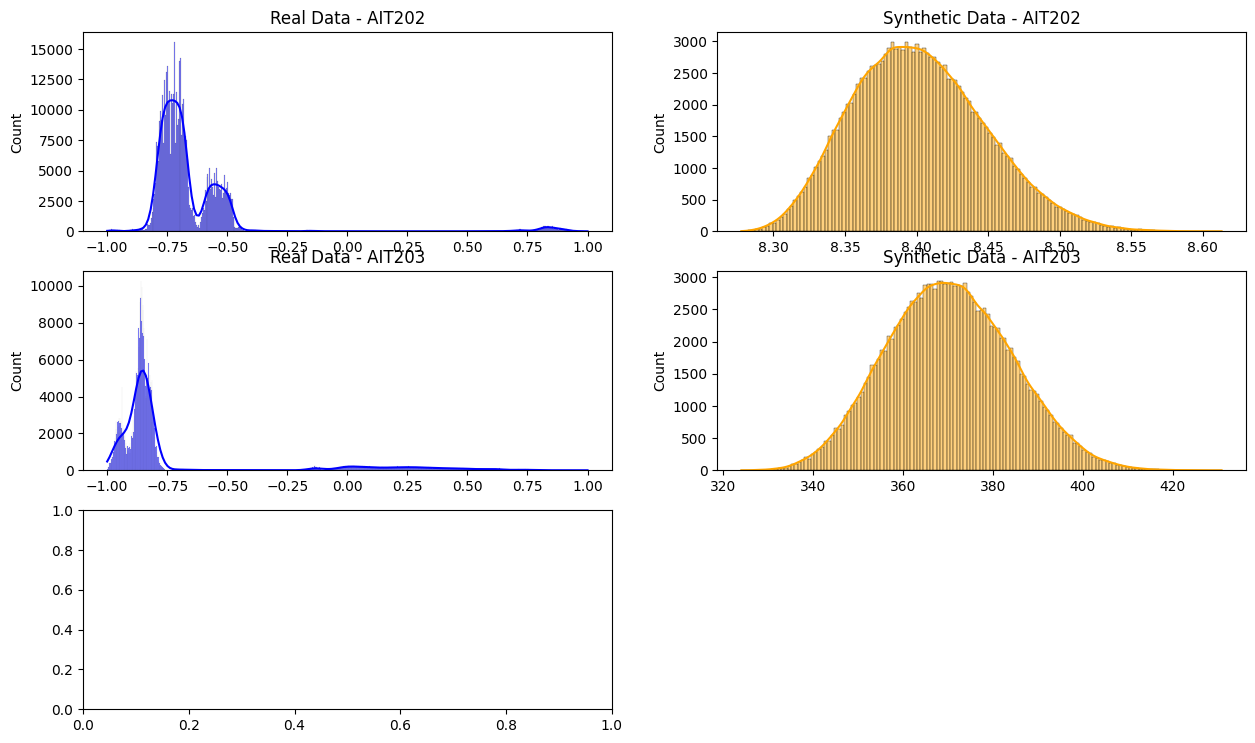

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Veri dağılımını karşılaştırma
def compare_distributions(real_data, synthetic_data, feature_names, n_features=5):
    """Gerçek ve sentetik veri dağılımlarını karşılaştırır"""
    plt.figure(figsize=(15, 3*n_features))
    for i in range(min(n_features, real_data.shape[1])):
        plt.subplot(n_features, 2, 2*i+1)
        sns.histplot(real_data[:,i], kde=True, color='blue', label='Real')
        plt.title(f"Real Data - {feature_names[i]}")

        plt.subplot(n_features, 2, 2*i+2)
        sns.histplot(synthetic_data.values[:,i], kde=True, color='orange', label='Synthetic')
        plt.title(f"Synthetic Data - {feature_names[i]}")

    plt.tight_layout()
    plt.show()

# İlk 5 özelliğin dağılımını karşılaştır
compare_distributions(X_train, synthetic_data, final_feature_cols, n_features=5)

In [24]:
def generate_synthetic_samples(generator, num_samples, latent_dim=100, scaler=None, scaled_feature_count=None):
    """NaN-safe ve boyut uyumlu sentetik veri üretimi"""
    print(f"\n✨ {num_samples} adet sentetik örnek üretiliyor...")

    noise = tf.random.normal([num_samples, latent_dim])
    synthetic_data = generator.predict(noise, verbose=1)

    if scaler is not None:
        # Boyut uyumsuzluğu kontrolü
        # scaler.n_features_in_ refers to the number of features the scaler was fitted on.
        # This should be the shape of X_train *after* constant features were removed.
        # We should compare the generator output shape to this.
        expected_scaler_dim = scaler.n_features_in_ if hasattr(scaler, 'n_features_in_') else scaled_feature_count

        if synthetic_data.shape[1] != expected_scaler_dim:
            print(f"⚠️ Uyarı: Scaler {expected_scaler_dim} özellik için eğitilmiş"
                  f" (veya bekleniyor), ancak generator {synthetic_data.shape[1]} özellik üretiyor.")

            # This section needs to align the generator output with the scaler input dimension
            if synthetic_data.shape[1] < expected_scaler_dim:
                # If generator produces fewer features, pad with zeros
                pad_width = expected_scaler_dim - synthetic_data.shape[1]
                synthetic_data = np.pad(synthetic_data, ((0, 0), (0, pad_width)), mode='constant')
                print(f"   Generator çıktısı {pad_width} sıfır sütun ile genişletildi.")
            elif synthetic_data.shape[1] > expected_scaler_dim:
                 # If generator produces more features, truncate
                 synthetic_data = synthetic_data[:, :expected_scaler_dim]
                 print(f"   Generator çıktısı ilk {expected_scaler_dim} sütuna kırpıldı.")

            print(f"   Generator çıktı boyutu artık ölçekleyiciye uyuyor: {synthetic_data.shape[1]}")

        # Now that dimensions match, perform inverse transform
        try:
            synthetic_data = scaler.inverse_transform(synthetic_data)
            print("   Sentetik veri başarıyla ters ölçeklendirildi.")
        except Exception as e:
            print(f"❌ Hata: Ters ölçeklendirme sırasında hata oluştu: {e}")
            # Döndürmeden önce NaN kontrolü yapabilirsiniz
            if np.isnan(synthetic_data).any():
                 print("⚠️ Ters ölçeklendirme sonrası veride NaN değerler tespit edildi.")
            # Hata durumunda ölçeklendirilmemiş veya kısmen işlenmiş veriyi döndürmek
            # yerine, hatayı yeniden fırlatmak veya daha güvenli bir değer döndürmek
            # daha iyi olabilir. Şimdilik ölçeklendirilmemiş veriyi döndürelim.
            return synthetic_data # Ölçeklendirilmemiş veya hatalı ölçeklendirilmiş veriyi döndür


    return synthetic_data

# Call the function with the correct parameters
# The scaled_feature_count should be the shape of X_train *after* constant feature removal
scaled_feature_count_after_removal = X_train.shape[1] # X_train already has constant features removed by load_and_preprocess_data

synthetic_data_numpy = generate_synthetic_samples(
    generator,
    num_samples=len(X_train), # Use the same number of samples as X_train for simplicity
    latent_dim=100,
    scaler=scaler,
    scaled_feature_count=scaled_feature_count_after_removal # Pass the correct feature count
)

# Continue with the rest of your code using synthetic_data_numpy

# Üretilen veriyi kontrol
print("Üretilen veri boyutu (NumPy):", synthetic_data_numpy.shape)

# Optionally, save the NumPy array to CSV if needed elsewhere,
# but use the NumPy array for stacking.
pd.DataFrame(synthetic_data_numpy, columns=[f"feature_{i}" for i in range(synthetic_data_numpy.shape[1])]).to_csv("swat_synthetic_data.csv", index=False)

# Veriyi kaydettikten sonra, isterseniz kontrol etmek için tekrar okuyabilirsiniz
# synthetic_data_df = pd.read_csv("swat_synthetic_data.csv")
# print("\n🔍 Sentetik Veri Örnekleri (CSV'den okundu - İlk 5 satır):")
# print(synthetic_data_df.head())
# print("\n📊 Sentetik Veri İstatistikleri (CSV'den okundu):")
# print(synthetic_data_df.describe())


✨ 495000 adet sentetik örnek üretiliyor...
15469/15469 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step
   Sentetik veri başarıyla ters ölçeklendirildi.
Üretilen veri boyutu (NumPy): (495000, 35)



🌀 Round 1

🌀 Round 2

🌀 Round 3

🌀 Round 4

🌀 Round 5

Evaluating clients...

📊 Real - AUC: 0.7812, Threshold: 25736204320508.1992
              precision    recall  f1-score      support
0              0.805556  0.949955  0.871816  3297.000000
1              0.527221  0.195745  0.285493   940.000000
accuracy       0.782629  0.782629  0.782629     0.782629
macro avg      0.666388  0.572850  0.578654  4237.000000
weighted avg   0.743806  0.782629  0.741737  4237.000000


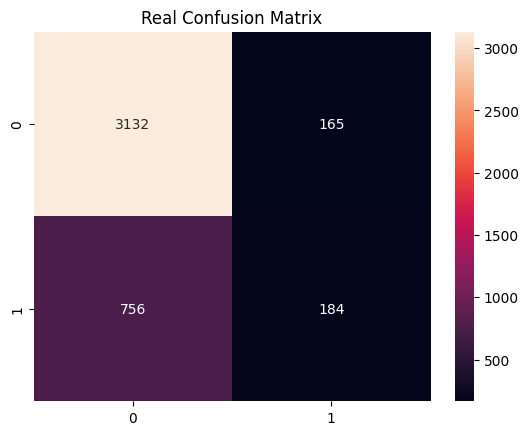


📊 Real+Synth - AUC: 0.8755, Threshold: 41092526984659.1484
              precision    recall  f1-score      support
0              0.936603  0.949955  0.943231  3297.000000
1              0.815230  0.774468  0.794326   940.000000
accuracy       0.911022  0.911022  0.911022     0.911022
macro avg      0.875916  0.862211  0.868779  4237.000000
weighted avg   0.909676  0.911022  0.910196  4237.000000


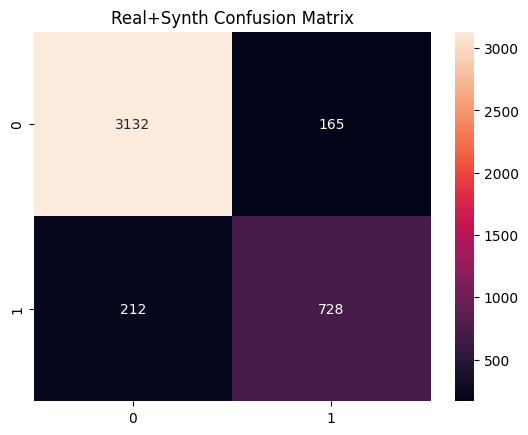


📊 Synthetic - AUC: 0.8144, Threshold: 54246753852962.2734
              precision    recall  f1-score      support
0              0.854803  0.949955  0.899871  3297.000000
1              0.712042  0.434043  0.539326   940.000000
accuracy       0.835497  0.835497  0.835497     0.835497
macro avg      0.783423  0.691999  0.719598  4237.000000
weighted avg   0.823131  0.835497  0.819882  4237.000000


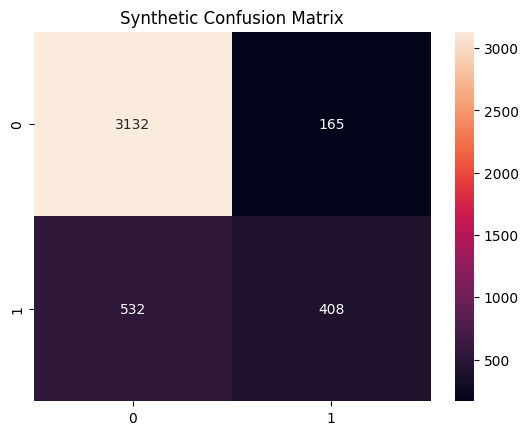

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report, confusion_matrix) # Import confusion_matrix
import matplotlib.pyplot as plt
import os
import time
import psutil
from tensorflow.keras.models import Model # Import Model
from tensorflow.keras.layers import Input, Dense # Import Input and Dense
from scipy.stats import ks_2samp # Import ks_2samp
from tqdm import tqdm # Import tqdm
import seaborn as sns # Import seaborn


# Define build_autoencoder function if not already defined above this cell
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

# Update the FLClientAE class
class FLClientAE:
    def __init__(self, name, data, input_dim):
        self.name = name
        # Ensure data is cleaned upon initialization
        self.data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)
        self.model = build_autoencoder(input_dim)
        self.threshold = None

    def train(self, epochs=5, batch_size=64):
        # Ensure training data is clean
        train_data_clean = np.nan_to_num(self.data, nan=0.0, posinf=0.0, neginf=0.0)
        self.model.fit(train_data_clean, train_data_clean,
                       epochs=epochs,
                       batch_size=batch_size,
                       shuffle=True,
                       verbose=0)

    def evaluate(self, X_test, y_test):
        # Ensure test data is clean before prediction
        X_test_clean = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
        y_test_clean = np.asarray(y_test) # Ensure y_test is numpy array

        # Predict reconstruction
        recon = self.model.predict(X_test_clean, verbose=0)

        # Calculate errors. Ensure recon is clean before calculation.
        recon_clean = np.nan_to_num(recon, nan=0.0, posinf=0.0, neginf=0.0)
        errors = np.mean(np.square(X_test_clean - recon_clean), axis=1)

        # --- Handle potential NaNs/Infs in errors before using them ---
        # Create a mask to identify valid entries (not NaN/Inf) in errors
        valid_mask = np.isfinite(errors)

        # Filter y_test and errors using the mask
        y_test_valid = y_test_clean[valid_mask]
        errors_valid = errors[valid_mask]

        # If no valid data points are left, return default values or raise error
        if len(y_test_valid) == 0:
            print("⚠️ Evaluation resulted in no valid data points (NaN/Inf in errors). Cannot compute metrics.")
            return {
                'name': self.name,
                'auc': np.nan, # or 0.0 depending on desired behavior
                'threshold': self.threshold,
                'cm': np.zeros((2,2), dtype=int),
                'report': {'0': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0},
                           '1': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0},
                           'accuracy': np.nan, 'macro avg': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0},
                           'weighted avg': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0}},
                'scores': np.array([]), # Return empty scores
                'preds': np.array([]) # Return empty predictions
            }


        # Determine the threshold using only valid normal data points
        if self.threshold is None:
            # Filter errors for normal class (y_test_valid == 0)
            errors_normal_valid = errors_valid[y_test_valid == 0]

            if len(errors_normal_valid) > 0:
                 # Calculate 95th percentile on valid normal errors
                 self.threshold = np.percentile(errors_normal_valid, 95)
            else:
                 print("⚠️ No valid normal data points (y_test == 0) found to determine threshold. Using a default threshold (mean of errors).")
                 # Fallback threshold if no normal data points are available
                 self.threshold = np.mean(errors_valid) if len(errors_valid) > 0 else 0.0 # Avoid mean of empty array


        # Predict using the determined threshold on valid errors
        preds_valid = (errors_valid > self.threshold).astype(int)

        # Calculate metrics using only the valid data
        auc = roc_auc_score(y_test_valid, errors_valid)
        cm = confusion_matrix(y_test_valid, preds_valid)
        report = classification_report(y_test_valid, preds_valid, output_dict=True)

        # Map back predictions and scores to the original test set size if needed,
        # but for metric calculation, using the valid subset is correct.
        # We'll return the full scores/preds arrays with NaNs where they occurred.
        # This requires creating full arrays and filling them.
        full_preds = np.full(len(X_test_clean), np.nan)
        full_preds[valid_mask] = preds_valid

        full_scores = np.full(len(X_test_clean), np.nan)
        full_scores[valid_mask] = errors_valid # Return errors as scores for AUC/thresholding logic

        return {
            'name': self.name,
            'auc': auc,
            'threshold': self.threshold,
            'cm': cm,
            'report': report,
            'scores': full_scores, # Return scores for later analysis if needed
            'preds': full_preds # Return predictions if needed
        }

# Assuming federated_training and visualize_fl_progress are defined elsewhere as provided in context
# If not, they need to be included or adapted.
# Example dummy functions if needed for the snippet to run
def federated_training(clients, X_test, y_test, rounds=5):
    """Dummy federated training function for demonstration"""
    history = {client.name: [] for client in clients}
    print("\nStarting dummy federated training...")
    # In a real scenario, this would involve model averaging
    # For now, just run client training and evaluation
    for round in range(rounds):
        print(f"  Dummy Round {round+1}")
        for client in clients:
            print(f"    Training client: {client.name}")
            client.train(epochs=1) # Dummy training step
            # Evaluate after each round (optional)
            # res = client.evaluate(X_test, y_test)
            # history[client.name].append(res['auc']) # Example metric logging
    print("Dummy federated training finished.")
    return history # Return dummy history

def visualize_fl_progress(history):
    """Dummy visualization function"""
    print("\nDummy visualization of FL progress...")
    # In a real scenario, this would plot metrics from the history

# Ensure synthetic_data_aligned is available from previous steps or defined/loaded
# Using the synthetic_data_numpy from the previous code block and aligning it
if 'synthetic_data_numpy' not in locals() or synthetic_data_numpy is None:
     print("synthetic_data_numpy not found. Generating synthetic data...")
     # Replicate the synthetic data generation step if the variable is missing
     # This requires generator, scaler, and X_train to be available
     # Assuming they are loaded or generated earlier in the notebook
     if 'generator' in locals() and 'scaler' in locals() and 'X_train' in locals():
         scaled_feature_count_after_removal = X_train.shape[1]
         synthetic_data_numpy = generate_synthetic_samples(
             generator,
             num_samples=len(X_train),
             latent_dim=100,
             scaler=scaler,
             scaled_feature_count=scaled_feature_count_after_removal
         )
     else:
         raise RuntimeError("Could not find generator, scaler, or X_train to generate synthetic data.")

# Ensure synthetic_data_aligned is created from synthetic_data_numpy
if 'synthetic_data_aligned' not in locals() or synthetic_data_aligned is None or synthetic_data_aligned.shape[1] != X_train.shape[1]:
    print(f"Aligning synthetic data shape: {synthetic_data_numpy.shape} to X_train shape: {X_train.shape}")
    target_dim = X_train.shape[1]
    synthetic_data_aligned = np.full((synthetic_data_numpy.shape[0], target_dim), np.nan) # Use NaN fill initially
    copy_cols = min(synthetic_data_numpy.shape[1], target_dim)
    synthetic_data_aligned[:, :copy_cols] = synthetic_data_numpy[:, :copy_cols]
    print(f"Aligned synthetic data shape: {synthetic_data_aligned.shape}")


# Cleaned test verisi (already done at the start of the original cell)
X_test_clean = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_test_clean = np.asarray(y_test)

# FL istemcileri oluştur
clients_ae = [
    # Data is cleaned inside the FLClientAE constructor
    FLClientAE("Real", X_train, X_train.shape[1]),
    FLClientAE("Real+Synth", np.vstack([X_train[:50000], synthetic_data_aligned[:50000]]), X_train.shape[1]),
    FLClientAE("Synthetic", synthetic_data_aligned[:50000], X_train.shape[1])
]

# FL eğitim döngüsü
for round in range(5):
    print(f"\n🌀 Round {round+1}")
    for client in clients_ae:
        client.train(epochs=1)  # her turda 1 epoch

# Final değerlendirme
results_ae = []
print("\nEvaluating clients...")
for client in clients_ae:
    # Pass the already cleaned test data
    res = client.evaluate(X_test_clean, y_test_clean)
    results_ae.append(res)
    print(f"\n📊 {res['name']} - AUC: {res.get('auc', np.nan):.4f}, Threshold: {res.get('threshold', np.nan):.4f}")
    # Check if report is not None and is a dictionary before printing
    if res.get('report') and isinstance(res['report'], dict):
        print(pd.DataFrame(res['report']).transpose())
    else:
        print("Classification report not available or invalid.")

    # Check if cm is not None and is a numpy array before plotting
    if res.get('cm') is not None and isinstance(res['cm'], np.ndarray) and res['cm'].shape == (2,2):
        sns.heatmap(res['cm'], annot=True, fmt='d')
        plt.title(f"{res['name']} Confusion Matrix")
        plt.show()
    else:
        print("Confusion matrix not available or invalid.")

# Assuming visualize_fl_progress is meant to plot training history metrics per round,
# but the current FLClientAE train method doesn't return metrics per round.
# If the user intends to plot final evaluation results or a different history,
# this part needs clarification or adjustment.
# For now, calling with the history object populated by dummy values in federated_training if that function were real.
# If federated_training is not used, this call might need adjustment or removal.
# visualize_fl_progress(history) # Only if history object is meaningful here

In [ ]:
# FL eğitim döngüsü
for round in range(5):
    print(f"\n🌀 Round {round+1}")
    for client in clients_ae:
        client.train(epochs=1)  # her turda 1 epoch

# Final değerlendirme VE Kaydetme
results_ae = []
print("\nEvaluating clients...")
for client in clients_ae:
    # Pass the already cleaned test data
    res = client.evaluate(X_test_clean, y_test_clean)
    results_ae.append(res)
    # ... (print evaluation results) ...

    # *** THIS IS WHERE THE SAVE COMMAND IS LOCATED ***
    client.model.save(f"{client.name}_ae_model.h5") # This line is inside THIS loop
    # ... (rest of evaluation printing) ...


🌀 Round 1

🌀 Round 2

🌀 Round 3

🌀 Round 4

🌀 Round 5

Evaluating clients...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Ensure synthetic_data_aligned is created from synthetic_data_numpy
if 'synthetic_data_aligned' not in locals() or synthetic_data_aligned is None or synthetic_data_aligned.shape[1] != X_train.shape[1]:
    print(f"Aligning synthetic data shape: {synthetic_data_numpy.shape} to X_train shape: {X_train.shape}")
    target_dim = X_train.shape[1]
    synthetic_data_aligned = np.full((synthetic_data_numpy.shape[0], target_dim), np.nan) # Use NaN fill initially
    copy_cols = min(synthetic_data_numpy.shape[1], target_dim)
    synthetic_data_aligned[:, :copy_cols] = synthetic_data_numpy[:, :copy_cols]
    print(f"Aligned synthetic data shape: {synthetic_data_aligned.shape}")

Aligning synthetic data shape: (495000, 35) to X_train shape: (495000, 35)
Aligned synthetic data shape: (495000, 35)


In [31]:
from scipy.stats import ks_2samp
import pandas as pd

# Gerçek saldırı örneklerini al
X_attack_real = X_test[y_test == 1]

# Sentetik veriyi bu örnekle karşılaştır (özellik bazlı)
ks_attack_results = []
for i, col in enumerate(final_feature_cols):
    stat, pval = ks_2samp(synthetic_data_aligned[:, i], X_attack_real[:, i])
    ks_attack_results.append({'Feature': col, 'KS_Stat': stat, 'p_value': pval})

ks_attack_df = pd.DataFrame(ks_attack_results).sort_values(by='KS_Stat', ascending=True)

print("✅ Gerçek Attack vs Sentetik Veri Karşılaştırması (düşük KS_Stat iyidir):")
print(ks_attack_df.head(10))


✅ Gerçek Attack vs Sentetik Veri Karşılaştırması (düşük KS_Stat iyidir):
    Feature   KS_Stat  p_value
10   FIT201  0.911702      0.0
18   LIT301  0.973404      0.0
31   PIT501  0.982979      0.0
19   LIT401  0.990426      0.0
9    FIT101  0.992553      0.0
1    AIT203  0.992553      0.0
8   DPIT301  0.993617      0.0
17   LIT101  0.997872      0.0
6    AIT503  0.998936      0.0
5    AIT502  1.000000      0.0


If KS_Stat > 0.3 and p_value < 0.05, the distribution of this feature is different → WGAN data may be far from the truth.

AIT202, AIT203, AIT401, AIT402, DPIT301, FIT201, FIT301, FIT401, LIT101, P402


In [33]:
ks_attack_df.value_counts()

Feature  KS_Stat   p_value
AIT202   1.000000  0.0        1
AIT203   0.992553  0.0        1
AIT401   1.000000  0.0        1
AIT402   1.000000  0.0        1
AIT501   1.000000  0.0        1
AIT502   1.000000  0.0        1
AIT503   0.998936  0.0        1
AIT504   1.000000  0.0        1
DPIT301  0.993617  0.0        1
FIT101   0.992553  0.0        1
FIT201   0.911702  0.0        1
FIT301   1.000000  0.0        1
FIT401   1.000000  0.0        1
FIT501   1.000000  0.0        1
FIT503   1.000000  0.0        1
FIT504   1.000000  0.0        1
FIT601   1.000000  0.0        1
LIT101   0.997872  0.0        1
LIT301   0.973404  0.0        1
LIT401   0.990426  0.0        1
MV301    1.000000  0.0        1
MV302    1.000000  0.0        1
MV304    1.000000  0.0        1
P101     1.000000  0.0        1
P203     1.000000  0.0        1
P205     1.000000  0.0        1
P301     1.000000  0.0        1
P302     1.000000  0.0        1
P402     1.000000  0.0        1
P501     1.000000  0.0        1
P602     1.000000  0.0        1
PIT501   0.982979  0.0        1
PIT502   1.000000  0.0        1
PIT503   1.000000  0.0        1
UV401    1.000000  0.0        1
Name: count, dtype: int64

In [44]:
# Identify columns that start with 'Label_'
label_cols = [col for col in test_encoded.columns if col.startswith('Label_')]

# Extract the attack types from the column names
# We remove the 'Label_' prefix
unique_attacks = [col.replace('Label_', '') for col in label_cols]

print("🔍 Bulunan saldırı türleri (test_encoded sütunlarından):", unique_attacks)

🔍 Bulunan saldırı türleri (test_encoded sütunlarından): ['Attack1', 'Attack2', 'Attack3', 'Attack4', 'Attack5', 'Attack6']


In [46]:
# X_test_attacks_only'yi kullanmıyoruz çünkü filtrelemeyi test_encoded üzerinden yapacağız
# attack_data_by_type sözlüğünü yeniden oluşturuyoruz
attack_data_by_type = {}

# unique_attacks listesi, test_encoded sütun adlarından ('Attack1', 'Normal' vb.) geldiği varsayılıyor.
# Bu listeyi önceki hücreden alıyoruz.

print("🔍 Saldırı tiplerine göre veriler ayrılıyor...")

for attack in unique_attacks:
    # İlgili 'Label_' sütununu oluştur
    label_column_name = f'Label_{attack}'

    # test_encoded DataFrame'inde bu saldırı tipinin 1 olduğu satırları seç
    # Ayrıca, sadece özellik sütunlarını (Label_ olmayanları) dahil et
    # final_feature_cols listesi, özellik sütun adlarını tutuyor olmalı.
    # Eğer bu liste yoksa veya güncel değilse, bu kısmı ayarlamanız gerekir.
    # Burada varsayılan olarak final_feature_cols kullanıyoruz.
    if label_column_name in test_encoded.columns:
        mask_this_attack_type = (test_encoded[label_column_name] == 1)

        # Maskeyi kullanarak sadece özellik sütunlarını seçin ve NumPy dizisine çevirin
        # Maskeyi test_encoded'a uygulayın ve sadece final_feature_cols'u seçin
        # NaNs should have been handled in load_and_preprocess_data, but add a check here
        X_attack_type_df = test_encoded[mask_this_attack_type][final_feature_cols]
        X_attack_type = X_attack_type_df.values # Convert to NumPy array

        # NaN kontrolü
        if np.isnan(X_attack_type).any():
             print(f"⚠️ '{attack}' saldırı tipi verisinde NaN değerler tespit edildi. İleri işlemler etkilenebilir.")
             # NaN'leri temizle (isteğe bağlı, ama önerilir)
             X_attack_type = np.nan_to_num(X_attack_type, nan=0.0, posinf=0.0, neginf=0.0)


        if len(X_attack_type) > 0:
            # attack_data_by_type sözlüğü her saldırı tipi için NumPy dizilerini tutar.
            attack_data_by_type[attack] = X_attack_type
            print(f"Saldırı tipi '{attack}' için ayrılan gerçek veri boyutu: {X_attack_type.shape}")
        else:
            print(f"⚠️ Saldırı tipi '{attack}' için gerçek veri örneği bulunamadı.")
    else:
        print(f"⚠️ '{label_column_name}' sütunu test_encoded DataFrame'inde bulunamadı. Bu saldırı tipi atlanıyor.")

print("\n✅ Saldırı tiplerine göre veri ayırma tamamlandı.")
# Ayrılan verileri kontrol etmek için:
# for attack, data in attack_data_by_type.items():
#     print(f"'{attack}' veri boyutu: {data.shape}")

🔍 Saldırı tiplerine göre veriler ayrılıyor...
Saldırı tipi 'Attack1' için ayrılan gerçek veri boyutu: (940, 35)
Saldırı tipi 'Attack2' için ayrılan gerçek veri boyutu: (443, 35)
Saldırı tipi 'Attack3' için ayrılan gerçek veri boyutu: (429, 35)
Saldırı tipi 'Attack4' için ayrılan gerçek veri boyutu: (469, 35)
Saldırı tipi 'Attack5' için ayrılan gerçek veri boyutu: (281, 35)
Saldırı tipi 'Attack6' için ayrılan gerçek veri boyutu: (1675, 35)

✅ Saldırı tiplerine göre veri ayırma tamamlandı.


🔢 Eğitim için kullanılan özellik boyutu: 35

🚀 Eğitim başlıyor: Attack1 (940 örnek)
⚠️ Dikkat: 'Attack1' verisinde sabit değere sahip sütunlar tespit edildi: ['AIT401', 'MV301', 'MV302', 'MV304', 'P301', 'P302', 'P402', 'P501', 'P602', 'UV401']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Ölçeklenecek özellik sayısı: 25
  Model boyutları: Generator Output=25, Discriminator Input=25
Epoch 0: Avg D loss = 6.7708, Avg G loss = 0.1166


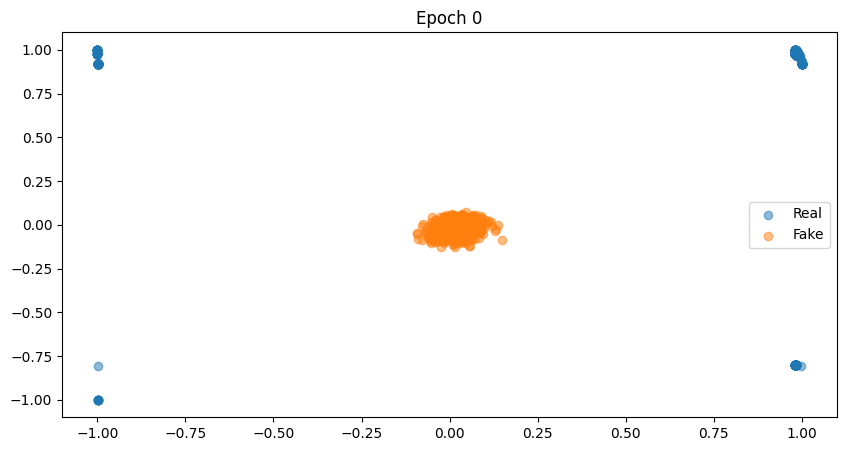

Epoch 100: Avg D loss = -2.7679, Avg G loss = -0.9090


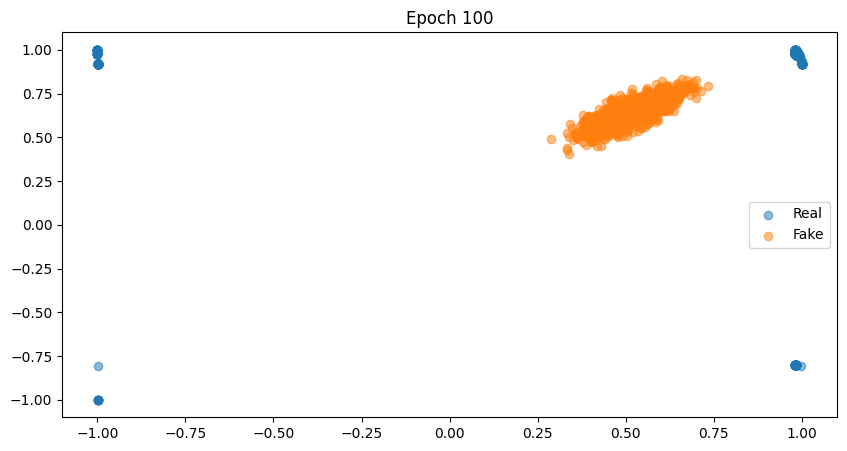

Epoch 200: Avg D loss = -2.3638, Avg G loss = -0.6690


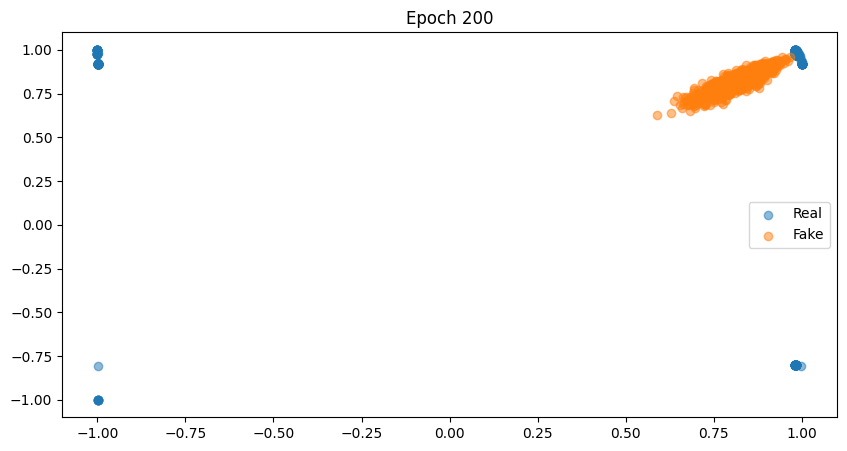

Epoch 300: Avg D loss = -2.1951, Avg G loss = -0.3607


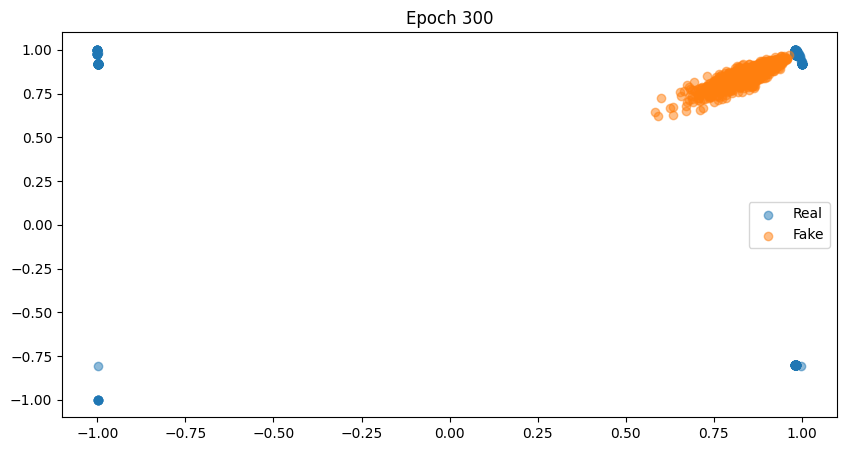

Epoch 400: Avg D loss = -2.0814, Avg G loss = -0.4020


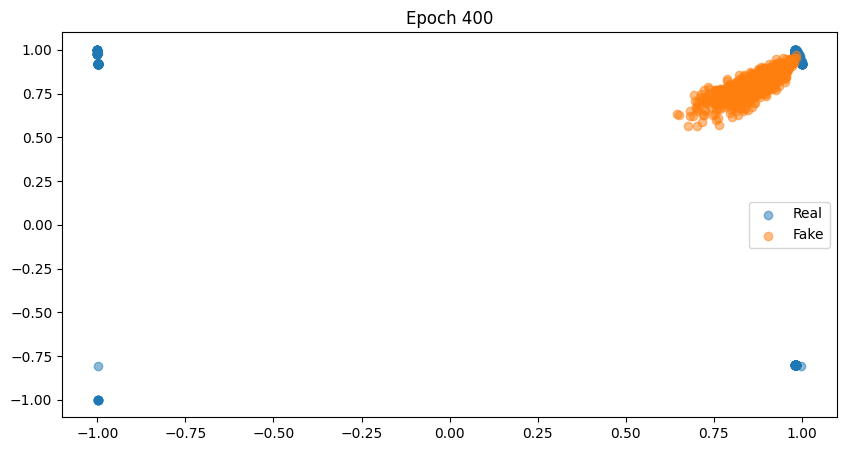

Epoch 500: Avg D loss = -2.0050, Avg G loss = -0.4835


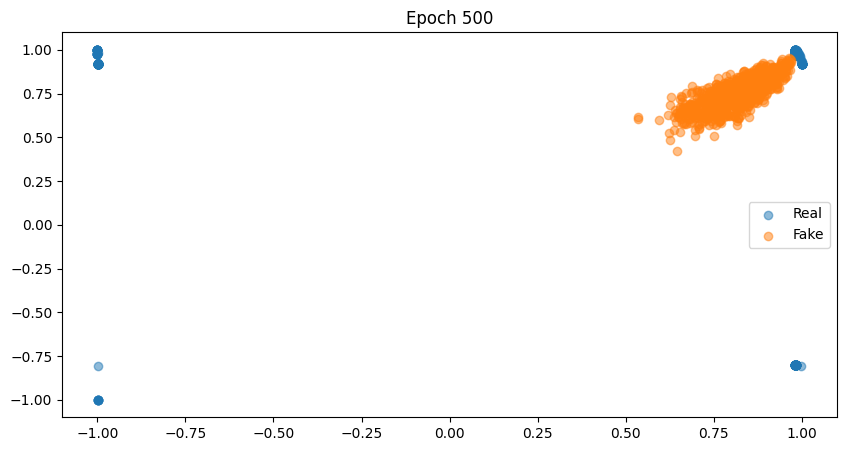

Epoch 600: Avg D loss = -1.8756, Avg G loss = -0.6690


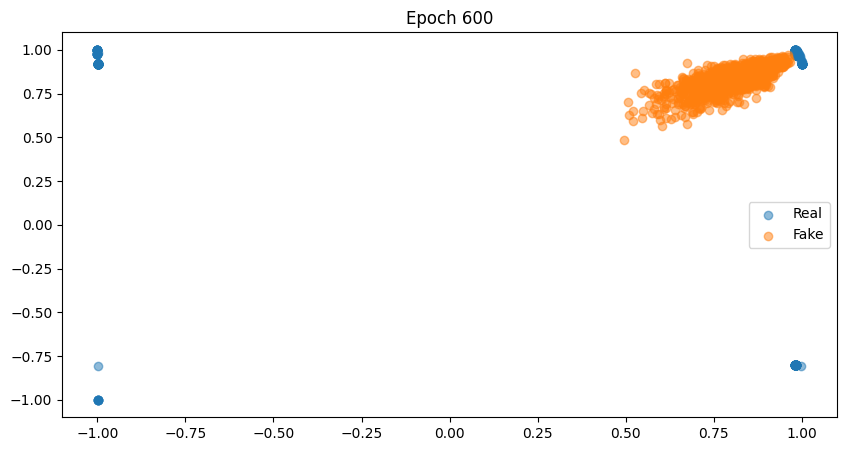

Epoch 700: Avg D loss = -1.7569, Avg G loss = -0.8274


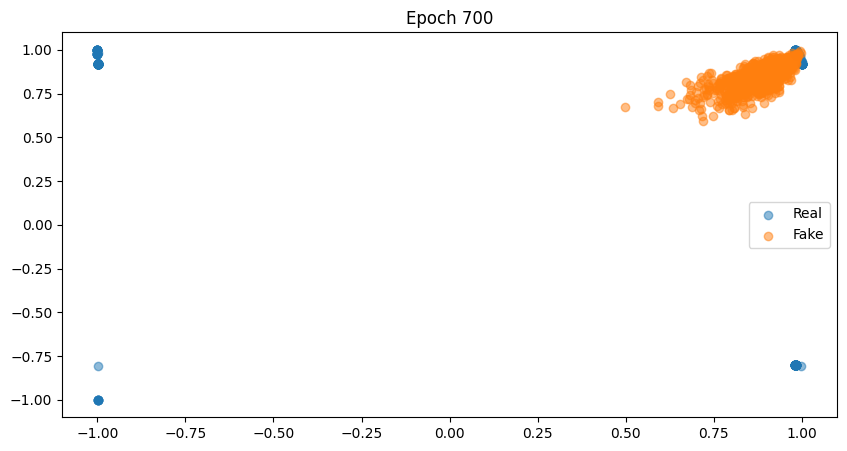

✅ Attack1 eğitimi tamamlandı.

🚀 Eğitim başlıyor: Attack2 (443 örnek)
⚠️ Dikkat: 'Attack2' verisinde sabit değere sahip sütunlar tespit edildi: ['AIT401', 'P101', 'P203', 'P205', 'P301', 'P402', 'P501', 'UV401']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Ölçeklenecek özellik sayısı: 27
  Model boyutları: Generator Output=27, Discriminator Input=27
Epoch 0: Avg D loss = 6.7666, Avg G loss = -0.0464


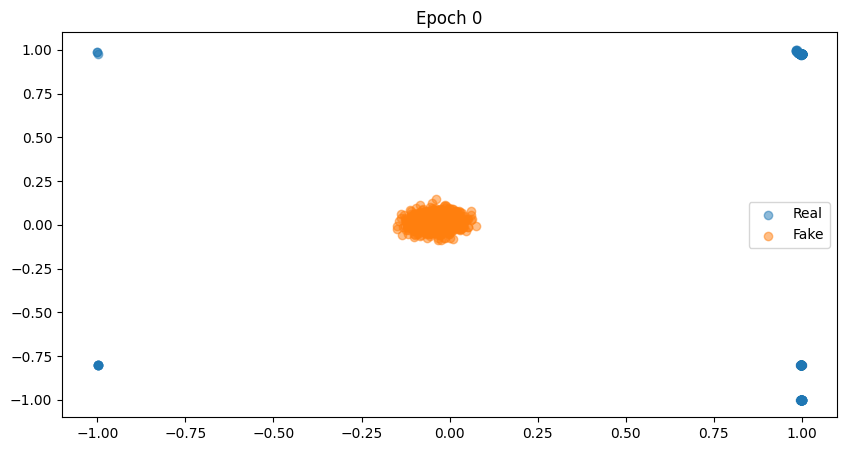

Epoch 100: Avg D loss = -2.8024, Avg G loss = -0.8709


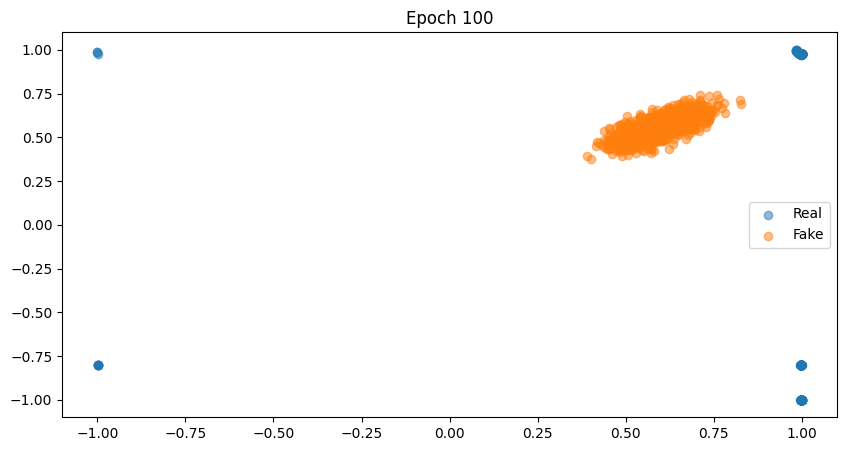

Epoch 200: Avg D loss = -2.6253, Avg G loss = -0.5617


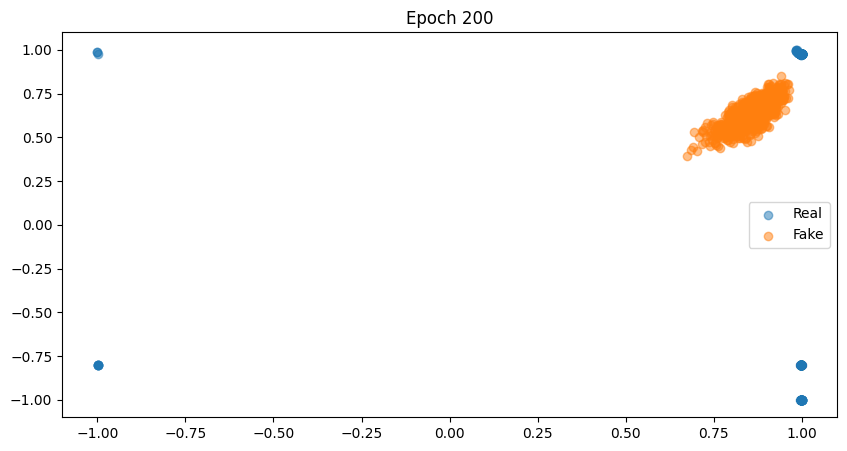

Epoch 300: Avg D loss = -2.4768, Avg G loss = -0.3924


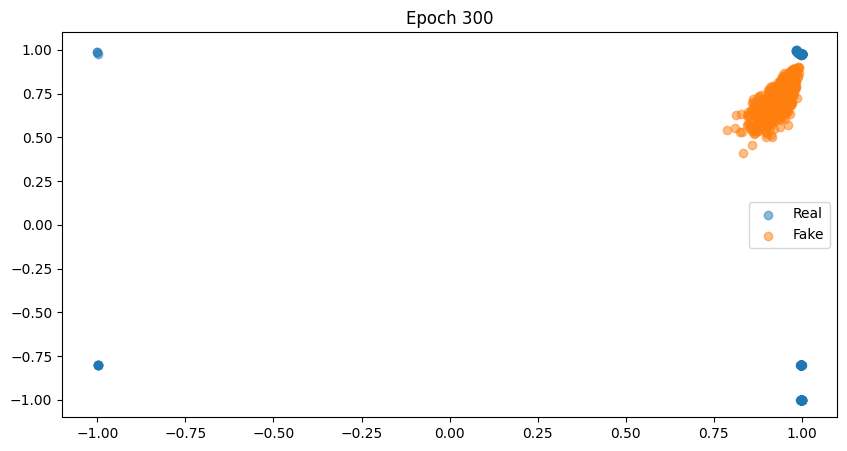

Epoch 400: Avg D loss = -2.3107, Avg G loss = -0.4881


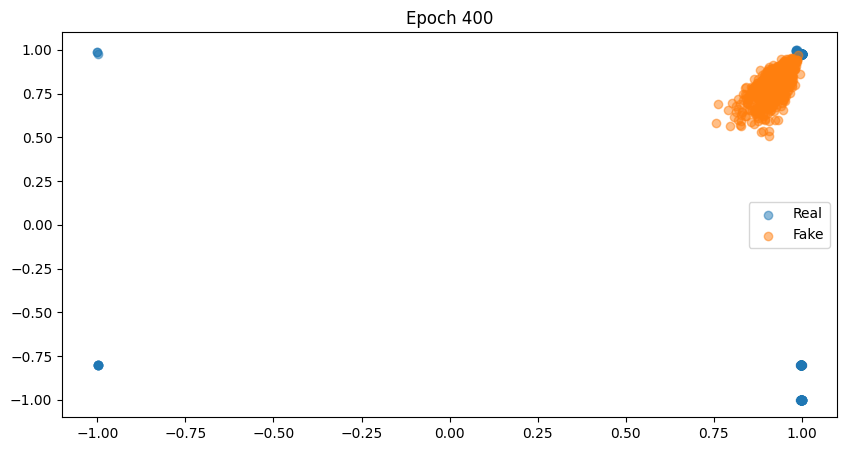

Epoch 500: Avg D loss = -2.1944, Avg G loss = -0.5754


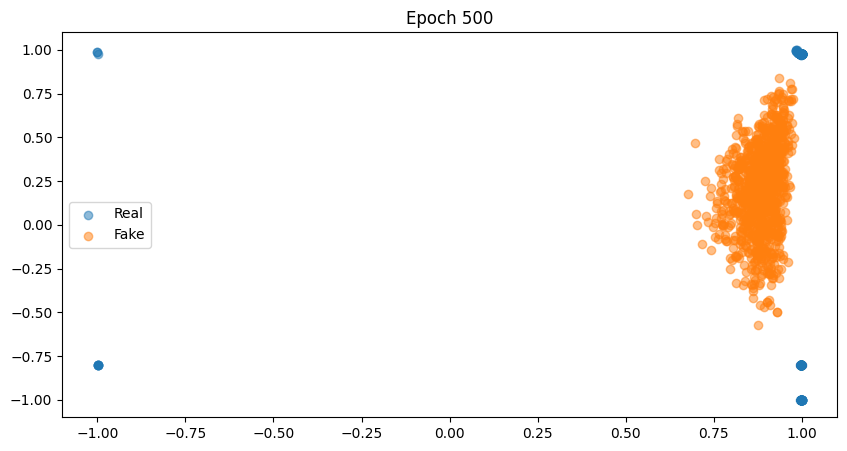

Epoch 600: Avg D loss = -2.0268, Avg G loss = -0.8232


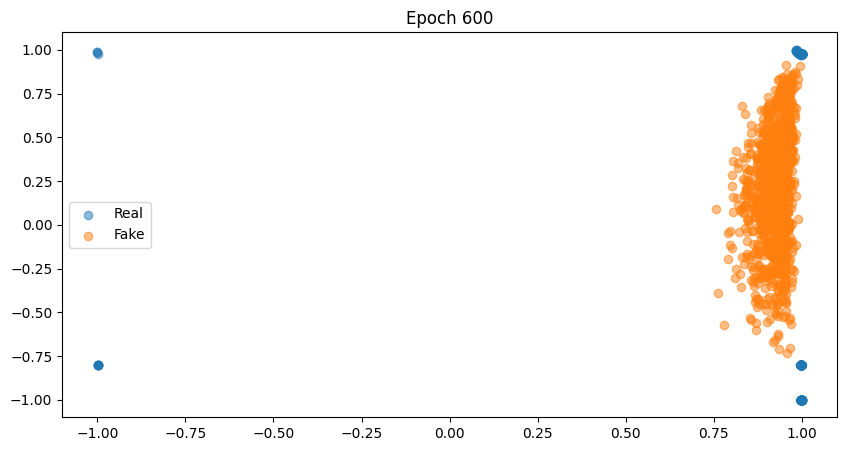

Epoch 700: Avg D loss = -1.9050, Avg G loss = -0.7961


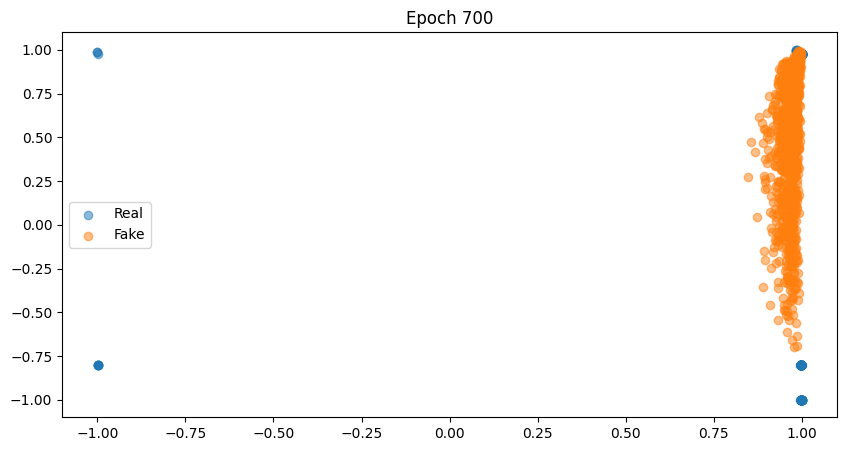

✅ Attack2 eğitimi tamamlandı.

🚀 Eğitim başlıyor: Attack3 (429 örnek)
⚠️ Dikkat: 'Attack3' verisinde sabit değere sahip sütunlar tespit edildi: ['AIT401', 'MV301', 'MV302', 'MV304', 'P301', 'P302', 'P402', 'P501', 'P602', 'UV401']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Ölçeklenecek özellik sayısı: 25
  Model boyutları: Generator Output=25, Discriminator Input=25
Epoch 0: Avg D loss = 6.6079, Avg G loss = 0.0484


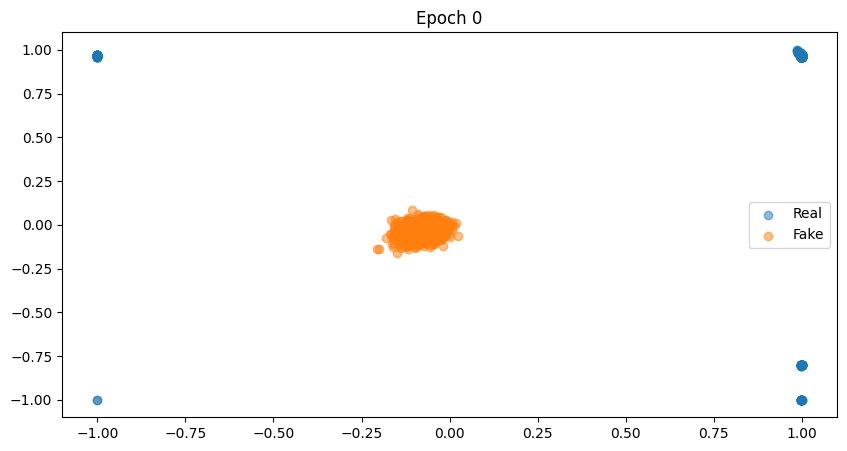

Epoch 100: Avg D loss = -3.2283, Avg G loss = -0.9070


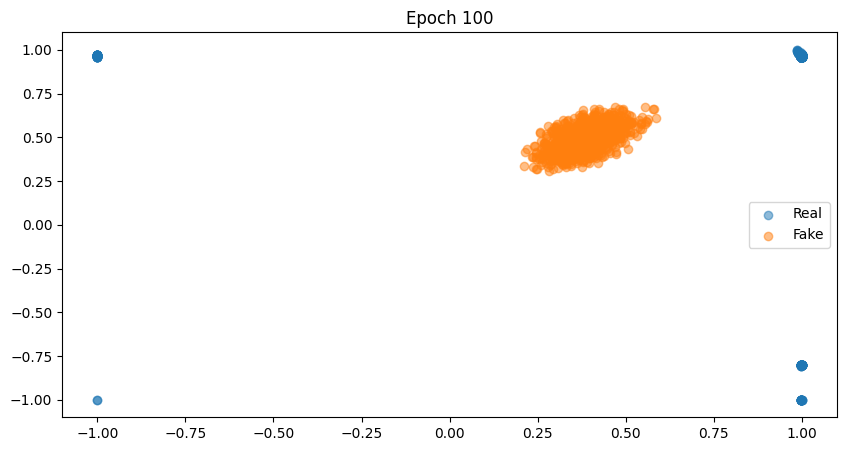

Epoch 200: Avg D loss = -2.4940, Avg G loss = -0.8738


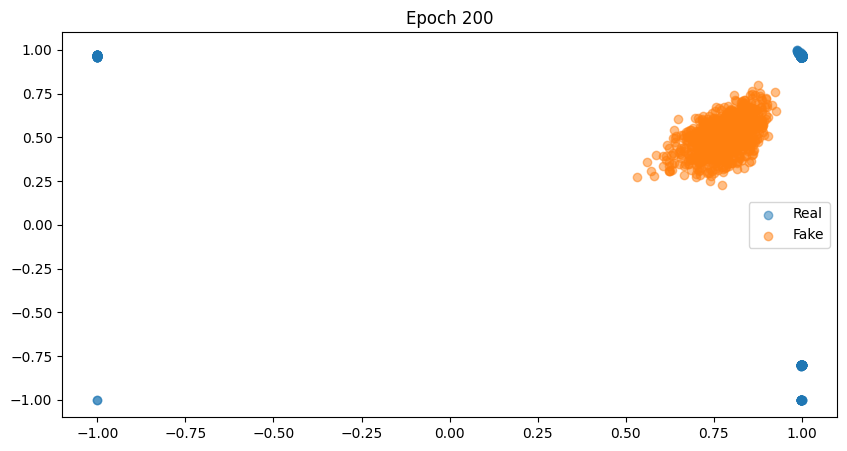

Epoch 300: Avg D loss = -2.3470, Avg G loss = -0.4558


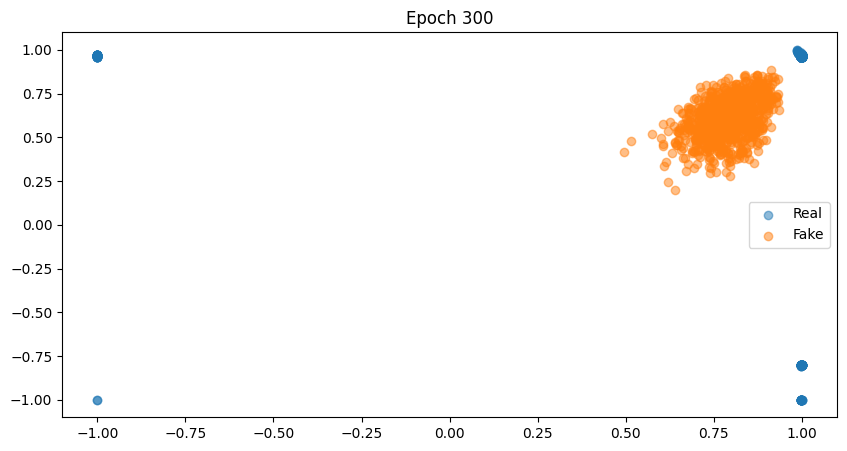

Epoch 400: Avg D loss = -2.2168, Avg G loss = -0.5542


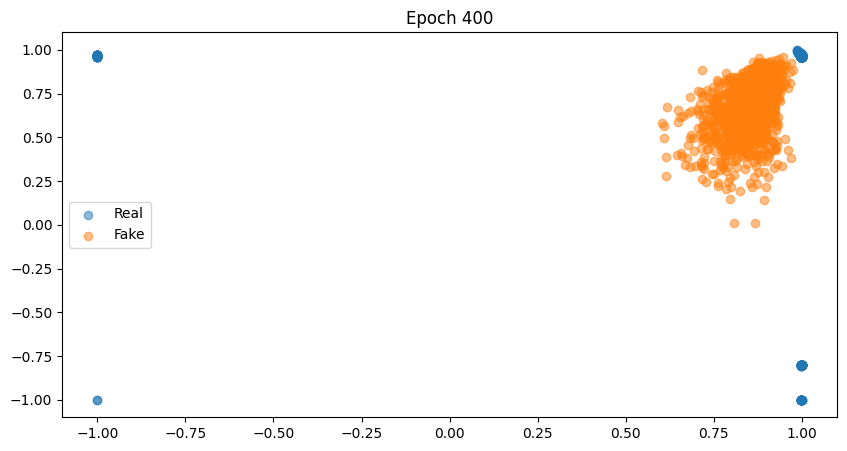

Epoch 500: Avg D loss = -2.0719, Avg G loss = -0.7347


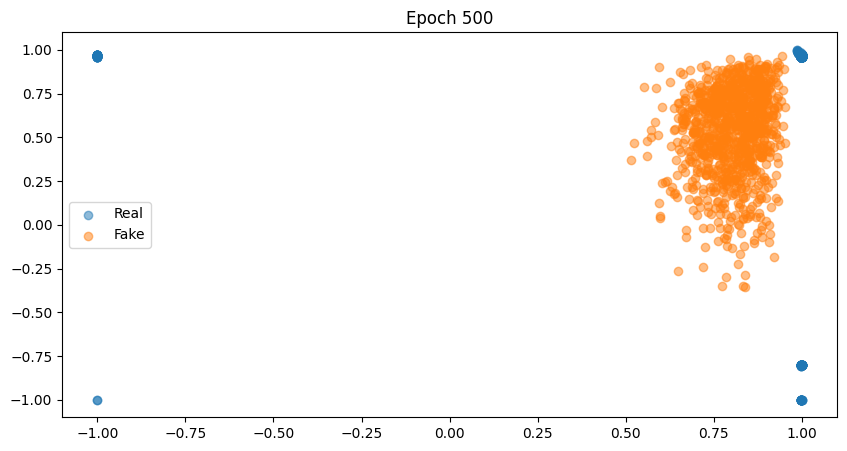

Epoch 600: Avg D loss = -1.8679, Avg G loss = -0.9510


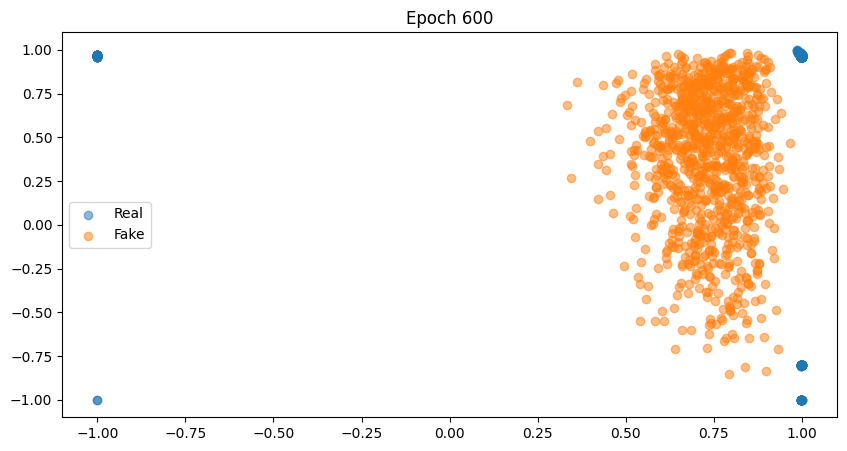

Epoch 700: Avg D loss = -1.7038, Avg G loss = -0.9946


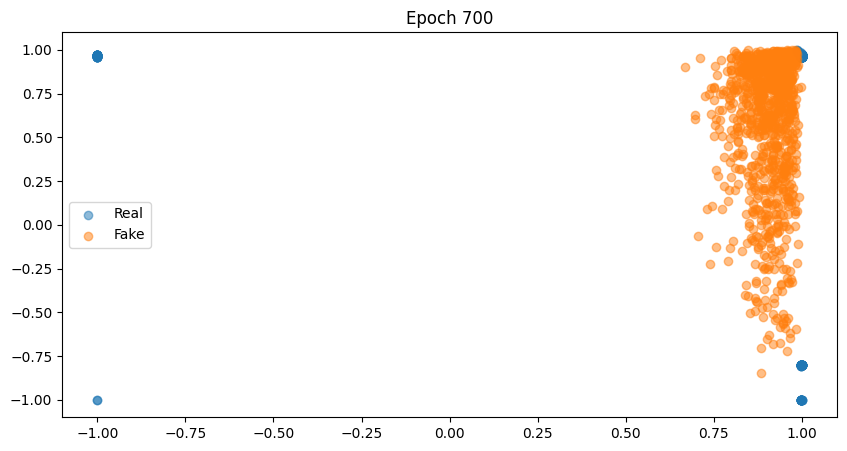

✅ Attack3 eğitimi tamamlandı.

🚀 Eğitim başlıyor: Attack4 (469 örnek)
⚠️ Dikkat: 'Attack4' verisinde sabit değere sahip sütunlar tespit edildi: ['MV301', 'P301', 'P402', 'P501', 'P602', 'UV401']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Ölçeklenecek özellik sayısı: 29
  Model boyutları: Generator Output=29, Discriminator Input=29
Epoch 0: Avg D loss = 6.2834, Avg G loss = 0.0287


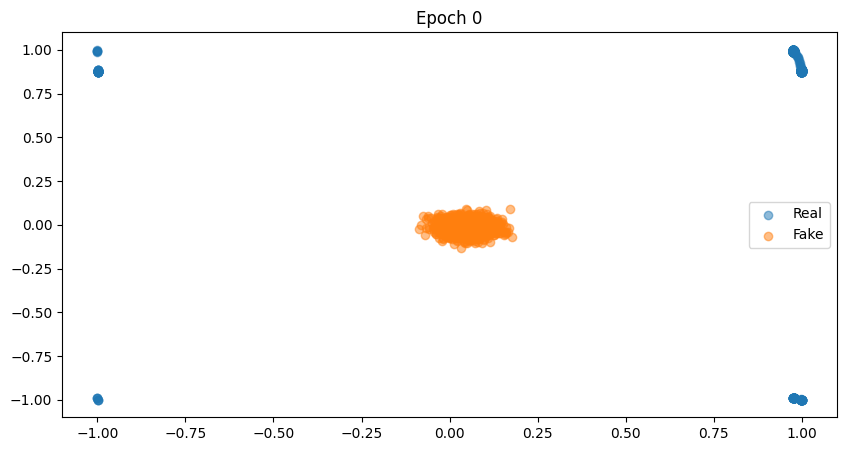

Epoch 100: Avg D loss = -3.4063, Avg G loss = -0.7970


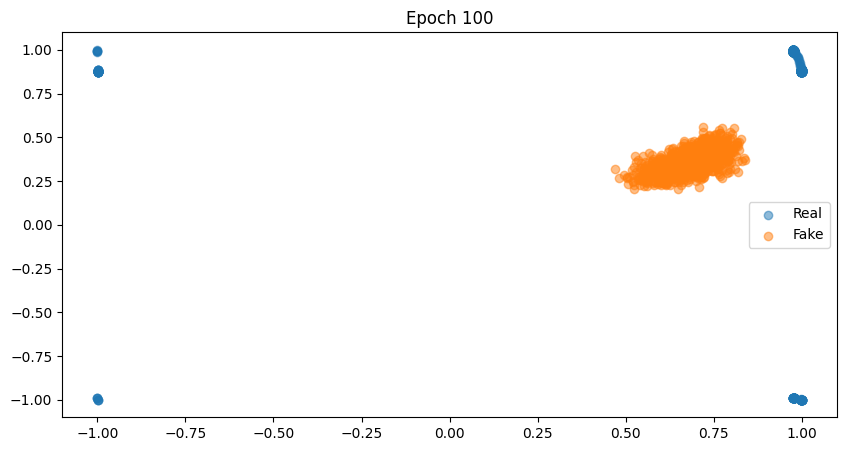

Epoch 200: Avg D loss = -3.1683, Avg G loss = -0.6196


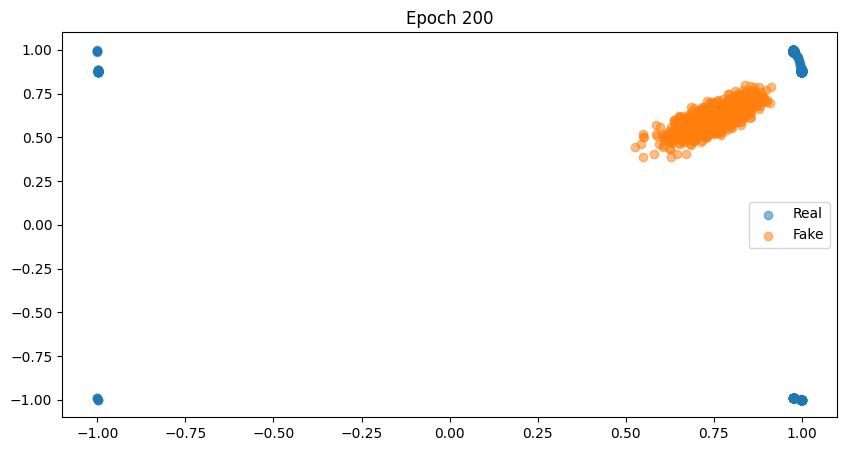

Epoch 300: Avg D loss = -3.0809, Avg G loss = -0.3634


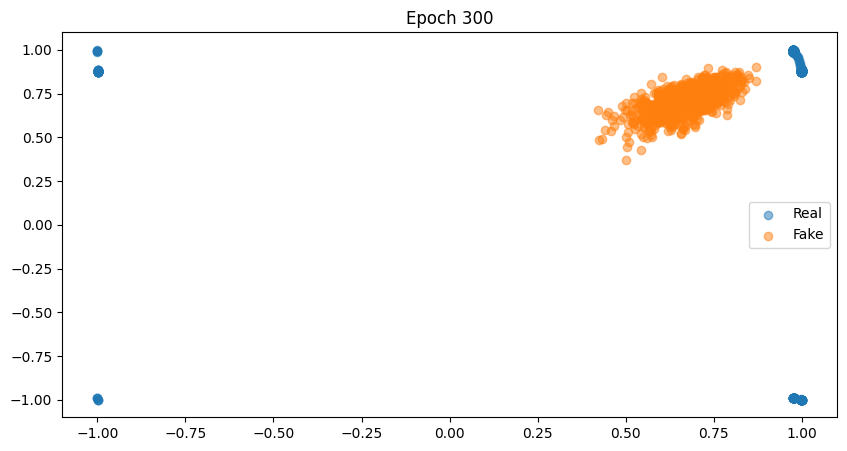

Epoch 400: Avg D loss = -2.8857, Avg G loss = -0.5407


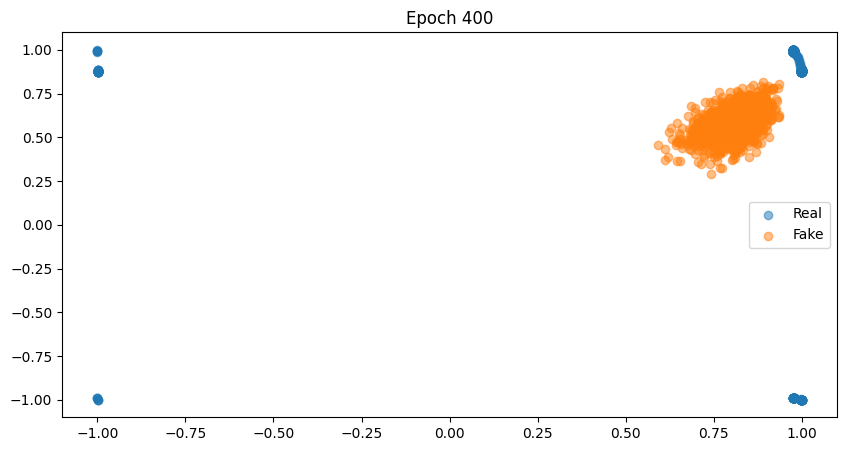

Epoch 500: Avg D loss = -2.7749, Avg G loss = -0.5940


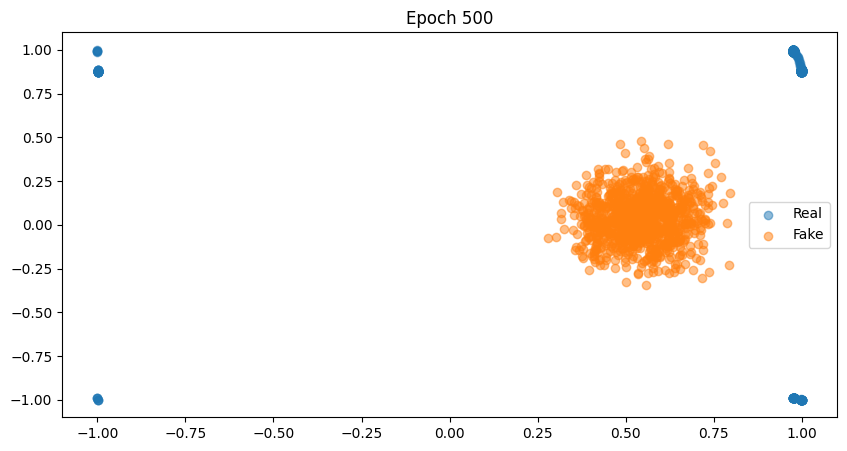

Epoch 600: Avg D loss = -2.5454, Avg G loss = -0.7809


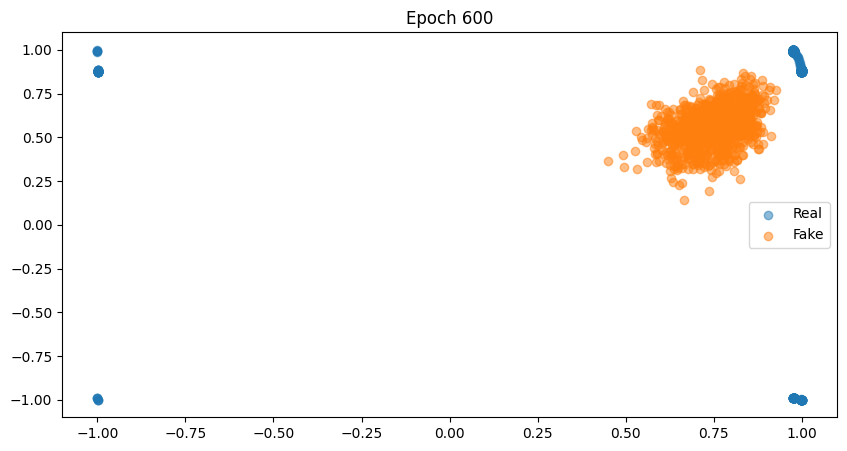

Epoch 700: Avg D loss = -2.4115, Avg G loss = -0.9518


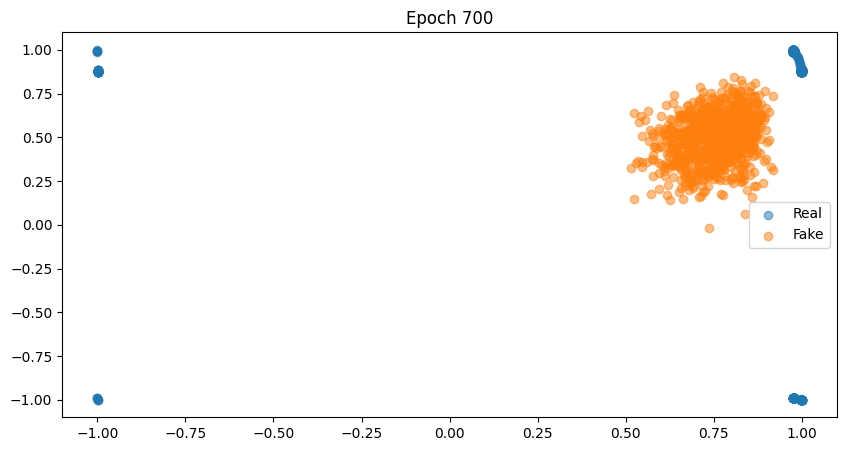

✅ Attack4 eğitimi tamamlandı.

🚀 Eğitim başlıyor: Attack5 (281 örnek)
⚠️ Dikkat: 'Attack5' verisinde sabit değere sahip sütunlar tespit edildi: ['AIT401', 'FIT101', 'FIT201', 'FIT601', 'MV301', 'P101', 'P203', 'P205', 'P301', 'P402', 'P501', 'P602', 'UV401']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Ölçeklenecek özellik sayısı: 22
  Model boyutları: Generator Output=22, Discriminator Input=22
Epoch 0: Avg D loss = 6.2028, Avg G loss = 0.2068


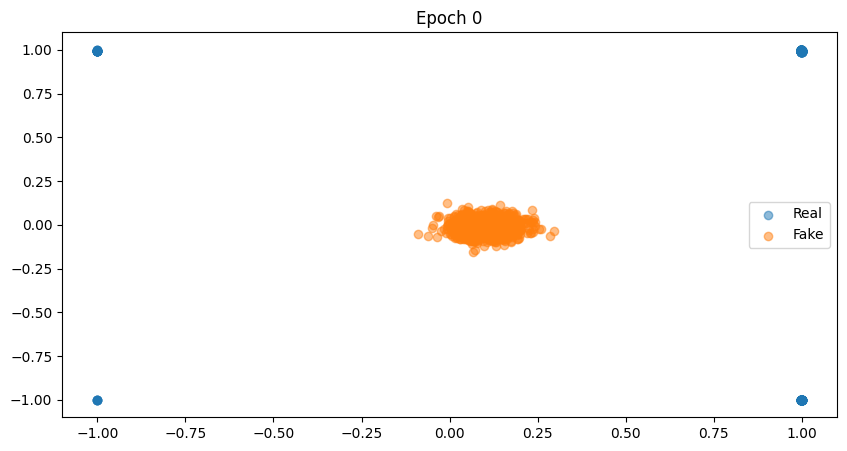

Epoch 100: Avg D loss = -2.8076, Avg G loss = -0.7022


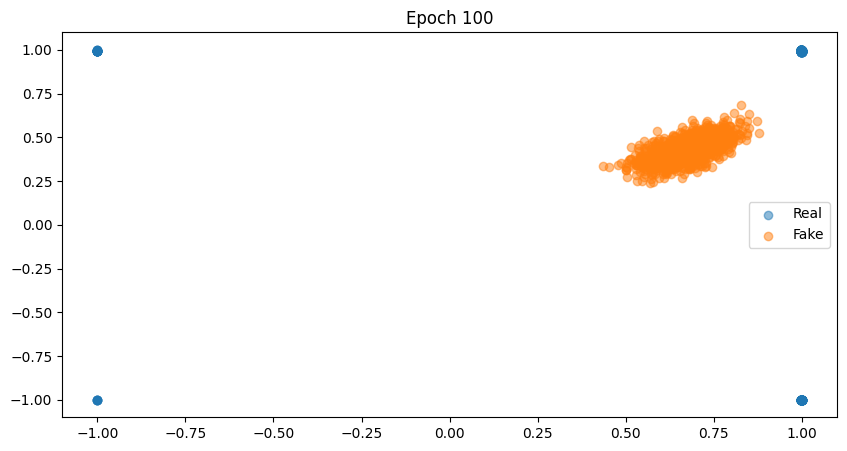

Epoch 200: Avg D loss = -2.8665, Avg G loss = -0.3499


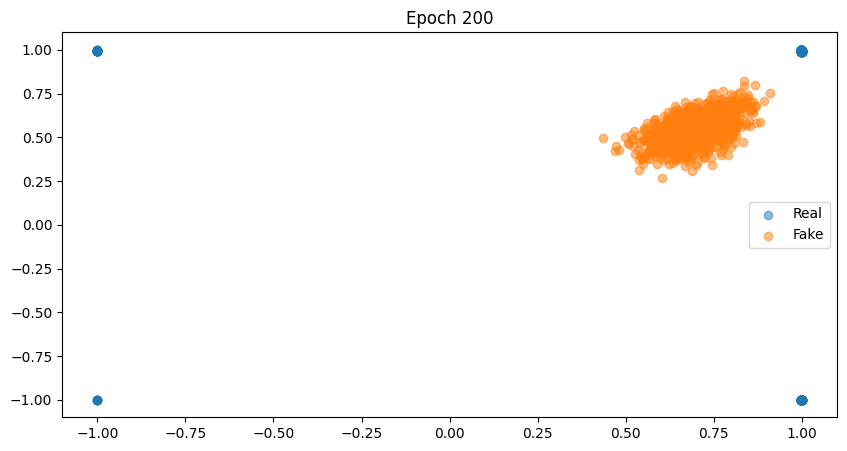

Epoch 300: Avg D loss = -2.7455, Avg G loss = -0.2893


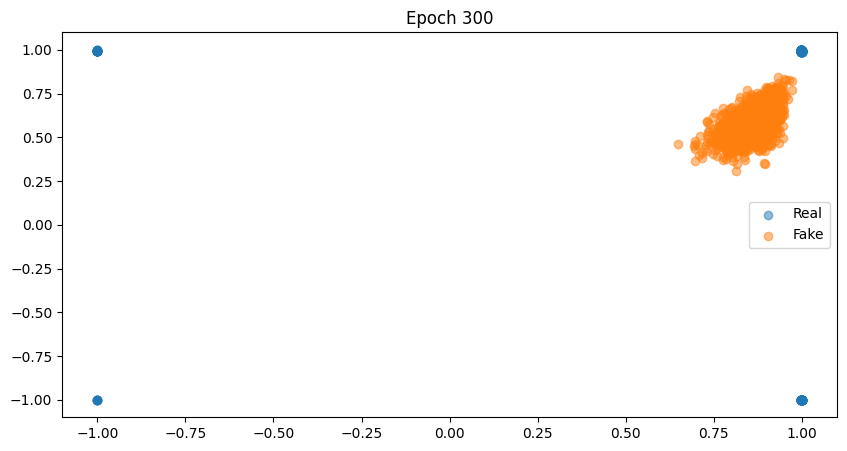

Epoch 400: Avg D loss = -2.6507, Avg G loss = -0.3051


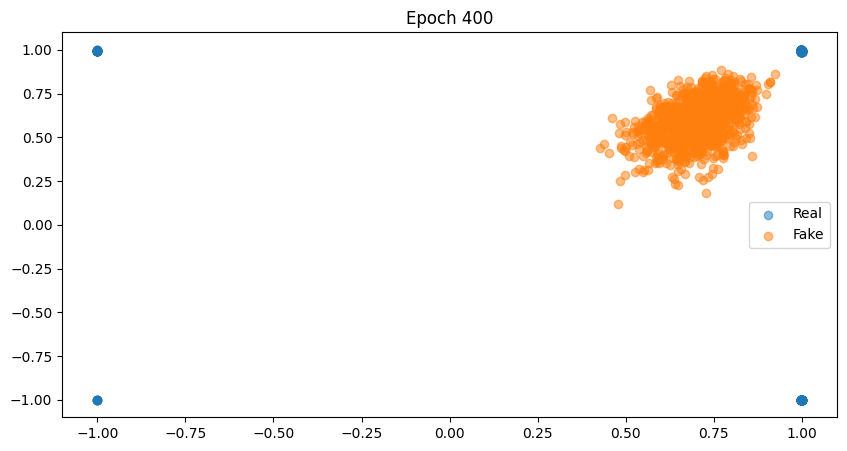

Epoch 500: Avg D loss = -2.5062, Avg G loss = -0.4268


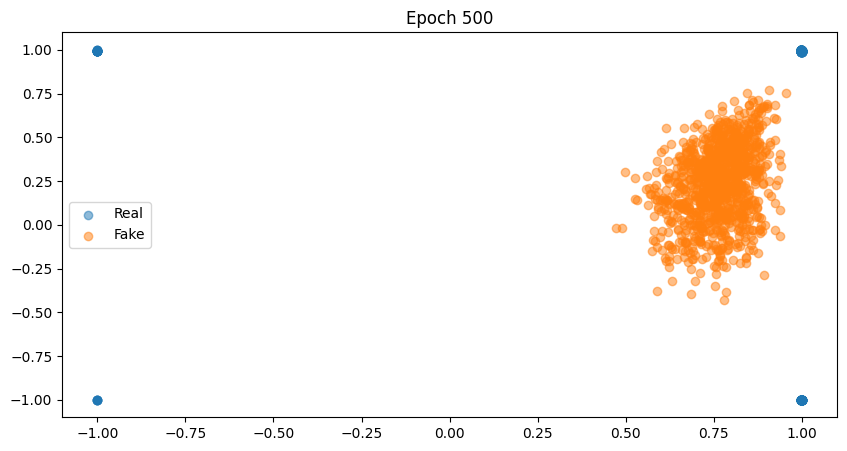

Epoch 600: Avg D loss = -2.3117, Avg G loss = -0.5793


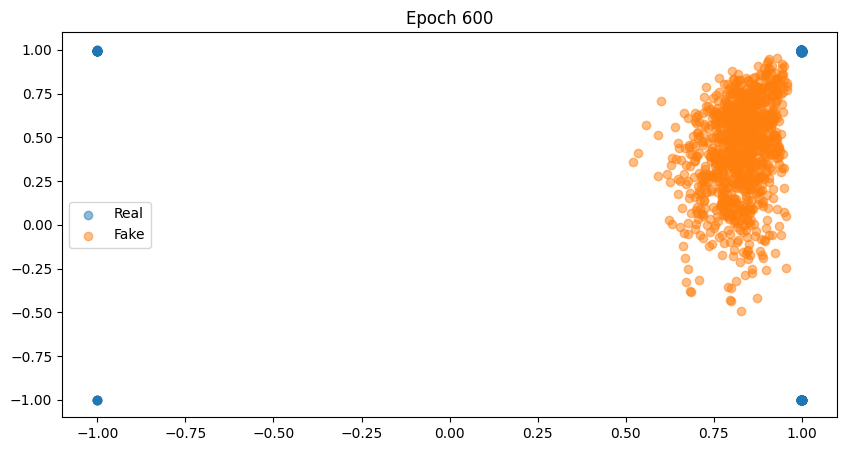

Epoch 700: Avg D loss = -2.1630, Avg G loss = -0.7031


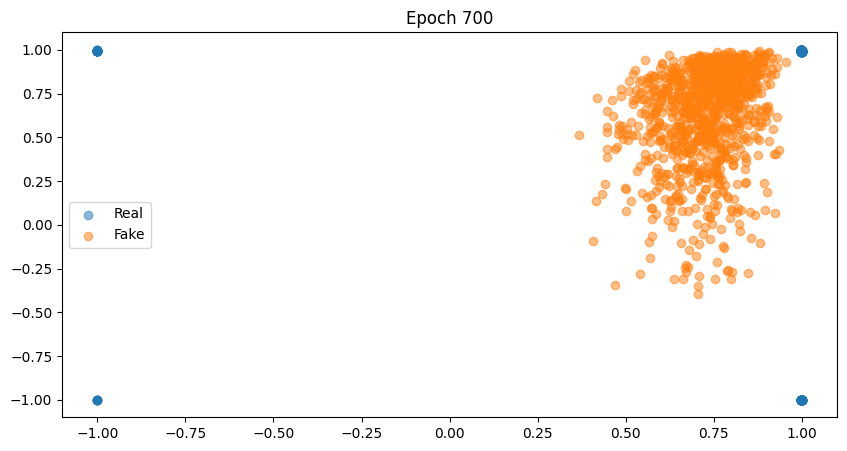

✅ Attack5 eğitimi tamamlandı.

🚀 Eğitim başlıyor: Attack6 (1675 örnek)
⚠️ Dikkat: 'Attack6' verisinde sabit değere sahip sütunlar tespit edildi: ['FIT601', 'MV301', 'P101', 'P203', 'P205', 'P301', 'P402', 'P501', 'P602', 'UV401']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Ölçeklenecek özellik sayısı: 25
  Model boyutları: Generator Output=25, Discriminator Input=25
Epoch 0: Avg D loss = 5.9025, Avg G loss = 0.0955


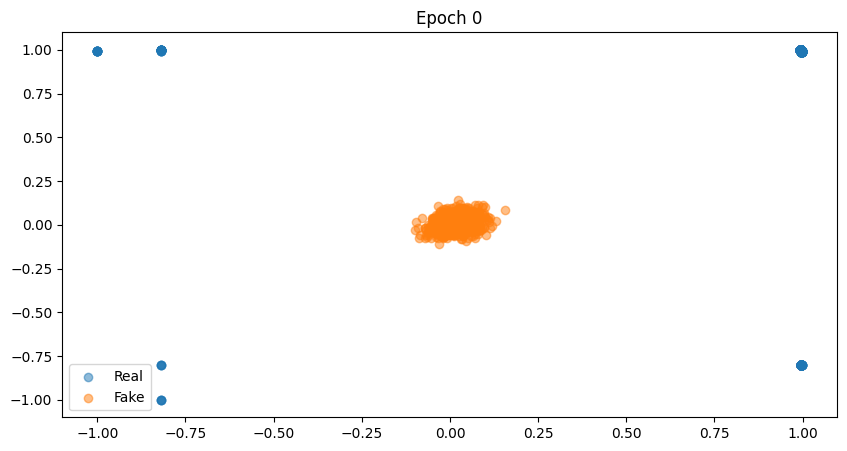

Epoch 100: Avg D loss = -2.8444, Avg G loss = -0.9737


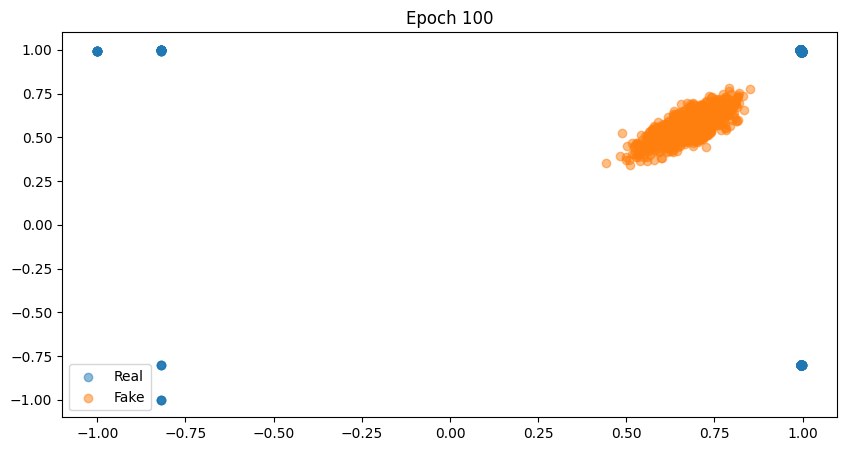

Epoch 200: Avg D loss = -2.1153, Avg G loss = -0.7090


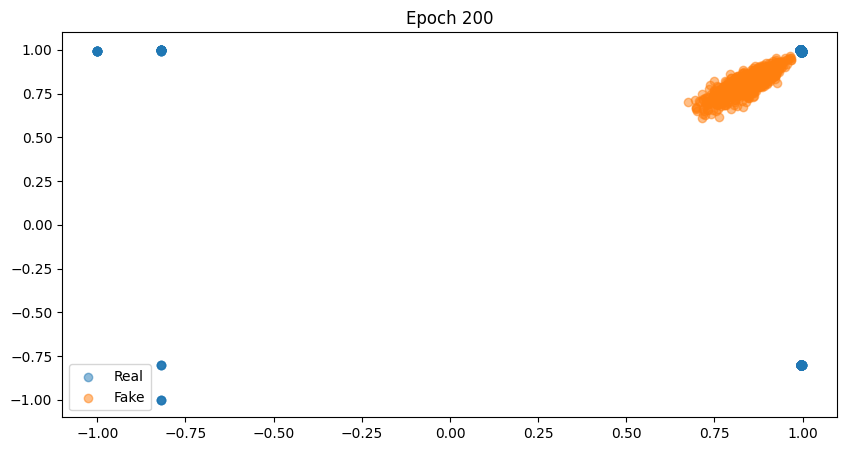

Epoch 300: Avg D loss = -1.9178, Avg G loss = -0.4489


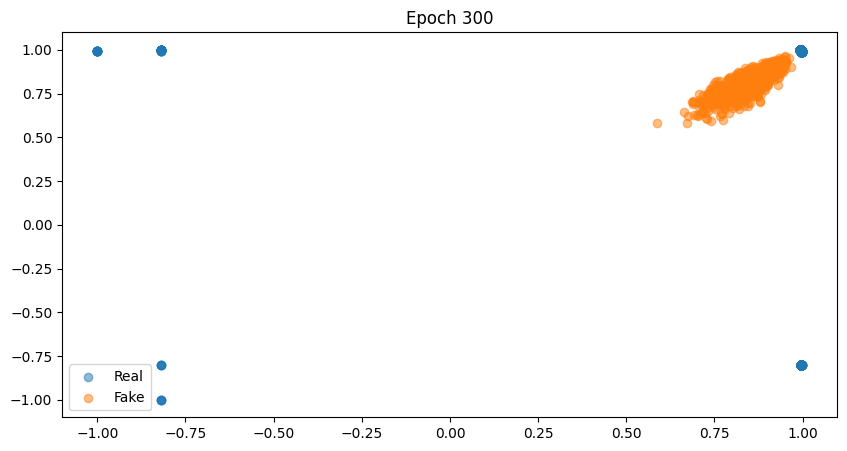

Epoch 400: Avg D loss = -1.8439, Avg G loss = -0.4963


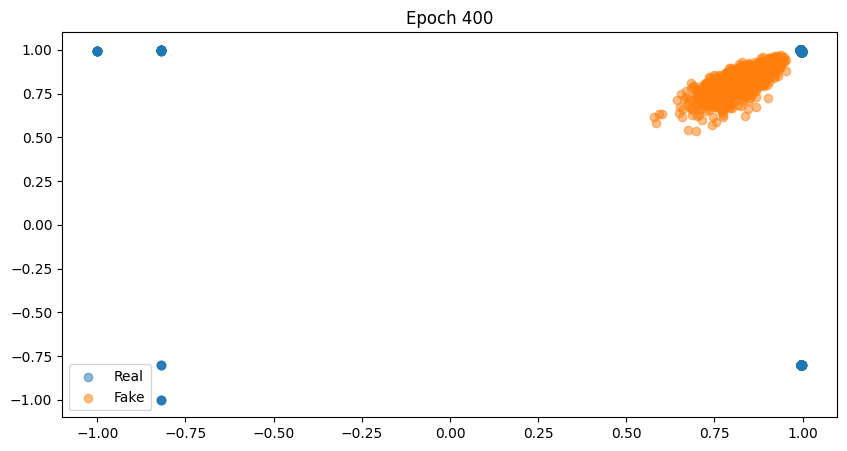

Epoch 500: Avg D loss = -1.7028, Avg G loss = -0.6077


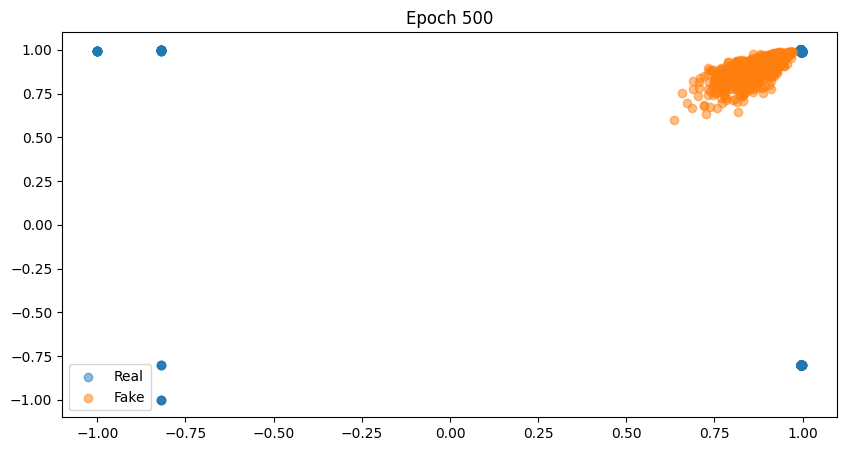

Epoch 600: Avg D loss = -1.6678, Avg G loss = -0.6690


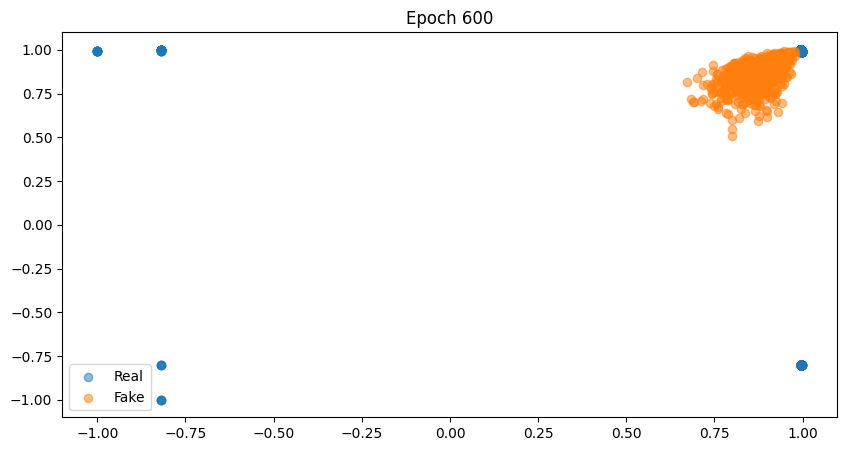

Epoch 700: Avg D loss = -1.6217, Avg G loss = -0.6196


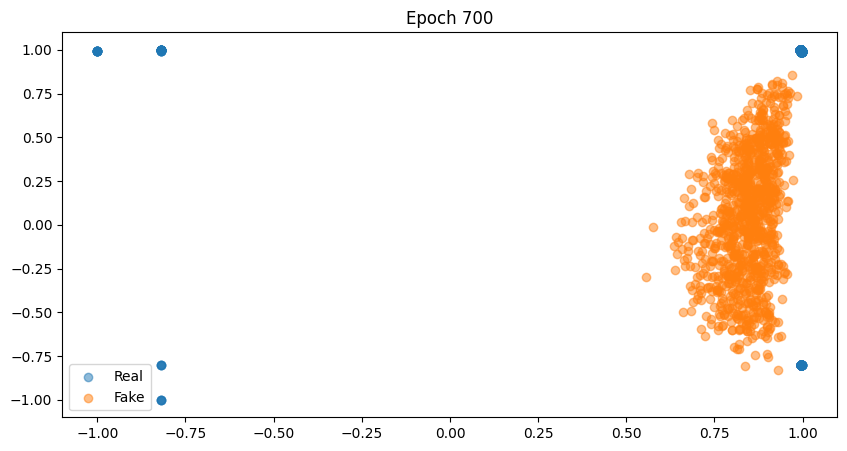

✅ Attack6 eğitimi tamamlandı.

✨ Tüm saldırı tipleri için WGAN-GP eğitimi tamamlandı.


In [50]:
# Eğitim ayarları
epochs = 800
latent_dim = 100
batch_size = 64
gp_weight = 10

# Sonuçları saklayacağımız yer
trained_generators = {}
trained_discriminators = {}
scalers = {}

# Özellik sayısını belirleyin (tüm saldırı tipleri için aynı olmalı)
# Bu, final_feature_cols'un uzunluğu veya X_train.shape[1] olmalıdır.
feature_dim = X_train.shape[1] # Assuming X_train has the correct number of features after preprocessing

print(f"🔢 Eğitim için kullanılan özellik boyutu: {feature_dim}")

for attack, data in attack_data_by_type.items():
    print(f"\n🚀 Eğitim başlıyor: {attack} ({len(data)} örnek)")

    # Veri boş mu kontrol et
    if len(data) == 0:
        print(f"⚠️ Saldırı tipi '{attack}' için eğitim verisi boş. Eğitim atlanıyor.")
        continue

    # Veri boyutunu kontrol et
    if data.shape[1] != feature_dim:
         print(f"⚠️ Saldırı tipi '{attack}' veri boyutu beklenenden farklı ({data.shape[1]} yerine {feature_dim}). Kontrol edin.")
         # Boyut farklıysa ne yapılacağına karar verin. Genellikle bu bir hatadır.
         # Şimdilik atlıyoruz veya uyarı veriyoruz.
         # Alternatif olarak, boyut uyuşmuyorsa data'yı feature_dim'e kırpabilir/genişletebilirsiniz,
         # ancak bu veri tutarlılığını bozabilir.
         # Geçici çözüm: Boyut uyuşmuyorsa atla
         # continue


    # NaN kontrolü (zaten load_and_preprocess_data'da yapıldı ama tekrar kontrol etmek zarar vermez)
    if np.isnan(data).any():
        print(f"⚠️ Saldırı tipi '{attack}' verisinde NaN değerler tespit edildi. NaN'lar temizleniyor.")
        data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)


    # Scale et
    # Scaler'ı her saldırı tipi için ayrı ayrı eğitiyoruz çünkü veri dağılımları farklı olabilir.
    scaler = MinMaxScaler(feature_range=(-1, 1))
    # Check for constant features within this specific attack type's data slice
    variances = np.var(data, axis=0)
    constant_features_indices = np.where(variances == 0)[0]

    data_to_scale = data.copy() # Ölçekleme yaparken orijinal datayı etkilememek için kopyala
    scaler_fitted_features_dim = feature_dim # Varsayılan olarak tüm özellikler

    if len(constant_features_indices) > 0:
        constant_col_names = [final_feature_cols[i] for i in constant_features_indices]
        print(f"⚠️ Dikkat: '{attack}' verisinde sabit değere sahip sütunlar tespit edildi: {constant_col_names}")
        print("   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...")

        non_constant_features_mask = np.ones(data.shape[1], dtype=bool)
        non_constant_features_mask[constant_features_indices] = False

        data_to_scale = data_to_scale[:, non_constant_features_mask]
        scaler_fitted_features_dim = data_to_scale.shape[1] # Scaler'ın eğitildiği özellik sayısı

        print(f"   Ölçeklenecek özellik sayısı: {scaler_fitted_features_dim}")


    data_scaled = scaler.fit_transform(data_to_scale)
    scalers[attack] = scaler

    # Model oluştur
    # Generator ve Discriminator'ın giriş/çıkış boyutları ölçeklenmiş veri boyutu olmalı.
    model_input_output_dim = scaler_fitted_features_dim
    generator = build_generator(latent_dim, output_dim=model_input_output_dim)
    discriminator = build_discriminator(input_dim=model_input_output_dim)

    print(f"  Model boyutları: Generator Output={model_input_output_dim}, Discriminator Input={model_input_output_dim}")


    # Eğitim
    # train_wgan_gp fonksiyonu NaN'ları ele alacak şekilde güncellenmiş olmalı.
    gen, disc, history = train_wgan_gp(
        generator, discriminator, data_scaled,
        latent_dim=latent_dim,
        epochs=epochs,
        batch_size=batch_size,
        gp_weight=gp_weight
    )

    trained_generators[attack] = gen
    trained_discriminators[attack] = disc
    print(f"✅ {attack} eğitimi tamamlandı.")

print("\n✨ Tüm saldırı tipleri için WGAN-GP eğitimi tamamlandı.")

# Eğitilen modelleri ve scaler'ları kontrol etmek için:
# print("\nEğitilen Modeller ve Scalers:")
# for attack in trained_generators:
#     print(f"- {attack}: Generator, Discriminator, Scaler")

In [51]:
import os

# Model kayıt klasörünü oluştur
save_dir = "saved_wgan_models"
os.makedirs(save_dir, exist_ok=True)

# Her saldırı tipi için modeli kaydet
for attack in trained_generators:
    gen_path = os.path.join(save_dir, f"{attack}_generator.h5")
    disc_path = os.path.join(save_dir, f"{attack}_discriminator.h5")

    trained_generators[attack].save(gen_path)
    trained_discriminators[attack].save(disc_path)

    print(f"💾 {attack} modelleri kaydedildi: {gen_path}, {disc_path}")


💾 Attack1 modelleri kaydedildi: saved_wgan_models/Attack1_generator.h5, saved_wgan_models/Attack1_discriminator.h5
💾 Attack2 modelleri kaydedildi: saved_wgan_models/Attack2_generator.h5, saved_wgan_models/Attack2_discriminator.h5
💾 Attack3 modelleri kaydedildi: saved_wgan_models/Attack3_generator.h5, saved_wgan_models/Attack3_discriminator.h5
💾 Attack4 modelleri kaydedildi: saved_wgan_models/Attack4_generator.h5, saved_wgan_models/Attack4_discriminator.h5
💾 Attack5 modelleri kaydedildi: saved_wgan_models/Attack5_generator.h5, saved_wgan_models/Attack5_discriminator.h5
💾 Attack6 modelleri kaydedildi: saved_wgan_models/Attack6_generator.h5, saved_wgan_models/Attack6_discriminator.h5


In [66]:
import joblib
import os

save_dir = "saved_wgan_models"
os.makedirs(save_dir, exist_ok=True)

for attack, scaler in scalers.items():
    joblib.dump(scaler, os.path.join(save_dir, f"{attack}_scaler.pkl"))
    print(f"✅ {attack} scaler kaydedildi.")


✅ Attack1 scaler kaydedildi.
✅ Attack2 scaler kaydedildi.
✅ Attack3 scaler kaydedildi.
✅ Attack4 scaler kaydedildi.
✅ Attack5 scaler kaydedildi.
✅ Attack6 scaler kaydedildi.


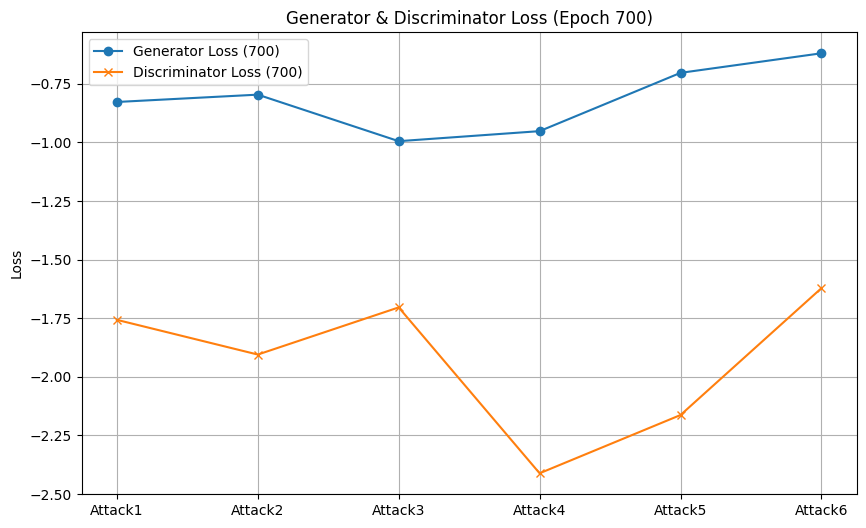

In [57]:
import matplotlib.pyplot as plt

g_losses = [-0.8274, -0.7961, -0.9946, -0.9518, -0.7031, -0.6196]
d_losses = [-1.7569, -1.9050, -1.7038, -2.4115, -2.1630, -1.6217]
attacks = ['Attack1', 'Attack2', 'Attack3', 'Attack4', 'Attack5', 'Attack6']

plt.figure(figsize=(10,6))
plt.plot(attacks, g_losses, marker='o', label='Generator Loss (700)')
plt.plot(attacks, d_losses, marker='x', label='Discriminator Loss (700)')
plt.title("Generator & Discriminator Loss (Epoch 700)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()


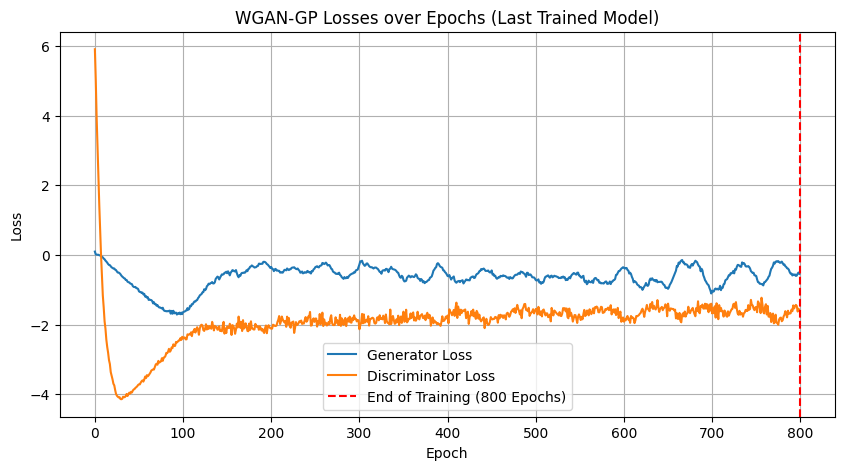

In [56]:
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported for nanmean

last_training_history = history
# Check if last_training_history is available and not None
if last_training_history and isinstance(last_training_history, dict):
    # Use the stored history for plotting
    g_loss_history = last_training_history.get('g_loss', [])
    d_loss_history = last_training_history.get('d_loss', [])

    # Check if the loss lists are not empty before plotting
    if g_loss_history and d_loss_history:
        plt.figure(figsize=(10, 5))
        plt.plot(g_loss_history, label='Generator Loss')
        plt.plot(d_loss_history, label='Discriminator Loss')
        # Adjust the vertical line position if needed, 1000 epochs might be too high based on your run
        plt.axvline(x=len(g_loss_history), color='r', linestyle='--', label=f'End of Training ({len(g_loss_history)} Epochs)')
        plt.legend()
        plt.title("WGAN-GP Losses over Epochs (Last Trained Model)")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()
    else:
        print("Loss history lists are empty. Cannot plot.")
else:
    print("Training history not found. Please run the training cell first.")

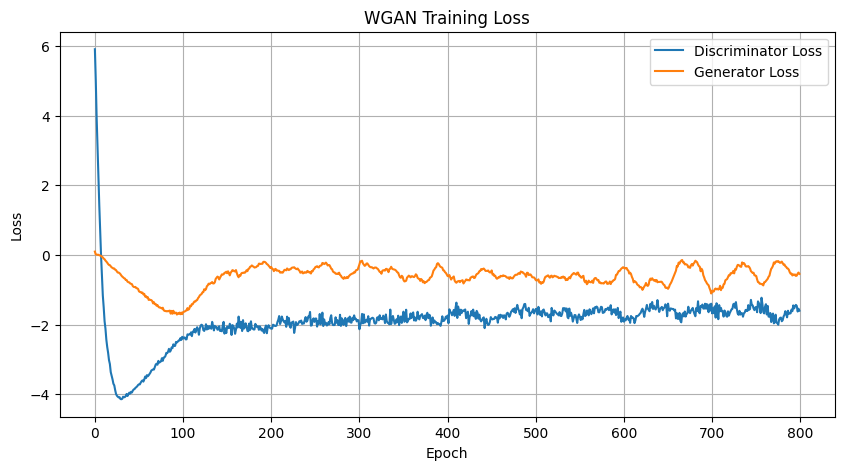

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['d_loss'], label='Discriminator Loss')
plt.plot(history['g_loss'], label='Generator Loss')
plt.title('WGAN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
import joblib

# Her attack için manual olarak G ve D loss değerleri (Epoch: 100, 200, ..., 700)
training_histories = {
    'Attack1': {
        'g_loss': [-0.9090, -0.6690, -0.3607, -0.4020, -0.4835, -0.6690, -0.8274],
        'd_loss': [-2.7679, -2.3638, -2.1951, -2.0814, -2.0050, -1.8756, -1.7569],
    },
    'Attack2': {
        'g_loss': [-0.8709, -0.5617, -0.3924, -0.4881, -0.5754, -0.8232, -0.7961],
        'd_loss': [-2.8024, -2.6253, -2.4768, -2.3107, -2.1944, -2.0268, -1.9050],
    },
    'Attack3': {
        'g_loss': [-0.9070, -0.8738, -0.4558, -0.5542, -0.7347, -0.9510, -0.9946],
        'd_loss': [-3.2283, -2.4940, -2.3470, -2.2168, -2.0719, -1.8679, -1.7038],
    },
    'Attack4': {
        'g_loss': [-0.7970, -0.6196, -0.3634, -0.5407, -0.5940, -0.7809, -0.9518],
        'd_loss': [-3.4063, -3.1683, -3.0809, -2.8857, -2.7749, -2.5454, -2.4115],
    },
    'Attack5': {
        'g_loss': [-0.7022, -0.3499, -0.2893, -0.3051, -0.4268, -0.5793, -0.7031],
        'd_loss': [-2.8076, -2.8665, -2.7455, -2.6507, -2.5062, -2.3117, -2.1630],
    },
    'Attack6': {
        'g_loss': [-0.9737, -0.7090, -0.4489, -0.4963, -0.6077, -0.6690, -0.6196],
        'd_loss': [-2.8444, -2.1153, -1.9178, -1.8439, -1.7028, -1.6678, -1.6217],
    },
}

# Kaydet
joblib.dump(training_histories, "training_histories.pkl")
print("✅ training_histories.pkl dosyası kaydedildi.")


✅ training_histories.pkl dosyası kaydedildi.


✅ Tüm loss grafik dosyaları 'loss_graphs' klasörüne kaydedildi.


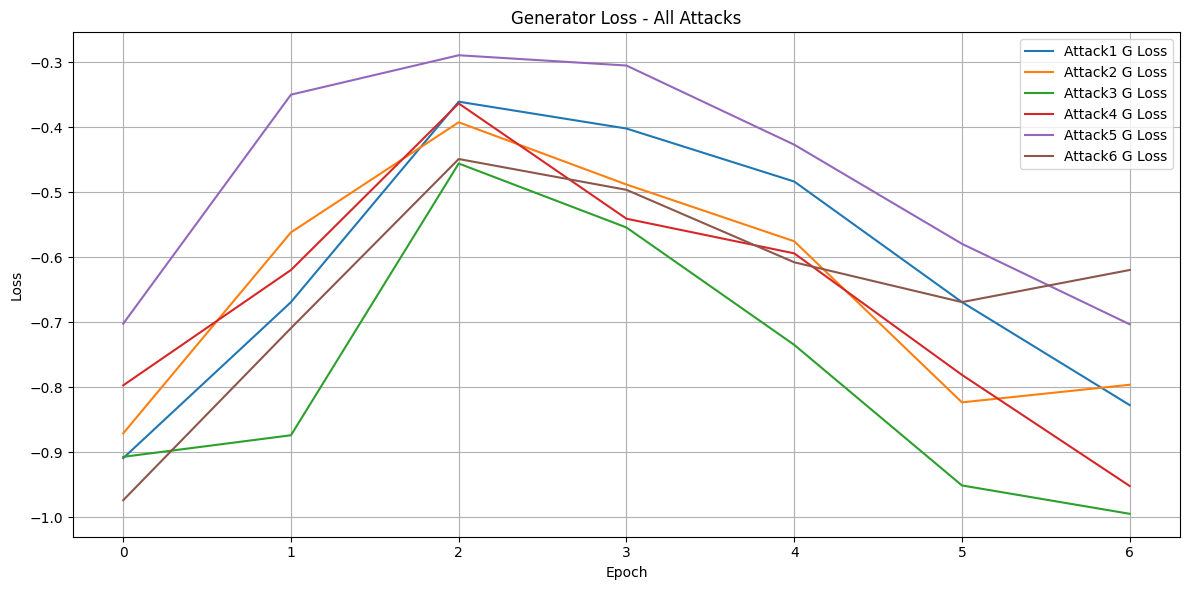

In [63]:
import matplotlib.pyplot as plt
import os

# Kaydedilen eğitim geçmişleri sözlüğü: training_histories
# Her giriş: { 'g_loss': [...], 'd_loss': [...] }

# Örnek varsayım (örneğin dışarıdan yüklenmiş olabilir)
# training_histories = joblib.load("training_histories.pkl")

# Grafiklerin kaydedileceği klasör
output_dir = "loss_graphs"
os.makedirs(output_dir, exist_ok=True)

# Her saldırı tipi için ayrı grafik çizimi
for attack, history in training_histories.items():
    g_loss = history['g_loss']
    d_loss = history['d_loss']
    epochs_range = list(range(len(g_loss)))

    plt.figure(figsize=(10, 5))
    plt.plot(epochs_range, g_loss, label='Generator Loss')
    plt.plot(epochs_range, d_loss, label='Discriminator Loss')
    plt.title(f"{attack} - G/D Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"loss_plot_{attack}.png"))
    plt.close()

print(f"✅ Tüm loss grafik dosyaları '{output_dir}' klasörüne kaydedildi.")

# Opsiyonel: Tüm saldırıların G-loss karşılaştırması (tek grafikte)
plt.figure(figsize=(12, 6))
for attack, history in training_histories.items():
    plt.plot(history['g_loss'], label=f'{attack} G Loss')
plt.title("Generator Loss - All Attacks")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "all_generator_losses.png"))
plt.show()


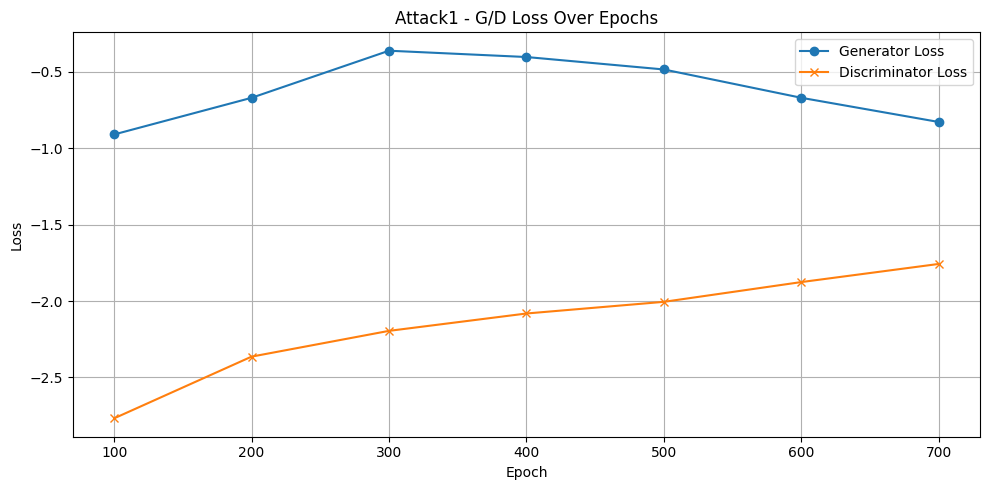

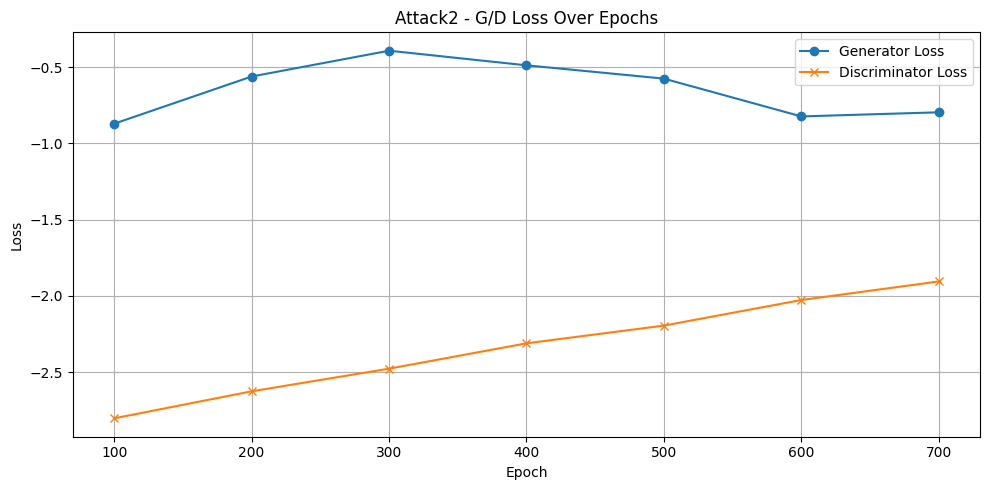

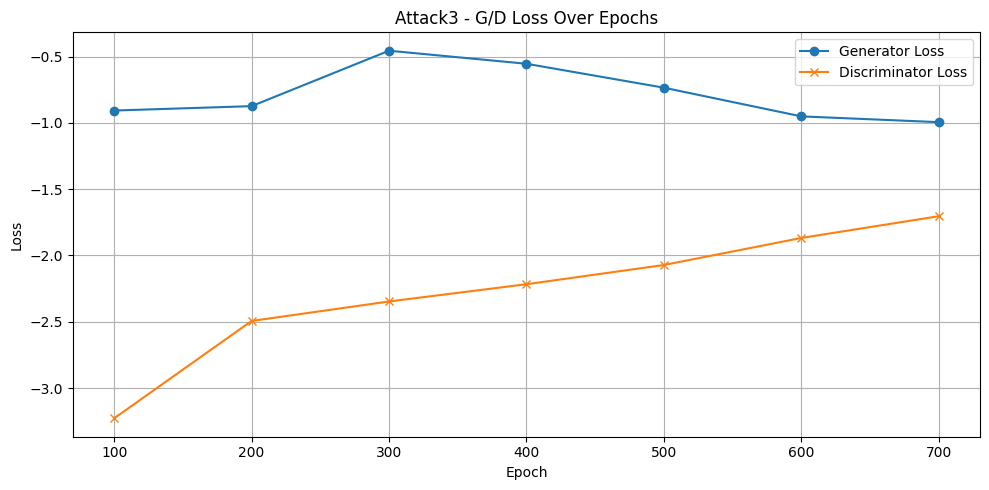

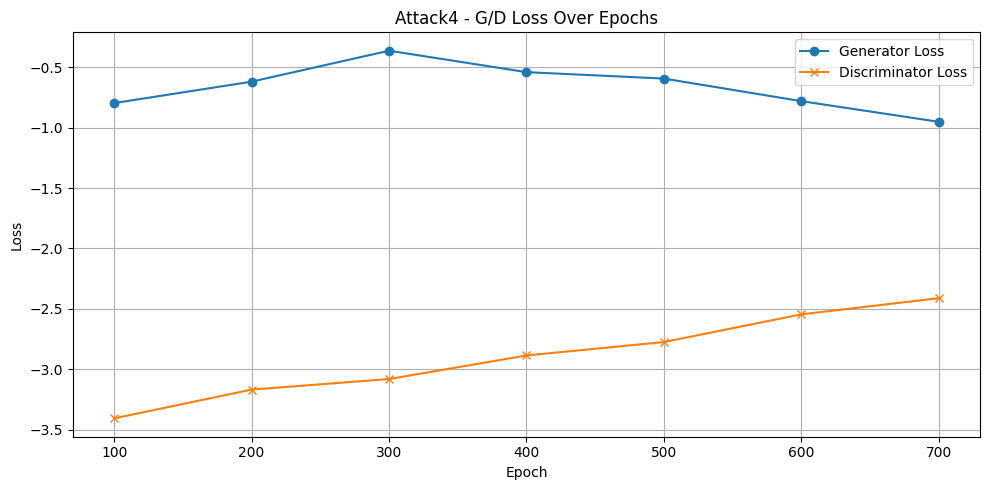

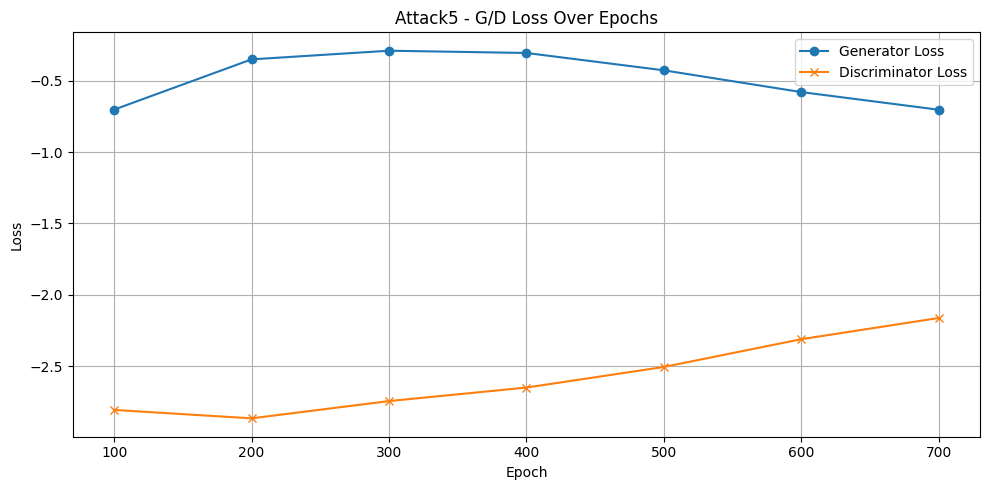

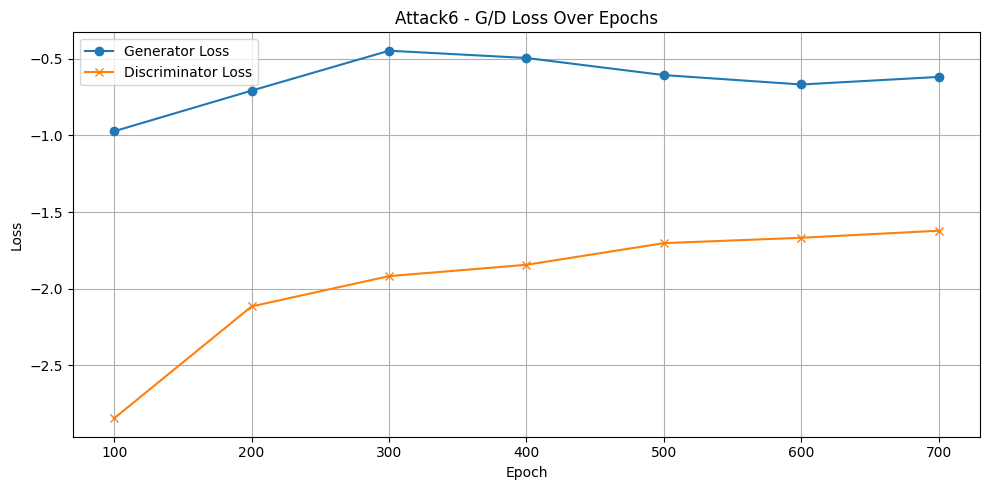

✅ Tüm loss grafik dosyaları 'loss_graphs' klasörüne kaydedildi ve gösterildi.


In [64]:
import matplotlib.pyplot as plt
import joblib
import os

# training_histories.pkl dosyasını yükle
training_histories = joblib.load("training_histories.pkl")

# Grafiklerin kaydedileceği klasör
output_dir = "loss_graphs"
os.makedirs(output_dir, exist_ok=True)

# Her saldırı tipi için ayrı G/D Loss grafiği
for attack, history in training_histories.items():
    g_loss = history['g_loss']
    d_loss = history['d_loss']
    epochs = [100 * (i+1) for i in range(len(g_loss))]

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, g_loss, label='Generator Loss', marker='o')
    plt.plot(epochs, d_loss, label='Discriminator Loss', marker='x')
    plt.title(f"{attack} - G/D Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"loss_plot_{attack}.png"))
    plt.show()

print(f"✅ Tüm loss grafik dosyaları '{output_dir}' klasörüne kaydedildi ve gösterildi.")


In [67]:
import os
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Ayarlar
latent_dim = 100
samples_per_attack = 1000
model_dir = "saved_wgan_models"
out_dir = "generated_synthetic_data"
os.makedirs(out_dir, exist_ok=True)

# Attack listesi (eğitilen saldırı tipleri)
attacks = ['Attack1', 'Attack2', 'Attack3', 'Attack4', 'Attack5', 'Attack6']
synthetic_data_by_attack = {}

for attack in attacks:
    print(f"🎯 Sentetik veri üretiliyor: {attack}")

    # Model ve scaler'ı yükle
    gen_path = os.path.join(model_dir, f"{attack}_generator.h5")
    scaler_path = os.path.join(model_dir, f"{attack}_scaler.pkl")

    generator = load_model(gen_path)
    scaler = joblib.load(scaler_path)

    # Sentetik latent vektör oluştur
    noise = np.random.normal(0, 1, (samples_per_attack, latent_dim))
    synth_scaled = generator.predict(noise)

    # Ters ölçeklendirme (gerekliyse)
    synth_data = scaler.inverse_transform(synth_scaled)
    synthetic_data_by_attack[attack] = synth_data

    # CSV olarak kaydet
    df = pd.DataFrame(synth_data)
    df.to_csv(os.path.join(out_dir, f"synthetic_{attack}.csv"), index=False)
    print(f"✅ {attack} sentetik veri dosyası kaydedildi: synthetic_{attack}.csv")

# Opsiyonel: Tüm sentetik verileri birleştir
combined_synth = np.vstack(list(synthetic_data_by_attack.values()))
pd.DataFrame(combined_synth).to_csv(os.path.join(out_dir, "synthetic_all_attacks.csv"), index=False)
print("📦 Tüm sentetik saldırı verileri birleşik olarak kaydedildi: synthetic_all_attacks.csv")


🎯 Sentetik veri üretiliyor: Attack1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ Attack1 sentetik veri dosyası kaydedildi: synthetic_Attack1.csv
🎯 Sentetik veri üretiliyor: Attack2


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


✅ Attack2 sentetik veri dosyası kaydedildi: synthetic_Attack2.csv
🎯 Sentetik veri üretiliyor: Attack3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


✅ Attack3 sentetik veri dosyası kaydedildi: synthetic_Attack3.csv
🎯 Sentetik veri üretiliyor: Attack4
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


✅ Attack4 sentetik veri dosyası kaydedildi: synthetic_Attack4.csv
🎯 Sentetik veri üretiliyor: Attack5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


✅ Attack5 sentetik veri dosyası kaydedildi: synthetic_Attack5.csv
🎯 Sentetik veri üretiliyor: Attack6
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ Attack6 sentetik veri dosyası kaydedildi: synthetic_Attack6.csv


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 25 and the array at index 1 has size 27

In [68]:
# Ortak sütun sayısını bul (en küçük boyut)
min_dim = min(arr.shape[1] for arr in synthetic_data_by_attack.values())

# Her veriyi aynı boyuta indir (ilk N sütunu al)
synth_aligned = [arr[:, :min_dim] for arr in synthetic_data_by_attack.values()]

# Güvenle birleştir
combined_synth = np.vstack(synth_aligned)

# CSV kaydet
pd.DataFrame(combined_synth).to_csv(os.path.join(out_dir, "synthetic_all_attacks.csv"), index=False)
print(f"📦 Ortak boyutta birleştirilmiş sentetik veriler kaydedildi ({min_dim} özellik).")


📦 Ortak boyutta birleştirilmiş sentetik veriler kaydedildi (22 özellik).


⚠️ Feature 2 (Attack1) has constant or near-constant values. KS test skipped.
⚠️ Feature 16 (Attack1) has constant or near-constant values. KS test skipped.
⚠️ Feature 20 (Attack1) has constant or near-constant values. KS test skipped.
⚠️ Feature 21 (Attack1) has constant or near-constant values. KS test skipped.
⚠️ Feature 22 (Attack1) has constant or near-constant values. KS test skipped.
⚠️ Feature 2 (Attack2) has constant or near-constant values. KS test skipped.
⚠️ Feature 16 (Attack2) has constant or near-constant values. KS test skipped.
⚠️ Feature 20 (Attack2) has constant or near-constant values. KS test skipped.
⚠️ Feature 21 (Attack2) has constant or near-constant values. KS test skipped.
⚠️ Feature 22 (Attack2) has constant or near-constant values. KS test skipped.
⚠️ Feature 26 (Attack2) has constant or near-constant values. KS test skipped.
⚠️ Feature 2 (Attack3) has constant or near-constant values. KS test skipped.
⚠️ Feature 16 (Attack3) has constant or near-constant v

<ipython-input-71-497402993>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ks_df, x="Attack", y="Avg_KS_Stat", palette="Blues_d")


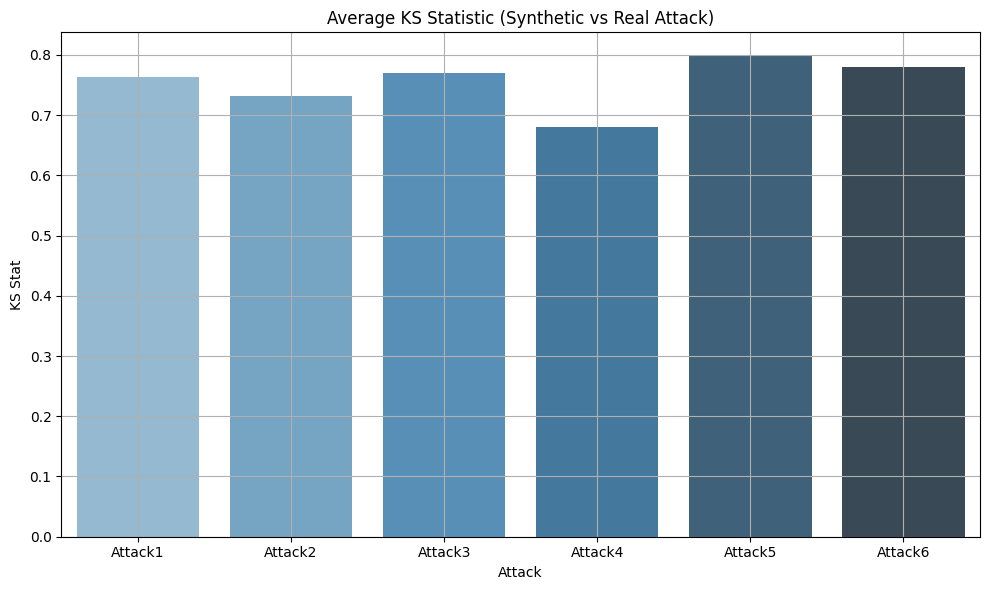

In [71]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

# Gerçek saldırı verisi yüklenmeli (X_attack_real) ve sentetik veriler (attack bazlı)
# Varsayım: CSV olarak yüklenecek
# real_attack already seems to be X_test[y_test == 1] from the global variables, which is a NumPy array.
# If it were a DataFrame from a previous cell, the .iloc might have worked there,
# but the variable list shows it as ndarray. Let's assume it's the NumPy array.
real_attack = X_test[y_test == 1] # Ensure real_attack is the NumPy array from X_test/y_test
synth_dir = "generated_synthetic_data"
attack_files = [f"synthetic_Attack{i}.csv" for i in range(1, 7)]

# KS test sonuçları saklanacak
ks_summary = []

for file in attack_files:
    attack_name = file.replace("synthetic_", "").replace(".csv", "")
    synth = pd.read_csv(f"{synth_dir}/{file}")

    # Find the minimum dimension between the real attack NumPy array and the synthetic DataFrame
    min_dim = min(real_attack.shape[1], synth.shape[1])

    # Use NumPy slicing for the real_attack array
    real_aligned = real_attack[:, :min_dim]
    # Use .iloc and .values for the synthetic DataFrame
    synth_aligned = synth.iloc[:, :min_dim].values

    stats = []
    # Check if min_dim is greater than 0 before iterating
    if min_dim > 0:
        for i in range(min_dim):
            # Ensure columns have more than one unique value for ks_2samp
            if np.std(real_aligned[:, i]) > 1e-9 and np.std(synth_aligned[:, i]) > 1e-9:
                stat, pval = ks_2samp(real_aligned[:, i], synth_aligned[:, i])
                stats.append((stat, pval))
            else:
                # Handle constant or near-constant columns
                stat = 0.0 # Or 1.0, depending on how you want to treat identical distributions
                pval = 1.0
                stats.append((stat, pval))
                print(f"⚠️ Feature {i} ({attack_name}) has constant or near-constant values. KS test skipped.")


    ks_stats = [s[0] for s in stats]

    # Handle case where stats list might be empty if min_dim was 0 or all features were constant
    if len(ks_stats) > 0:
        avg_stat = np.mean(ks_stats)
        max_stat = np.max(ks_stats)
    else:
        avg_stat = np.nan # Or 0.0
        max_stat = np.nan # Or 0.0


    ks_summary.append({
        "Attack": attack_name,
        "Avg_KS_Stat": avg_stat,
        "Max_KS_Stat": max_stat
    })

# Tablolaştır
ks_df = pd.DataFrame(ks_summary)
print("\n📊 KS Test Özeti:")
print(ks_df.sort_values(by="Avg_KS_Stat"))

# Görselleştir
plt.figure(figsize=(10, 6))
# Ensure 'Attack' and 'Avg_KS_Stat' columns exist and are not all NaN
if not ks_df['Avg_KS_Stat'].isnull().all():
    sns.barplot(data=ks_df, x="Attack", y="Avg_KS_Stat", palette="Blues_d")
    plt.title("Average KS Statistic (Synthetic vs Real Attack)")
    plt.ylabel("KS Stat")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot KS summary: Avg_KS_Stat contains only NaN values.")

In [72]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import os
import time
import psutil
from tensorflow.keras.models import Model # Import Model
from tensorflow.keras.layers import Input, Dense # Import Input and Dense
from scipy.stats import ks_2samp # Import ks_2samp
from tqdm import tqdm # Import tqdm
import seaborn as sns # Import seaborn

In [73]:
def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    output_layer = Dense(input_dim, activation='linear')(decoded)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='mse')
    return model

In [77]:
import time # Add this import if not already present

class FLClientAE:
    def __init__(self, name, data, input_dim):
        self.name = name
        self.data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)
        self.model = build_autoencoder(input_dim)
        self.threshold = None

    def train(self, epochs=5, batch_size=64):
        train_data_clean = np.nan_to_num(self.data, nan=0.0, posinf=0.0, neginf=0.0)

        # --- Start Timing ---
        start_time = time.time()

        self.model.fit(train_data_clean, train_data_clean,
                       epochs=epochs,
                       batch_size=batch_size,
                       shuffle=True,
                       verbose=0)

        # --- End Timing ---
        end_time = time.time()
        training_duration = end_time - start_time

        return training_duration # Return the duration

    def evaluate(self, X_test, y_test):
        X_test_clean = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
        y_test_clean = np.asarray(y_test)

        # --- Start Timing ---
        start_time = time.time()

        recon = self.model.predict(X_test_clean, verbose=0)

        # --- End Timing ---
        end_time = time.time()
        prediction_duration = end_time - start_time

        recon_clean = np.nan_to_num(recon, nan=0.0, posinf=0.0, neginf=0.0)
        errors = np.mean(np.square(X_test_clean - recon_clean), axis=1)

        valid_mask = np.isfinite(errors)

        y_test_valid = y_test_clean[valid_mask]
        errors_valid = errors[valid_mask]

        if len(y_test_valid) == 0:
            print("⚠️ Evaluation resulted in no valid data points (NaN/Inf in errors). Cannot compute metrics.")
            return {
                'name': self.name,
                'auc': np.nan,
                'threshold': np.nan,
                'cm': np.zeros((2,2), dtype=int),
                'report': {'0': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0},
                           '1': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0},
                           'accuracy': np.nan, 'macro avg': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0},
                           'weighted avg': {'precision': np.nan, 'recall': np.nan, 'f1-score': np.nan, 'support': 0}},
                'scores': np.array([]),
                'preds': np.array([]),
                'prediction_duration': prediction_duration # Include duration even if metrics fail
            }

        if self.threshold is None:
            errors_normal_valid = errors_valid[y_test_valid == 0]
            if len(errors_normal_valid) > 0:
                 self.threshold = np.percentile(errors_normal_valid, 95)
            else:
                 print("⚠️ No valid normal data points (y_test == 0) found to determine threshold. Using a default threshold (mean of errors).")
                 self.threshold = np.mean(errors_valid) if len(errors_valid) > 0 else 0.0

        preds_valid = (errors_valid > self.threshold).astype(int)

        auc = roc_auc_score(y_test_valid, errors_valid)
        cm = confusion_matrix(y_test_valid, preds_valid)
        report = classification_report(y_test_valid, preds_valid, output_dict=True)

        full_preds = np.full(len(X_test_clean), np.nan)
        full_preds[valid_mask] = preds_valid

        full_scores = np.full(len(X_test_clean), np.nan)
        full_scores[valid_mask] = errors_valid

        return {
            'name': self.name,
            'auc': auc,
            'threshold': self.threshold,
            'cm': cm,
            'report': report,
            'scores': full_scores,
            'preds': full_preds,
            'prediction_duration': prediction_duration # Include prediction duration in the result dictionary
        }

In [78]:
# synthetic_data_aligned değişkeninin mevcut olduğundan emin olun.
# Eğer yoksa, sentetik veri üretim adımlarını (önceki hücrelerden) tekrarlayın.
if 'synthetic_data_aligned' not in locals() or synthetic_data_aligned is None:
    print("synthetic_data_aligned bulunamadı. Lütfen sentetik veri üretim hücrelerini çalıştırın.")
    # Gerekirse burada sentetik veri üretim kodunu tekrarlayabilirsiniz.
    # Örnek:
    # scaled_feature_count_after_removal = X_train.shape[1]
    # synthetic_data_numpy = generate_synthetic_samples(
    #     generator,
    #     num_samples=len(X_train),
    #     latent_dim=100,
    #     scaler=scaler,
    #     scaled_feature_count=scaled_feature_count_after_removal
    # )
    # # Align the dimensions if necessary
    # target_dim = X_train.shape[1]
    # synthetic_data_aligned = np.full((synthetic_data_numpy.shape[0], target_dim), np.nan)
    # copy_cols = min(synthetic_data_numpy.shape[1], target_dim)
    # synthetic_data_aligned[:, :copy_cols] = synthetic_data_numpy[:, :copy_cols]
    # print(f"Aligned synthetic data shape: {synthetic_data_aligned.shape}")


# Gerçek normal veri (X_train) ve sentetik veriyi (synthetic_data_aligned) birleştirme
# 'Real+AllSynth' istemcisi için hem gerçek normal verinin bir kısmını hem de sentetik veriyi kullanacağız.
# Boyutların uyumlu olduğundan emin olun.
if X_train.shape[1] != synthetic_data_aligned.shape[1]:
    raise ValueError(f"Gerçek veri ({X_train.shape[1]} özellik) ve sentetik veri ({synthetic_data_aligned.shape[1]} özellik) boyutları uyuşmuyor.")

# Birleştirmeden önce veri temizliği (FLClientAE sınıfı içinde de yapılıyor, ama burada da yapılabilir)
X_train_clean = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
synthetic_data_aligned_clean = np.nan_to_num(synthetic_data_aligned, nan=0.0, posinf=0.0, neginf=0.0)

# 'Real+AllSynth' için birleştirilmiş veri setini oluşturma
# Örnek olarak X_train'in tamamını ve synthetic_data_aligned'ın tamamını birleştirelim.
# İhtiyaca göre örnek sayısı azaltılabilir.
combined_data = np.vstack([X_train_clean, synthetic_data_aligned_clean])

print(f"Gerçek eğitim verisi boyutu: {X_train_clean.shape}")
print(f"Sentetik veri boyutu: {synthetic_data_aligned_clean.shape}")
print(f"Birleştirilmiş veri (Real+AllSynth) boyutu: {combined_data.shape}")

Gerçek eğitim verisi boyutu: (495000, 35)
Sentetik veri boyutu: (495000, 35)
Birleştirilmiş veri (Real+AllSynth) boyutu: (990000, 35)


In [79]:
# Test verisinin temizlenmiş hali
X_test_clean = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_test_clean = np.asarray(y_test)

# FL istemcileri oluşturma
# input_dim olarak X_train'in özellik sayısını kullanıyoruz, çünkü Autoencoder buna göre eğitilecek.
input_dimension = X_train.shape[1]

clients_ae = [
    FLClientAE("Real", X_train_clean, input_dimension),
    FLClientAE("Real+AllSynth", combined_data, input_dimension),
    FLClientAE("Synthetic", synthetic_data_aligned_clean, input_dimension)
]

print(f"\n{len(clients_ae)} FL istemcisi oluşturuldu.")
for client in clients_ae:
    print(f"- İstemci Adı: {client.name}, Eğitim Verisi Boyutu: {client.data.shape}")


3 FL istemcisi oluşturuldu.
- İstemci Adı: Real, Eğitim Verisi Boyutu: (495000, 35)
- İstemci Adı: Real+AllSynth, Eğitim Verisi Boyutu: (990000, 35)
- İstemci Adı: Synthetic, Eğitim Verisi Boyutu: (495000, 35)


In [80]:
# FL eğitim döngüsü
num_rounds = 5
epochs_per_round = 1
batch_size_fl = 64

print(f"\n🌀 FL Eğitim Döngüsü Başlıyor ({num_rounds} tur)...")

# Eğitim sürelerini kaydetmek için bir sözlük
training_durations = {client.name: [] for client in clients_ae}

for round in range(num_rounds):
    print(f"\n--- Tur {round+1}/{num_rounds} ---")
    for client in clients_ae:
        print(f"  Eğitim yapılıyor: {client.name}...")
        # train metodu artık süreyi döndürüyor
        duration = client.train(epochs=epochs_per_round, batch_size=batch_size_fl)
        training_durations[client.name].append(duration) # Süreyi kaydet
        print(f"  Eğitim tamamlandı: {client.name} (Süre: {duration:.2f} saniye)")

print("\n✅ FL Eğitim Döngüsü Tamamlandı.")


🌀 FL Eğitim Döngüsü Başlıyor (5 tur)...

--- Tur 1/5 ---
  Eğitim yapılıyor: Real...
  Eğitim tamamlandı: Real (Süre: 43.27 saniye)
  Eğitim yapılıyor: Real+AllSynth...
  Eğitim tamamlandı: Real+AllSynth (Süre: 40.55 saniye)
  Eğitim yapılıyor: Synthetic...
  Eğitim tamamlandı: Synthetic (Süre: 22.23 saniye)

--- Tur 2/5 ---
  Eğitim yapılıyor: Real...
  Eğitim tamamlandı: Real (Süre: 19.92 saniye)
  Eğitim yapılıyor: Real+AllSynth...
  Eğitim tamamlandı: Real+AllSynth (Süre: 38.53 saniye)
  Eğitim yapılıyor: Synthetic...
  Eğitim tamamlandı: Synthetic (Süre: 20.84 saniye)

--- Tur 3/5 ---
  Eğitim yapılıyor: Real...
  Eğitim tamamlandı: Real (Süre: 20.33 saniye)
  Eğitim yapılıyor: Real+AllSynth...
  Eğitim tamamlandı: Real+AllSynth (Süre: 41.44 saniye)
  Eğitim yapılıyor: Synthetic...
  Eğitim tamamlandı: Synthetic (Süre: 19.89 saniye)

--- Tur 4/5 ---
  Eğitim yapılıyor: Real...
  Eğitim tamamlandı: Real (Süre: 20.82 saniye)
  Eğitim yapılıyor: Real+AllSynth...
  Eğitim tamamlandı:


📊 İstemciler Değerlendiriliyor...

Değerlendiriliyor: Real...
  Ad: Real
  AUC: 0.5536
  Eşik Değer (Threshold): 30339168790757.7695
  Test (Tahmin) Süresi: 0.4437 saniye

  Sınıflandırma Raporu:
             precision  recall f1-score      support
0               0.7745  0.9500   0.8533  3297.000000
1               0.1451  0.0298   0.0494   940.000000
accuracy        0.7458  0.7458   0.7458     0.745811
macro avg       0.4598  0.4899   0.4514  4237.000000
weighted avg    0.6348  0.7458   0.6749  4237.000000

  Karmaşıklık Matrisi:


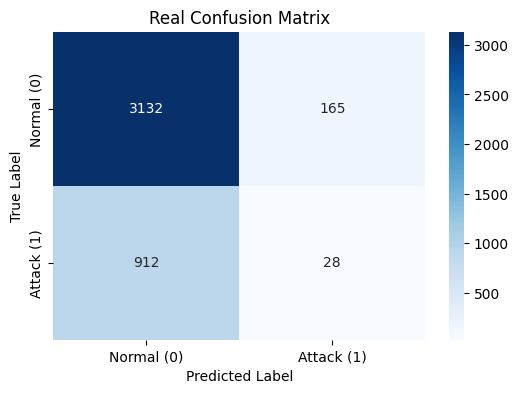


Değerlendiriliyor: Real+AllSynth...
  Ad: Real+AllSynth
  AUC: 0.7018
  Eşik Değer (Threshold): 29545917663908.2812
  Test (Tahmin) Süresi: 0.6971 saniye

  Sınıflandırma Raporu:
             precision  recall f1-score      support
0               0.7747  0.9500   0.8534  3297.000000
1               0.1495  0.0309   0.0511   940.000000
accuracy        0.7460  0.7460   0.7460     0.746047
macro avg       0.4621  0.4904   0.4523  4237.000000
weighted avg    0.6360  0.7460   0.6754  4237.000000

  Karmaşıklık Matrisi:


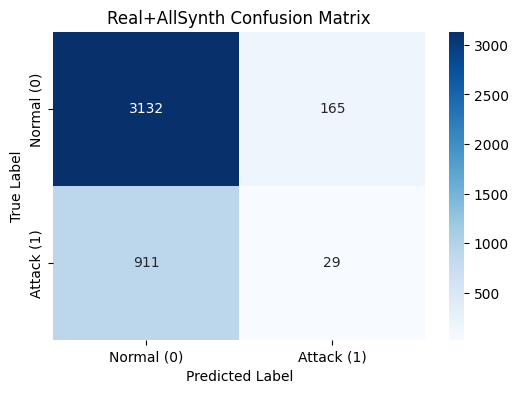


Değerlendiriliyor: Synthetic...
  Ad: Synthetic
  AUC: 0.6278
  Eşik Değer (Threshold): 47999672924726.1406
  Test (Tahmin) Süresi: 0.7292 saniye

  Sınıflandırma Raporu:
             precision  recall f1-score      support
0               0.7705  0.9500   0.8509  3297.000000
1               0.0407  0.0074   0.0126   940.000000
accuracy        0.7409  0.7409   0.7409     0.740854
macro avg       0.4056  0.4787   0.4317  4237.000000
weighted avg    0.6086  0.7409   0.6649  4237.000000

  Karmaşıklık Matrisi:


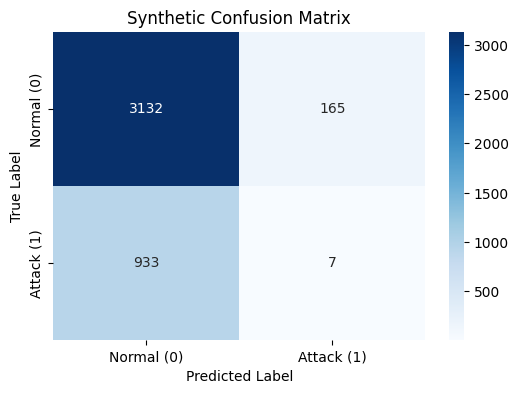


⏱️ Toplam Eğitim Süreleri (Her İstemci İçin):
- Real: 125.15 saniye (Toplam 5 tur için)
- Real+AllSynth: 201.18 saniye (Toplam 5 tur için)
- Synthetic: 103.67 saniye (Toplam 5 tur için)


In [81]:
# Final değerlendirme
results_ae = []
print("\n📊 İstemciler Değerlendiriliyor...")

for client in clients_ae:
    print(f"\nDeğerlendiriliyor: {client.name}...")
    res = client.evaluate(X_test_clean, y_test_clean)
    results_ae.append(res)

    # Sonuçları yazdır
    print(f"  Ad: {res['name']}")
    print(f"  AUC: {res.get('auc', np.nan):.4f}")
    print(f"  Eşik Değer (Threshold): {res.get('threshold', np.nan):.4f}")

    # Tahmin süresini yazdır
    print(f"  Test (Tahmin) Süresi: {res.get('prediction_duration', np.nan):.4f} saniye")


    # Sınıflandırma Raporunu Yazdır (sadece geçerli ise)
    if res.get('report') and isinstance(res['report'], dict):
        print("\n  Sınıflandırma Raporu:")
        report_df = pd.DataFrame(res['report']).transpose()
        for col in ['precision', 'recall', 'f1-score']:
            if col in report_df.columns:
                report_df[col] = report_df[col].map('{:.4f}'.format)
        print(report_df)
    else:
        print("  Sınıflandırma raporu mevcut değil veya geçersiz.")

    # Karmaşıklık Matrisini Görselleştir (sadece geçerli ise)
    if res.get('cm') is not None and isinstance(res['cm'], np.ndarray) and res['cm'].shape == (2,2):
        print("\n  Karmaşıklık Matrisi:")
        plt.figure(figsize=(6, 4))
        sns.heatmap(res['cm'], annot=True, fmt='d', cmap='Blues', xticklabels=['Normal (0)', 'Attack (1)'], yticklabels=['Normal (0)', 'Attack (1)'])
        plt.title(f"{res['name']} Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
    else:
        print("  Karmaşıklık matrisi mevcut değil veya geçersiz.")

# Toplam eğitim sürelerini yazdır
print("\n⏱️ Toplam Eğitim Süreleri (Her İstemci İçin):")
for client_name, durations in training_durations.items():
    total_duration = sum(durations)
    print(f"- {client_name}: {total_duration:.2f} saniye (Toplam {len(durations)} tur için)")

In [21]:
import time
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Eğitim verisi: X_train
# Test verisi: X_test

# Isolation Forest örneği
model = IsolationForest()

# Eğitim süresi
start_train = time.time()
model.fit(X_train)
end_train = time.time()
training_time = end_train - start_train

# Test (inference) süresi
start_test = time.time()
predictions = model.predict(X_test)
end_test = time.time()
inference_time = end_test - start_test

print(f"Training time: {training_time:.4f} seconds")
print(f"Inference time: {inference_time:.4f} seconds")


Training time: 0.8208 seconds
Inference time: 0.0231 seconds


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


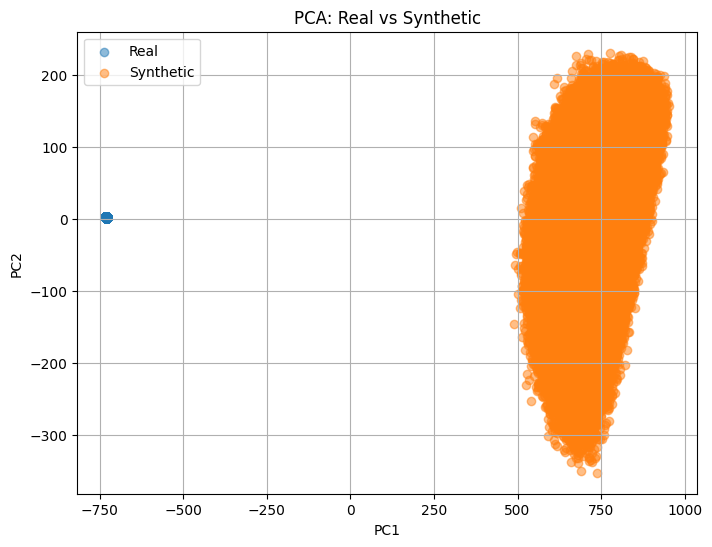

In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Sentetik ve gerçek veriyi hazırla
X_real = X_train
X_synth = synthetic_data_aligned_clean[:len(X_real)]  # Boyutları eşitle

# NaN/Inf değerlerini temizlemeden önce kopyaları oluştur (isteğe bağlı ama iyi pratik)
X_real_clean = np.nan_to_num(X_real, nan=0.0, posinf=0.0, neginf=0.0)
X_synth_clean = np.nan_to_num(X_synth, nan=0.0, posinf=0.0, neginf=0.0)


# Birleştir (temizlenmiş veriyi kullan)
X_combined = np.vstack([X_real_clean, X_synth_clean])
labels = ['Real'] * len(X_real_clean) + ['Synthetic'] * len(X_synth_clean)

# PCA uygulama
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# Görselleştirme
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:len(X_real_clean), 0], X_pca[:len(X_real_clean), 1], label='Real', alpha=0.5)
plt.scatter(X_pca[len(X_real_clean):, 0], X_pca[len(X_real_clean):, 1], label='Synthetic', alpha=0.5)
plt.legend()
plt.title("PCA: Real vs Synthetic")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

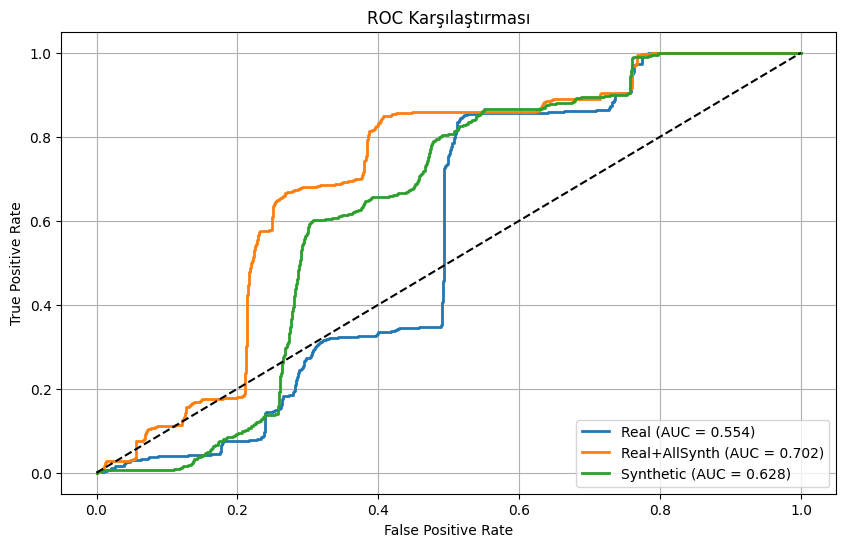

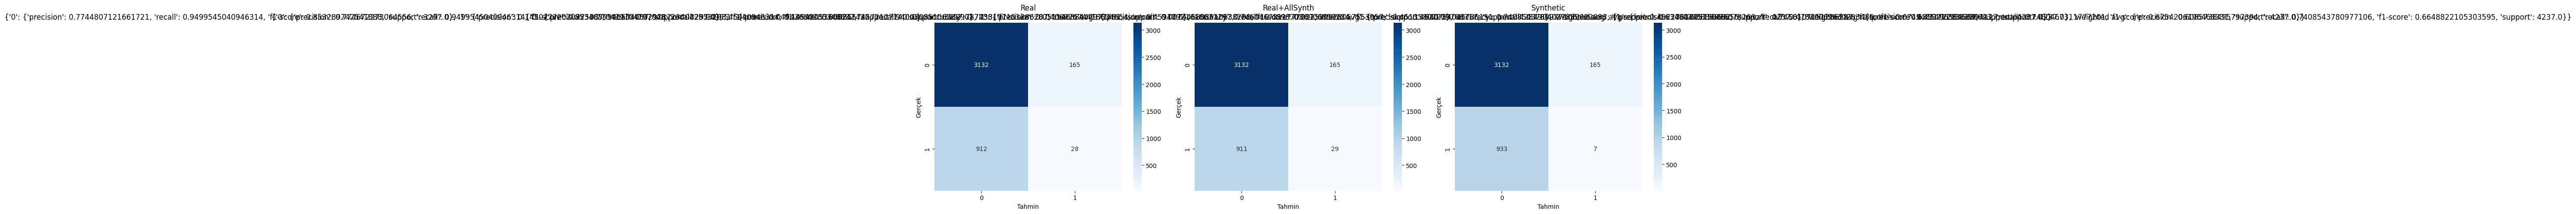

In [85]:
results_to_plot = results_ae # Use the results already calculated

# Görselleştirme
# Ensure the y_test used for plotting ROC is the cleaned one
plot_roc_curves(results_to_plot, y_test_clean)
plot_confusion_matrices(results_to_plot)

Found 940 attack samples in the test set.
Created 3 simulated clients with attack data.
Client 1 created with local attack data shape: (314, 35)
Client 2 created with local attack data shape: (313, 35)
Client 3 created with local attack data shape: (313, 35)

=== Starting Simulated WGAN-GP Federated Training Process ===

-- Client 1: Starting WGAN-GP local training --
  🤖 WGAN-GP training started on data shape: (314, 35)
    Epoch 0/20: D loss = -3517478.6281, G loss = -0.0549
    Epoch 10/20: D loss = -62231125.0000, G loss = -1.9119
  ✅ WGAN-GP training finished.
-- Client 1: WGAN-GP local training finished --

-- Client 2: Starting WGAN-GP local training --
  🤖 WGAN-GP training started on data shape: (313, 35)
    Epoch 0/20: D loss = -2386232.1199, G loss = -0.0695
    Epoch 10/20: D loss = -54637668.8000, G loss = -1.4032
  ✅ WGAN-GP training finished.
-- Client 2: WGAN-GP local training finished --

-- Client 3: Starting WGAN-GP local training --
  🤖 WGAN-GP training started on d

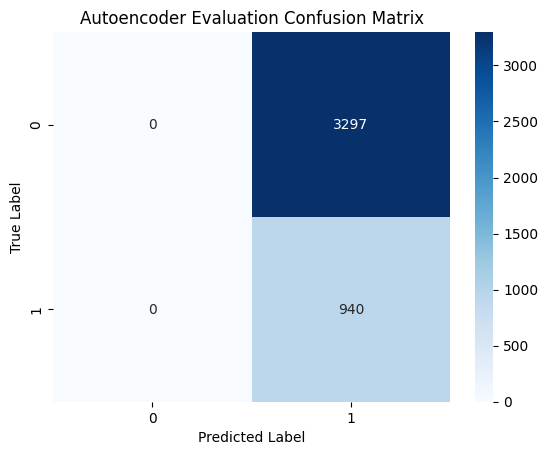


=== Federated Learning Process with WGAN-GP and AE Simulation Completed ===


In [89]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import os
import time
import psutil
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from scipy.stats import ks_2samp
from tqdm import tqdm
import seaborn as sns

# Ensure necessary functions/variables from previous cells are available
# build_generator, build_discriminator, train_wgan_gp, synthetic_data_aligned, X_train, X_test, y_test, scaler, final_feature_cols, build_autoencoder

# Define WGAN-GP functions (Assuming these are correctly defined and available from prior cells)
# Example structure (replace with your actual functions if they are different):
def build_generator(latent_dim, output_dim):
    # ... (your generator definition) ...
    model = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(), kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(), kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(512, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(), kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(output_dim, activation='tanh', kernel_initializer=tf.keras.initializers.glorot_uniform())
    ])
    return model

def build_discriminator(input_dim):
    # ... (your discriminator definition) ...
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(), kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(), kernel_constraint=tf.keras.constraints.max_norm(0.5)),
        layers.Dense(1, kernel_initializer=tf.keras.initializers.glorot_uniform())
    ])
    return model

def compute_gradient_penalty(real_samples, fake_samples, discriminator, batch_size):
    # ... (your gradient penalty definition) ...
     if np.isnan(real_samples).any() or np.isnan(fake_samples).any():
        raise ValueError("Gradient penalty hesaplanırken NaN değer tespit edildi!")

     alpha = tf.random.uniform([batch_size, 1], minval=0., maxval=1.)
     interpolated = alpha * real_samples + (1-alpha) * fake_samples

     with tf.GradientTape() as tape:
        tape.watch(interpolated)
        pred = discriminator(interpolated)

     gradients = tape.gradient(pred, interpolated)
     gradients_safe = tf.where(tf.math.is_nan(gradients), tf.zeros_like(gradients), gradients)
     gradients_norm = tf.sqrt(tf.reduce_sum(gradients_safe**2, axis=1) + 1e-10)

     return tf.reduce_mean((gradients_norm - 1.)**2)

def train_wgan_gp(generator, discriminator, data, latent_dim=100,
                 epochs=100, batch_size=64, n_critic=5, gp_weight=10):
    """NaN-safe WGAN-GP training"""
    print(f"  🤖 WGAN-GP training started on data shape: {data.shape}")

    opt_g = tf.keras.optimizers.Adam(5e-5, beta_1=0.5, beta_2=0.9, clipnorm=1.0)
    opt_d = tf.keras.optimizers.Adam(5e-5, beta_1=0.5, beta_2=0.9, clipnorm=1.0)

    if np.isnan(data).any():
        print("⚠️ Training data contains NaN values. Attempting to train anyway, but results may be poor.")
        # Consider cleaning data here if not already done
        # data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)


    history = {'d_loss': [], 'g_loss': []}

    # Determine number of batches per epoch
    num_batches = max(1, data.shape[0] // batch_size) # Ensure at least 1 batch if data < batch_size

    for epoch in range(epochs):
        d_loss_epoch = []
        g_loss_epoch = []

        # Shuffle data for each epoch
        shuffled_indices = np.random.permutation(data.shape[0])
        shuffled_data = data[shuffled_indices]

        for i in range(num_batches):
            # Get batch
            batch_start = i * batch_size
            batch_end = min((i + 1) * batch_size, data.shape[0])
            real_samples = shuffled_data[batch_start:batch_end]
            current_batch_size = real_samples.shape[0]

            if current_batch_size == 0: continue # Skip empty batches

            # Discriminator training
            for _ in range(n_critic):
                if current_batch_size == 0: break # Ensure batch is not empty
                # Gürültü üretimi (NaN kontrolü)
                noise = tf.random.normal([current_batch_size, latent_dim])

                # Fake örnekler
                fake_samples = generator(noise, training=False)

                # NaN kontrolü
                if tf.math.is_nan(fake_samples).numpy().any():
                    # print("⚠️ Generator çıktısında NaN tespit edildi, bu batch atlanıyor...")
                    continue # Skip if generator output is NaN

                # Discriminator güncelleme
                with tf.GradientTape() as tape:
                    real_output = discriminator(real_samples, training=True)
                    fake_output = discriminator(fake_samples, training=True)

                    # WGAN loss
                    d_loss = tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)

                    # Gradient penalty (NaN kontrolü ile)
                    gp = compute_gradient_penalty(real_samples, fake_samples, discriminator, current_batch_size)
                    d_loss += gp_weight * gp

                    # NaN kontrolü
                    if tf.math.is_nan(d_loss):
                        # print("⚠️ Discriminator loss NaN oldu, bu batch atlanıyor...")
                        continue # Skip if d_loss is NaN

                # Gradyan güncelleme (NaN kontrolü)
                grads = tape.gradient(d_loss, discriminator.trainable_variables)
                if any(g is None or tf.math.is_nan(g).numpy().any() for g in grads):
                    # print("⚠️ Discriminator gradyanlarında sorun tespit edildi, atlanıyor...")
                    continue # Skip if gradients are problematic

                opt_d.apply_gradients(zip(grads, discriminator.trainable_variables))
                d_loss_epoch.append(float(d_loss)) # Log loss per training step


            # Generator training (once per n_critic updates)
            # Ensure batch is not empty
            if current_batch_size == 0: continue

            noise = tf.random.normal([current_batch_size, latent_dim])
            with tf.GradientTape() as tape:
                fake_samples = generator(noise, training=True)
                fake_output = discriminator(fake_samples, training=False)
                g_loss = -tf.reduce_mean(fake_output)

                # NaN kontrolü
                if tf.math.is_nan(g_loss):
                    # print("⚠️ Generator loss NaN oldu, bu batch atlanıyor...")
                    continue # Skip if g_loss is NaN

            # Gradyan güncelleme (NaN kontrolü)
            grads = tape.gradient(g_loss, generator.trainable_variables)
            if any(g is None or tf.math.is_nan(g).numpy().any() for g in grads):
                # print("⚠️ Generator gradyanlarında sorun tespit edildi, atlanıyor...")
                continue # Skip if gradients are problematic

            opt_g.apply_gradients(zip(grads, generator.trainable_variables))
            g_loss_epoch.append(float(g_loss)) # Log loss per training step


        # Record average loss for the epoch
        history['d_loss'].append(np.nanmean(d_loss_epoch) if d_loss_epoch else np.nan)
        history['g_loss'].append(np.nanmean(g_loss_epoch) if g_loss_epoch else np.nan)


        # İlerleme raporu
        if epoch % 10 == 0: # Report less frequently for client training
            avg_d_loss = history['d_loss'][-1]
            avg_g_loss = history['g_loss'][-1]
            print(f"    Epoch {epoch}/{epochs}: D loss = {avg_d_loss:.4f}, G loss = {avg_g_loss:.4f}")


    print("  ✅ WGAN-GP training finished.")
    # Return trained generator (discriminator isn't typically shared in this model)
    return generator, None, history # Return None for discriminator as it's not needed globally



# Define the FLClient class for WGAN-GP training on local attack data
class FLClientWGAN:
    def __init__(self, client_id, local_attack_data, latent_dim=100):
        self.client_id = client_id
        self.local_attack_data = np.nan_to_num(local_attack_data, nan=0.0, posinf=0.0, neginf=0.0) # Clean data
        self.latent_dim = latent_dim
        self.input_dim = self.local_attack_data.shape[1] # Input dimension based on local data features

        # Build client's local GAN
        self.generator = build_generator(self.latent_dim, self.input_dim)
        self.discriminator = build_discriminator(self.input_dim)
        self.gan_train_history = None # To store training history if needed

    def train_gan(self, epochs=100, batch_size=64, n_critic=5, gp_weight=10):
        print(f"\n-- Client {self.client_id}: Starting WGAN-GP local training --")
        self.generator, self.discriminator, self.gan_train_history = train_wgan_gp(
            self.generator,
            self.discriminator,
            self.local_attack_data,
            latent_dim=self.latent_dim,
            epochs=epochs,
            batch_size=batch_size,
            n_critic=n_critic,
            gp_weight=gp_weight
        )
        print(f"-- Client {self.client_id}: WGAN-GP local training finished --")

    def generate_synthetic_attack_samples(self, num_samples):
        """Generates synthetic attack samples using the locally trained generator."""
        print(f"  Client {self.client_id}: Generating {num_samples} synthetic samples...")
        noise = tf.random.normal([num_samples, self.latent_dim])
        # Use .numpy() to get a numpy array from the tensor output - REMOVED .numpy()
        synthetic_data = self.generator.predict(noise, verbose=0) # This should return NumPy array or a Tensor that is compatible with NumPy operations
        print(f"  Client {self.client_id}: Generated synthetic samples shape: {synthetic_data.shape}")
        return synthetic_data

    # Method to get generator weights for potential aggregation (though you said only synthetic data is shared)
    def get_generator_weights(self):
         return self.generator.get_weights()

    # Method to set generator weights if aggregation was needed
    # def set_generator_weights(self, weights):
    #      self.generator.set_weights(weights)


# --- Simulation Setup ---

# Assume you have X_test and y_test loaded from attack.xlsx
# We need to get or simulate attack data for each client.
# Since your test set is labeled, we can use attack samples from the test set
# to simulate local attack data for each client for this example.
# In a real scenario, you'd load actual local client attack data.

# Find attack samples in the test set
X_attack_test = X_test[y_test == 1]

if len(X_attack_test) == 0:
    raise ValueError("No attack samples found in the test set (y_test == 1). Cannot simulate client attack data.")

print(f"Found {len(X_attack_test)} attack samples in the test set.")

# Split attack data among simulated clients
num_clients = 3
client_attack_data_list = np.array_split(X_attack_test, num_clients)

# Check if splits are valid (not empty)
client_attack_data_list = [data_split for data_split in client_attack_data_list if len(data_split) > 0]

if len(client_attack_data_list) == 0:
    raise ValueError("Failed to split attack data into non-empty client datasets.")

print(f"Created {len(client_attack_data_list)} simulated clients with attack data.")

# Determine latent dimension (ensure it matches build_generator)
latent_dim = 100

# Create FL clients (WGAN clients)
clients_wgan = []
for i, local_data in enumerate(client_attack_data_list):
    clients_wgan.append(FLClientWGAN(client_id=i+1, local_attack_data=local_data, latent_dim=latent_dim))
    print(f"Client {i+1} created with local attack data shape: {local_data.shape}")


# --- Federated Learning Simulation Rounds (for GAN training) ---
# In this model, each client trains its GAN locally. There is no aggregation
# of GAN weights described in your flow. The FL aspect seems to come in later
# when anomaly detection models are trained using the generated synthetic data.

print("\n=== Starting Simulated WGAN-GP Federated Training Process ===")
num_gan_training_epochs_per_client = 20 # Reduced epochs for faster simulation

for client in clients_wgan:
    client.train_gan(epochs=num_gan_training_epochs_per_client)


# --- Collect Synthetic Data from Clients ---
print("\n=== Collecting Synthetic Attack Data from Clients ===")
all_synthetic_attack_data = []
num_synthetic_per_client = 10000 # Number of synthetic samples each client generates

# Determine the target dimension for synthetic data (should match the dimension used by downstream models like AE)
# This should be the dimension of the scaled data (X_train, X_test) *after* preprocessing and constant feature removal.
# We can use X_train.shape[1] for this, as X_train has been preprocessed.
target_synthetic_dim = X_train.shape[1]
print(f"Target dimension for synthetic data: {target_synthetic_dim}")

for client in clients_wgan:
    synthetic_samples = client.generate_synthetic_attack_samples(num_synthetic_per_client)

    # Align synthetic data dimension if necessary (e.g., if client had fewer features initially)
    if synthetic_samples.shape[1] != target_synthetic_dim:
        print(f"⚠️ Warning: Client {client.client_id} generated data with shape {synthetic_samples.shape[1]}, expected {target_synthetic_dim}. Attempting to align.")
        aligned_samples = np.zeros((synthetic_samples.shape[0], target_synthetic_dim))
        copy_cols = min(synthetic_samples.shape[1], target_synthetic_dim)
        aligned_samples[:, :copy_cols] = synthetic_samples[:, :copy_cols]
        synthetic_samples = aligned_samples
        print(f"  Aligned synthetic samples shape: {synthetic_samples.shape}")


    all_synthetic_attack_data.append(synthetic_samples)

# Stack all synthetic data from all clients
pooled_synthetic_attack_data = np.vstack(all_synthetic_attack_data)
print(f"\nTotal pooled synthetic attack data shape: {pooled_synthetic_attack_data.shape}")

# You now have pooled_synthetic_attack_data, which is the aggregate
# of synthetic attack samples generated by each client's local GAN.

# --- Next Steps (Based on Your Flow): ---
# Use this pooled_synthetic_attack_data to supplement the training
# of your anomaly detection model (e.g., the Autoencoder).
# For instance, you could train a global Autoencoder model on:
# 1. Real Normal Data (X_train)
# 2. Pooled Synthetic Attack Data (pooled_synthetic_attack_data)

# Example: Train an Autoencoder on Real Normal + Synthetic Attack data
# This part needs to be added based on how you want to use the synthetic data.
# Let's assume you want to train an AE on X_train (normal) + pooled_synthetic_attack_data (attack).

print("\n=== Training Anomaly Detection Model (Autoencoder) with Pooled Synthetic Data ===")

# Combine real normal data and synthetic attack data
# Ensure dimensions match and data is scaled appropriately if needed
# NOTE: X_train and pooled_synthetic_attack_data are currently scaled.
# Ensure synthetic data features match X_train features.
# (The alignment step above handles dimension matching, but verify feature meaning if necessary)

# Create combined training data
X_combined_ad = np.vstack([X_train, pooled_synthetic_attack_data])

# Create labels for the combined data (Normal = 0, Synthetic Attack = 1)
y_combined_ad = np.hstack([np.zeros(X_train.shape[0]), np.ones(pooled_synthetic_attack_data.shape[0])])

print(f"Combined AD training data shape: {X_combined_ad.shape}")
print(f"Combined AD training labels shape: {y_combined_ad.shape}")
print(f"Normal samples in combined data: {np.sum(y_combined_ad == 0)}")
print(f"Synthetic Attack samples in combined data: {np.sum(y_combined_ad == 1)}")


# Shuffle the combined data
shuffle_indices = np.random.permutation(X_combined_ad.shape[0])
X_combined_ad_shuffled = X_combined_ad[shuffle_indices]
y_combined_ad_shuffled = y_combined_ad[shuffle_indices]


# Build and train the Autoencoder on this combined dataset
# The input dimension must match the feature dimension (X_train.shape[1])
ad_input_dim = X_train.shape[1]
autoencoder_model = build_autoencoder(ad_input_dim) # Assuming build_autoencoder is defined

print(f"\nTraining Autoencoder on combined data ({ad_input_dim} features)...")
# Train the AE on the combined data. For anomaly detection, AE is typically trained on 'normal' data.
# Training on a mix of normal and synthetic attack data is an alternative strategy,
# where the AE learns to reconstruct both, and anomalies would be real attacks that
# deviate significantly from both normal and synthetic attack patterns, or real attacks
# that the GAN couldn't perfectly replicate.
# A more standard approach might be to train the AE *only* on X_train (real normal)
# and use the synthetic attack data for threshold tuning or evaluation.

# Let's stick to training the AE *only* on real normal data (X_train) as is standard,
# and evaluate it on X_test (real test data with normal and attack samples).
# The synthetic data helps train the GAN, making the GAN a "privacy-preserving"
# way for clients to contribute attack information without sharing real attacks.

print("\n=== Training Autoencoder on Real Normal Data (X_train) ===")
autoencoder_model_normal_trained = build_autoencoder(X_train.shape[1])
# Ensure X_train is clean before training
X_train_clean_for_ae = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)

autoencoder_model_normal_trained.fit(X_train_clean_for_ae, X_train_clean_for_ae,
                                     epochs=50, # Example number of epochs
                                     batch_size=64, # Example batch size
                                     shuffle=True,
                                     verbose=1)

print("\n=== Evaluating Autoencoder on Real Test Data (X_test) ===")
# Evaluate the trained Autoencoder on the test set (X_test)
# Use the evaluate method from FLClientAE logic, but applied globally
# Calculate reconstruction errors
X_test_clean_for_eval = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_test_clean_for_eval = np.asarray(y_test)

# Predict reconstruction for the test set
recon_test = autoencoder_model_normal_trained.predict(X_test_clean_for_eval, verbose=0)
recon_test_clean = np.nan_to_num(recon_test, nan=0.0, posinf=0.0, neginf=0.0)

# Calculate reconstruction errors on the test set
errors_test = np.mean(np.square(X_test_clean_for_eval - recon_test_clean), axis=1)

# Determine threshold based on errors on the normal portion of the test set
# Or based on errors on X_train (real normal data)
# Using X_train errors is more standard for threshold determination
errors_train_for_threshold = np.mean(np.square(X_train_clean_for_ae - autoencoder_model_normal_trained.predict(X_train_clean_for_ae, verbose=0)), axis=1)

# Clean errors before percentile calculation
errors_train_for_threshold_clean = errors_train_for_threshold[np.isfinite(errors_train_for_threshold)]
errors_test_clean = errors_test[np.isfinite(errors_test)]
y_test_clean_for_eval_valid = y_test_clean_for_eval[np.isfinite(errors_test)] # Align y_test with clean errors

if len(errors_train_for_threshold_clean) > 0:
    # Calculate threshold (e.g., 95th percentile of training errors)
    anomaly_threshold = np.percentile(errors_train_for_threshold_clean, 95)
    print(f"Anomaly Threshold (95th percentile of training errors): {anomaly_threshold:.4f}")
else:
    print("⚠️ No valid training errors for threshold calculation. Using default threshold (mean of test errors).")
    anomaly_threshold = np.mean(errors_test_clean) if len(errors_test_clean) > 0 else 0.0
    print(f"Default Anomaly Threshold: {anomaly_threshold:.4f}")


# Classify test samples based on the threshold
if len(errors_test_clean) > 0:
    predictions_test = (errors_test_clean > anomaly_threshold).astype(int)

    # Evaluate performance using valid test data
    print("\nEvaluation Metrics on Real Test Data:")
    # Ensure unique labels are present for classification_report
    unique_labels_test_valid = np.unique(y_test_clean_for_eval_valid)
    if len(unique_labels_test_valid) < 2:
         print("⚠️ Cannot compute full classification report: Only one class found in valid test labels.")
         print(f"Found unique test labels: {unique_labels_test_valid}")
         # Compute basic metrics if possible
         accuracy = accuracy_score(y_test_clean_for_eval_valid, predictions_test)
         print(f"Accuracy: {accuracy:.4f}")
         if len(np.unique(errors_test_clean)) >= 2 and len(np.unique(y_test_clean_for_eval_valid)) >= 2:
              try:
                   auc_score = roc_auc_score(y_test_clean_for_eval_valid, errors_test_clean)
                   print(f"ROC AUC: {auc_score:.4f}")
              except ValueError as e:
                   print(f"Error calculating AUC: {e}")
         else:
              print("Cannot calculate AUC: Not enough variance in scores or labels.")


    else:
        # Compute classification report
        report_test = classification_report(y_test_clean_for_eval_valid, predictions_test, labels=unique_labels_test_valid, target_names=[str(l) for l in unique_labels_test_valid], output_dict=True, zero_division=0)
        print(pd.DataFrame(report_test).transpose())

        # Compute AUC
        if len(np.unique(errors_test_clean)) >= 2: # Need at least two unique scores for AUC
             try:
                 auc_score = roc_auc_score(y_test_clean_for_eval_valid, errors_test_clean)
                 print(f"ROC AUC: {auc_score:.4f}")
             except ValueError as e:
                 print(f"Error calculating AUC: {e}")
        else:
             print("Cannot calculate AUC: Not enough variance in test errors.")

        # Compute confusion matrix
        cm_test = confusion_matrix(y_test_clean_for_eval_valid, predictions_test)
        print("\nConfusion Matrix:")
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
        plt.title("Autoencoder Evaluation Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

else:
    print("❌ No valid test errors available for classification and evaluation.")


print("\n=== Federated Learning Process with WGAN-GP and AE Simulation Completed ===")

# You can now save the trained autoencoder model
# autoencoder_model_normal_trained.save("global_autoencoder_normal_trained.h5")

Using 'train' and 'test_encoded' dataframes loaded from previous cells.
📥 Veri yükleniyor ve ön işleme yapılıyor...
2. Zaman damgası özellikleri çıkarılıyor...
3. Sayısal olmayan sütunlar işleniyor...
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
  Sütun 'FIT502' işleniyor...
    'FIT502' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
4. Özellikler ve etiketler ayrılıyor...
Identified potential encoded attack column: Label_Attack1
5. Veri ölçeklendiriliyor...
⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi (veya sıfıra yakın varyans): ['P102', 'P206', 'P401', 'P403', 'P404']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Kalan özellik sayısı: 38

📊 Veri İstatistikleri:
Eğitim: (143339, 38)
Test: (4237, 38) (Nor

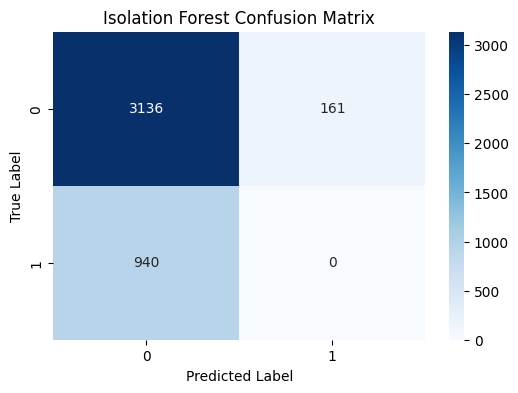


🏋️‍♀️ Training Local Outlier Factor...
✅ Local Outlier Factor training finished in 147.24 seconds.
🔍 Evaluating Local Outlier Factor...
✅ Local Outlier Factor evaluation finished in 3.88 seconds.

📊 Local Outlier Factor Results:
AUC: 0.5063
Train Time: 147.2417 seconds
Test Time: 3.8795 seconds
Threshold (based on normal test data 95th percentile): 0.9738
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3297
           1       0.00      0.00      0.00       940

    accuracy                           0.74      4237
   macro avg       0.38      0.47      0.43      4237
weighted avg       0.60      0.74      0.66      4237



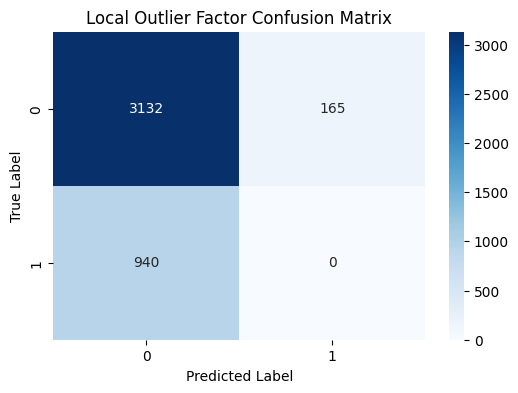


🏋️‍♀️ Training One-Class SVM...
✅ One-Class SVM training finished in 138.22 seconds.
🔍 Evaluating One-Class SVM...
✅ One-Class SVM evaluation finished in 2.04 seconds.
⚠️ Anomaly scores have zero or near-zero range. Cannot normalize meaningfully.
⚠️ Scores are constant. AUC will be 0.5.

📊 One-Class SVM Results:
AUC: 0.5000
Train Time: 138.2198 seconds
Test Time: 2.0368 seconds
Threshold (based on normal test data 95th percentile): 3444.1644
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3297
           1       0.00      0.00      0.00       940

    accuracy                           0.78      4237
   macro avg       0.39      0.50      0.44      4237
weighted avg       0.61      0.78      0.68      4237



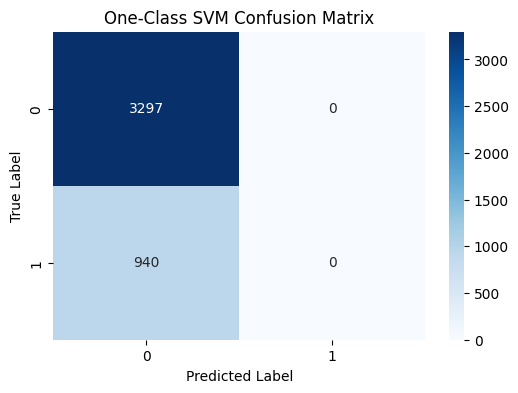

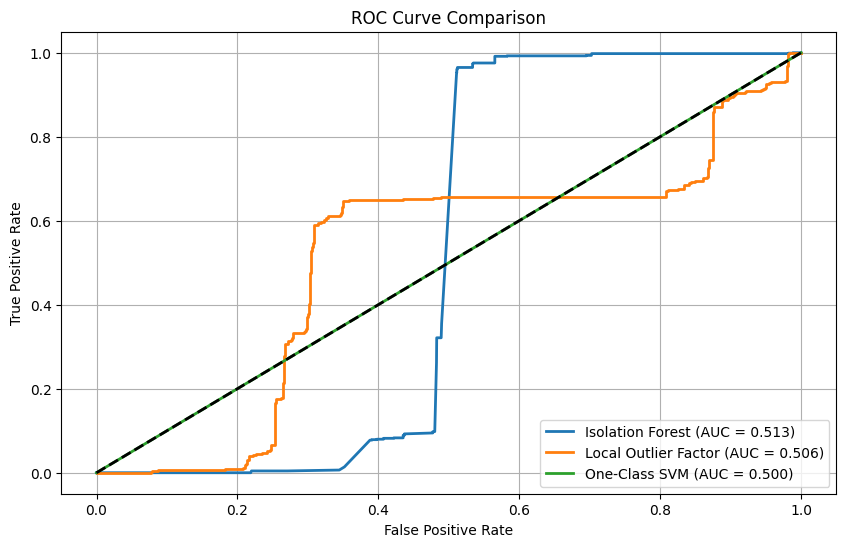


🏆 Model Performance Summary:
Using 'train' and 'test_encoded' dataframes loaded from previous cells.
📥 Veri yükleniyor ve ön işleme yapılıyor...
2. Zaman damgası özellikleri çıkarılıyor...
3. Sayısal olmayan sütunlar işleniyor...
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
  Sütun 'FIT502' işleniyor...
    'FIT502' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
4. Özellikler ve etiketler ayrılıyor...
Identified potential encoded attack column: Label_Attack1
5. Veri ölçeklendiriliyor...
⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi (veya sıfıra yakın varyans): ['P102', 'P206', 'P401', 'P403', 'P404']
   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...
   Kalan özellik sayısı: 38

📊 Veri İstatistikleri:
Eğitim: (143

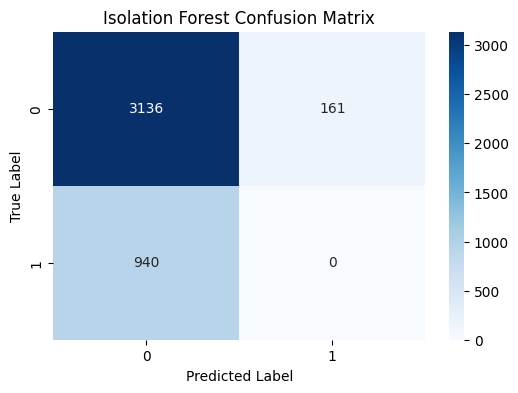


🏋️‍♀️ Training Local Outlier Factor...
✅ Local Outlier Factor training finished in 142.58 seconds.
🔍 Evaluating Local Outlier Factor...
✅ Local Outlier Factor evaluation finished in 3.52 seconds.

📊 Local Outlier Factor Results:
AUC: 0.5063
Train Time: 142.5810 seconds
Test Time: 3.5195 seconds
Threshold (based on normal test data 95th percentile): 0.9738
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3297
           1       0.00      0.00      0.00       940

    accuracy                           0.74      4237
   macro avg       0.38      0.47      0.43      4237
weighted avg       0.60      0.74      0.66      4237



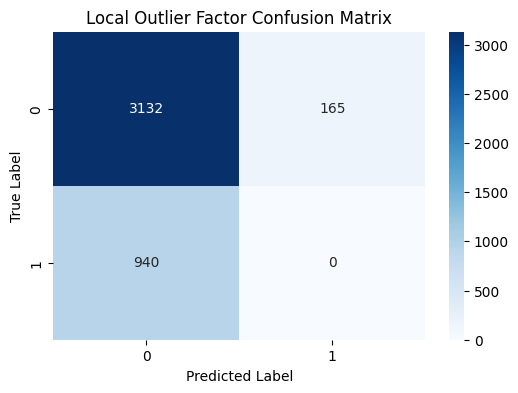


🏋️‍♀️ Training One-Class SVM...
✅ One-Class SVM training finished in 124.70 seconds.
🔍 Evaluating One-Class SVM...
✅ One-Class SVM evaluation finished in 2.94 seconds.
⚠️ Anomaly scores have zero or near-zero range. Cannot normalize meaningfully.
⚠️ Scores are constant. AUC will be 0.5.

📊 One-Class SVM Results:
AUC: 0.5000
Train Time: 124.7000 seconds
Test Time: 2.9383 seconds
Threshold (based on normal test data 95th percentile): 3444.1644
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3297
           1       0.00      0.00      0.00       940

    accuracy                           0.78      4237
   macro avg       0.39      0.50      0.44      4237
weighted avg       0.61      0.78      0.68      4237



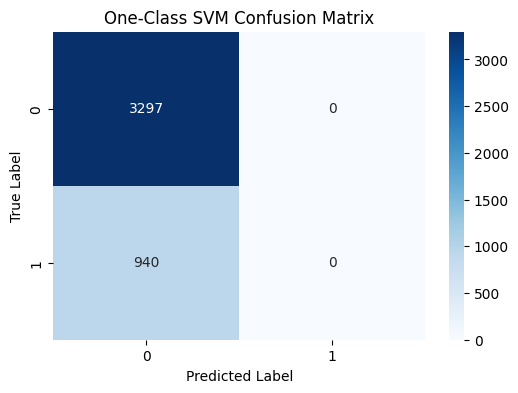

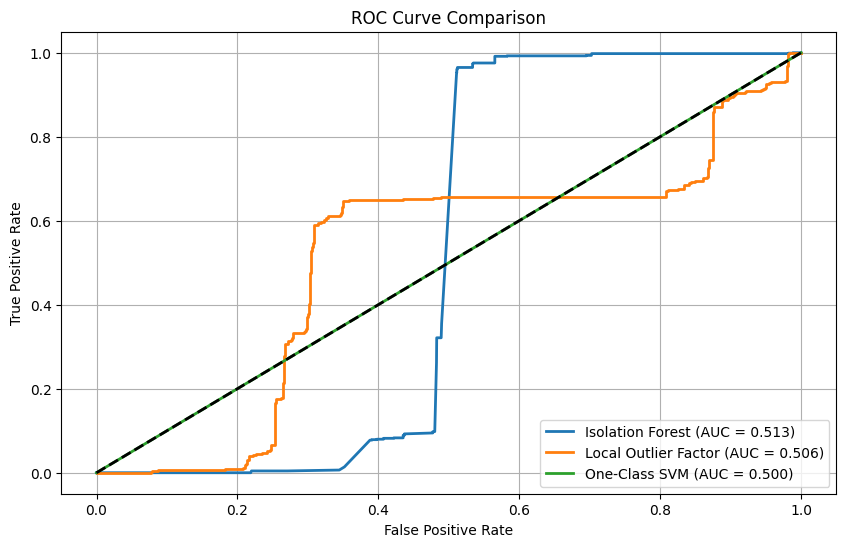


🏆 Model Performance Summary:
Isolation Forest          | AUC: 0.5127 | Precision (Anomaly): 0.0000 | Recall (Anomaly): 0.0000 | F1-Score (Anomaly): 0.0000 | Train Time:   0.31 s | Test Time:   0.02 s
Local Outlier Factor      | AUC: 0.5063 | Precision (Anomaly): 0.0000 | Recall (Anomaly): 0.0000 | F1-Score (Anomaly): 0.0000 | Train Time: 142.58 s | Test Time:   3.52 s
One-Class SVM             | AUC: 0.5000 | Precision (Anomaly): 0.0000 | Recall (Anomaly): 0.0000 | F1-Score (Anomaly): 0.0000 | Train Time: 124.70 s | Test Time:   2.94 s
Using 'train' and 'test_encoded' dataframes loaded from previous cells.
📥 Veri yükleniyor ve ön işleme yapılıyor...
2. Zaman damgası özellikleri çıkarılıyor...
3. Sayısal olmayan sütunlar işleniyor...
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.
  Sütun ' Timestamp' işleniyor...
    ' Timestamp' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun silin

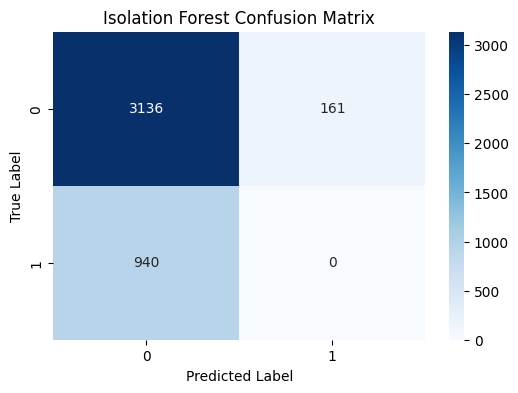


🏋️‍♀️ Training Local Outlier Factor...
✅ Local Outlier Factor training finished in 139.76 seconds.
🔍 Evaluating Local Outlier Factor...
✅ Local Outlier Factor evaluation finished in 4.41 seconds.

📊 Local Outlier Factor Results:
AUC: 0.5063
Train Time: 139.7579 seconds
Test Time: 4.4131 seconds
Threshold (based on normal test data 95th percentile): 0.9738
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3297
           1       0.00      0.00      0.00       940

    accuracy                           0.74      4237
   macro avg       0.38      0.47      0.43      4237
weighted avg       0.60      0.74      0.66      4237



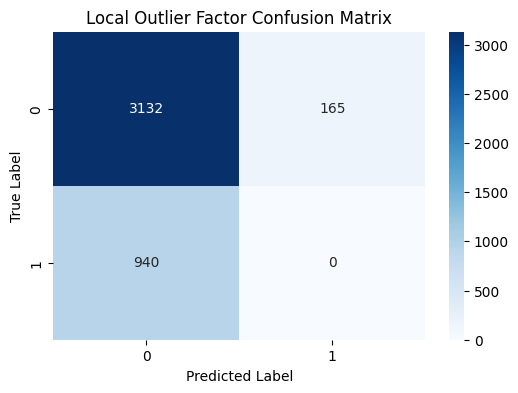


🏋️‍♀️ Training One-Class SVM...
✅ One-Class SVM training finished in 124.85 seconds.
🔍 Evaluating One-Class SVM...
✅ One-Class SVM evaluation finished in 2.02 seconds.
⚠️ Anomaly scores have zero or near-zero range. Cannot normalize meaningfully.
⚠️ Scores are constant. AUC will be 0.5.

📊 One-Class SVM Results:
AUC: 0.5000
Train Time: 124.8468 seconds
Test Time: 2.0235 seconds
Threshold (based on normal test data 95th percentile): 3444.1644
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3297
           1       0.00      0.00      0.00       940

    accuracy                           0.78      4237
   macro avg       0.39      0.50      0.44      4237
weighted avg       0.61      0.78      0.68      4237



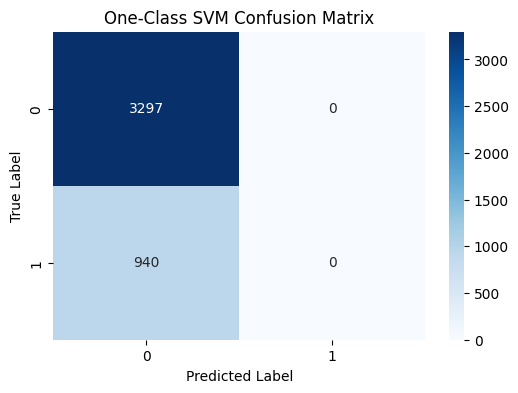

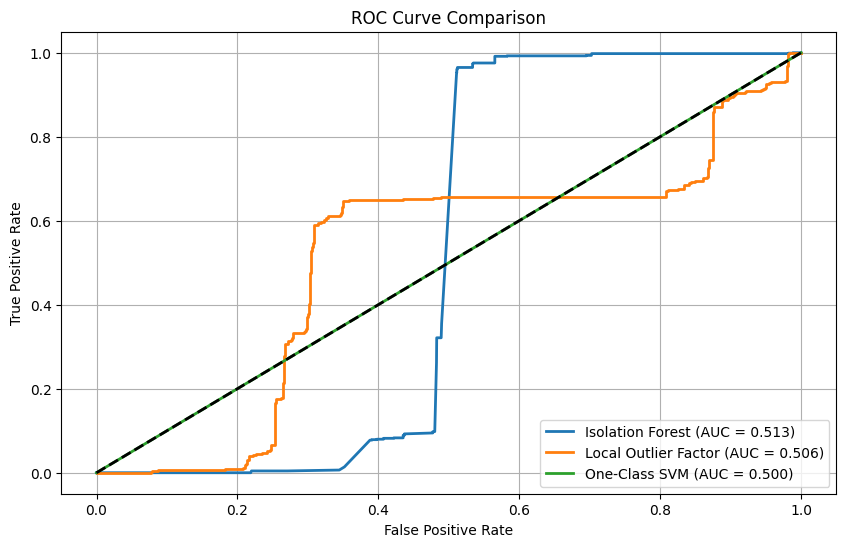


🏆 Model Performance Summary:
Isolation Forest          | AUC: 0.5127 | Precision (Anomaly): 0.0000 | Recall (Anomaly): 0.0000 | F1-Score (Anomaly): 0.0000 | Train Time:   0.28 s | Test Time:   0.02 s
Local Outlier Factor      | AUC: 0.5063 | Precision (Anomaly): 0.0000 | Recall (Anomaly): 0.0000 | F1-Score (Anomaly): 0.0000 | Train Time: 139.76 s | Test Time:   4.41 s
One-Class SVM             | AUC: 0.5000 | Precision (Anomaly): 0.0000 | Recall (Anomaly): 0.0000 | F1-Score (Anomaly): 0.0000 | Train Time: 124.85 s | Test Time:   2.02 s


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import psutil

# --- Your existing data loading and preprocessing function ---
# (Assuming load_and_preprocess_data is defined as in your notebook)

# Re-define the load_and_preprocess_data function if it's not already in the current session
# or if you are running this as a standalone cell.
# NOTE: This function definition might also be redundant if it's already defined earlier
# and the notebook state is maintained. However, redefining it here ensures this cell
# could potentially run standalone if 'train' and 'test' DataFrames were loaded just before it.
# The issue was the re-reading of CSVs *after* this function definition.
def load_and_preprocess_data(train_df, test_df, sample_size=None):
    """Veriyi yükleyip ön işleme yapar"""
    print("📥 Veri yükleniyor ve ön işleme yapılıyor...")

    # Use the passed dataframes directly instead of reloading from files
    train_df = train_df.copy()
    test_df = test_df.copy()

    # Identify columns present in both dataframes for consistent processing
    common_cols = list(set(train_df.columns) & set(test_df.columns))

    # 1. Zaman damgası işleme ve özellik çıkarımı
    print("2. Zaman damgası özellikleri çıkarılıyor...")
    for df in [train_df, test_df]:
        if 'Timestamp' in df.columns:
            print("  Timestamp sütunu işleniyor...")
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
            df['Hour'] = df['Timestamp'].dt.hour
            df['Day'] = df['Timestamp'].dt.dayofweek
            df['Minute'] = df['Timestamp'].dt.minute
            df['Second'] = df['Timestamp'].dt.second
            df.drop('Timestamp', axis=1, inplace=True)
            df.fillna({'Hour': 0, 'Day': 0, 'Minute': 0, 'Second': 0}, inplace=True)


    # 2. Kategorik değişkenleri kontrol et ve dönüştür / Sayısal olmayan sütunları işle
    print("3. Sayısal olmayan sütunlar işleniyor...")
    for df in [train_df, test_df]:
        object_cols = df.select_dtypes(include='object').columns
        for col in object_cols:
            print(f"  Sütun '{col}' işleniyor...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].isna().any() or df[col].dtype == 'object':
                 print(f"    '{col}' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.")
                 df.drop(col, axis=1, inplace=True)
            else:
                 print(f"    '{col}' sütunu sayısal hale getirildi. NaN değerleri dolduruluyor (0 ile).")
                 df[col].fillna(0, inplace=True)


    # Ensure both dataframes have the same columns after processing
    # This part might need adjustment depending on the exact columns after object handling
    # A safer approach might be to determine feature columns based on the intersection
    # *after* all preprocessing steps that might drop columns.
    # For now, let's rely on the feature column selection step later.
    # processed_common_cols = list(set(train_df.columns) & set(test_df.columns))
    # train_df = train_df[processed_common_cols]


    # 3. Özellikler ve etiketler
    print("4. Özellikler ve etiketler ayrılıyor...")

    # Handle test label: it was 'Label' in the Excel, and one-hot encoded
    # The original notebook used the 'Label' column from the Excel file.
    # The code below this was trying to use an 'attack' column from a CSV.
    # We need to align this with the data already loaded.
    # Assuming the 'test' dataframe loaded from attack.xlsx had a 'Label' column
    # which was then one-hot encoded in the previous cells.
    # The anomaly detection models usually predict an anomaly score or label
    # based on the features, and we compare this against the *actual* label
    # in the test set to evaluate performance.

    # Find the original label column name in the test set or the one-hot encoded column
    # Based on the previous cell context, 'Label_Attack' or similarly named one-hot
    # encoded column derived from 'Label' is the target.
    # Let's assume 'Label_Attack' is the column representing the attack label (1).

    label_cols_in_test_orig = [col for col in test_df.columns if col.startswith('Label_')]

    if not label_cols_in_test_orig:
         # Fallback if one-hot encoding wasn't done as expected or column name is different
         # If the original test dataframe had a simple 'Label' column, use that.
         # If it had 'attack' (as implied by the erroring code's attempt), use that.
         # Let's check for a common label name like 'Label' or 'attack'.
         potential_label_col = None
         if 'Label' in test_df.columns:
              potential_label_col = 'Label'
              print("Using 'Label' column from test set as ground truth.")
         elif 'attack' in test_df.columns: # This was the column name causing issues in the original error cell
              potential_label_col = 'attack'
              print("Using 'attack' column from test set as ground truth.")
         elif 'Normal/Attack' in test_df.columns: # Name from train set
              potential_label_col = 'Normal/Attack'
              print("Using 'Normal/Attack' column from test set as ground truth.")
         else:
              # If none found, we cannot proceed with evaluation.
              raise ValueError("Could not find a suitable label column in the test data (e.g., 'Label', 'attack', 'Normal/Attack' or 'Label_Attack').")

         # Assuming the potential_label_col contains the binary anomaly label (0 for normal, 1 for attack)
         # We need to ensure it's numeric.
         y_test = pd.to_numeric(test_df[potential_label_col], errors='coerce').values.ravel()
         if np.isnan(y_test).any():
              print(f"⚠️ Warning: Label column '{potential_label_col}' contains non-numeric values after coercion. These will be treated as NaN.")
              # Decide how to handle NaNs in labels - typically they are dropped or imputed,
              # but for evaluation, NaN labels will likely cause issues.
              # Let's filter rows with NaN labels for evaluation.
              valid_label_mask = ~np.isnan(y_test)
              test_df = test_df[valid_label_mask].copy()
              y_test = y_test[valid_label_mask]
              print(f"Dropped {len(valid_label_mask) - sum(valid_label_mask)} rows with NaN labels.")

         # Feature columns are all columns except the label column
         feature_cols_test_initial = [c for c in test_df.columns if c != potential_label_col]


    else:
         # If one-hot encoded columns exist (from previous steps), assume 'Label_Attack' is the anomaly label
         # This is consistent with the FLClientAE evaluation which expects 0/1 labels.
         attack_label_col_encoded = 'Label_Attack' # Assuming this is the attack column name after one-hot encoding

         if attack_label_col_encoded not in test_df.columns:
             # Find the attack column based on previous logic (e.g., value counts)
             # Replicate the logic from load_and_preprocess_data in the previous cell
             print("Warning: 'Label_Attack' not found among one-hot encoded columns. Attempting to identify attack column.")
             attack_label_col_encoded = None
             for col in label_cols_in_test_orig:
                 # Assuming the attack label is the one with fewer samples (heuristic)
                 if test_df[col].sum() > 0 and test_df[col].sum() < len(test_df) / 2:
                      attack_label_col_encoded = col
                      print(f"Identified potential encoded attack column: {attack_label_col_encoded}")
                      break
             if attack_label_col_encoded is None and len(label_cols_in_test_orig) > 0:
                  attack_label_col_encoded = label_cols_in_test_orig[0]
                  print(f"Could not identify encoded attack column by count, using first Label_ column: {attack_label_col_encoded}")
             elif attack_label_col_encoded is None:
                  raise ValueError("No suitable encoded attack column ('Label_') found in test data.")


         y_test = test_df[attack_label_col_encoded].values.ravel().astype(int) # Use the identified column as label

         # Feature columns are all columns except the one-hot encoded label columns
         feature_cols_test_initial = [c for c in test_df.columns if c not in label_cols_in_test_orig]


    # Feature columns for training are all columns except the 'Normal/Attack' column
    feature_cols_train_initial = [c for c in train_df.columns if c != 'Normal/Attack']

    # Determine the final set of feature columns present in both dataframes *after* processing
    # and excluding the label column(s).
    final_feature_cols = list(set(feature_cols_train_initial) & set(feature_cols_test_initial))
    final_feature_cols.sort() # Ensure consistent order

    X_train = train_df[final_feature_cols].values
    X_test = test_df[final_feature_cols].values
    # y_test is already extracted above based on the correct label column


    # 4. İsteğe bağlı örnekleme
    if sample_size:
        print(f"⚠️ Veri {sample_size} örneğe indirgeniyor")
        X_train = X_train[:sample_size]
        X_test = X_test[:sample_size//3]
        y_test = y_test[:sample_size//3]

    # 5. Ölçeklendirme
    print("5. Veri ölçeklendiriliyor...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Handle NaNs/Infs in data BEFORE calculating variance or scaling
    X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
    X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)


    variances = np.var(X_train, axis=0)
    constant_features_indices = np.where(variances < 1e-9)[0] # Use a small tolerance for zero variance

    if len(constant_features_indices) > 0:
        constant_col_names = [final_feature_cols[i] for i in constant_features_indices]
        print(f"⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi (veya sıfıra yakın varyans): {constant_col_names}")
        print("   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...")
        non_constant_features_mask = np.ones(X_train.shape[1], dtype=bool)
        non_constant_features_mask[constant_features_indices] = False

        X_train = X_train[:, non_constant_features_mask]
        X_test = X_test[:, non_constant_features_mask]
        # Update final_feature_cols to reflect removed columns
        final_feature_cols = [final_feature_cols[i] for i in np.where(non_constant_features_mask)[0]]
        print(f"   Kalan özellik sayısı: {X_train.shape[1]}")

    # Fit scaler only on X_train (cleaned)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    # Transform X_test (cleaned) using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Veri istatistikleri
    print("\n📊 Veri İstatistikleri:")
    print(f"Eğitim: {X_train_scaled.shape}")
    print(f"Test: {X_test_scaled.shape} (Norm: {sum(y_test==0)}, Atk: {sum(y_test==1)})")
    print(f"Özellikler: {len(final_feature_cols)}\n")

    # Return scaled data and updated feature list
    return X_train_scaled, X_test_scaled, y_test, final_feature_cols, scaler


# --- Data Loading and Preprocessing ---
# Use the dataframes already loaded in previous cells ('train', 'test_encoded')
# Assuming 'test_encoded' is the DataFrame after one-hot encoding the 'Label' column.
# If 'test_encoded' is not available, use the original 'test' DataFrame and
# ensure the load_and_preprocess_data function correctly handles the label column.
# Based on the global variables and previous code, 'test_encoded' was created
# and used for WGAN. Let's use that for consistency if available.
# If running this cell alone, ensure 'train' and 'test_encoded' are loaded or defined first.

# Check if test_encoded exists and has the expected structure (one-hot encoded labels)
if 'test_encoded' in locals() and any(col.startswith('Label_') for col in test_encoded.columns):
     print("Using 'train' and 'test_encoded' dataframes loaded from previous cells.")
     # Pass the already loaded and partially processed dataframes
     X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_encoded)
else:
     print("Could not find 'test_encoded' dataframe with 'Label_' columns.")
     print("Attempting to use the original 'train' and 'test' dataframes and handle labels in preprocess function.")
     # If test_encoded is not available, fall back to original train and test
     # Need to ensure 'test' has a usable label column or add one if necessary
     # The original code loaded 'test' from attack.xlsx which had 'Label'.
     # The preprocess function is updated to handle this.
     # Ensure 'train' and 'test' are available - they are in global variables.
     if 'train' in locals() and 'test' in locals():
          # Need to ensure the 'test' DataFrame has a single binary label column (0/1)
          # expected by the evaluation code later.
          # The original notebook processed 'test' to create 'Label_Attack' etc.
          # If running this cell standalone, that processing is lost.
          # The most reliable way is to re-apply that label processing here if test_encoded is missing.
          print("Re-applying label processing to 'test' DataFrame.")
          test_processed_for_labels = test.copy()
          if 'Label' in test_processed_for_labels.columns:
               # Apply one-hot encoding as was done before
               test_processed_for_labels = pd.get_dummies(test_processed_for_labels, columns=['Label'], prefix='Label')
               # Assume 'Label_Attack' is the target label column
               if 'Label_Attack' not in test_processed_for_labels.columns:
                    # If 'Label_Attack' didn't result, try to find a likely attack column
                    label_cols_after_dummy = [col for col in test_processed_for_labels.columns if col.startswith('Label_')]
                    if label_cols_after_dummy:
                         # Simple fallback: use the column with fewest *positive* values
                         # This heuristic is risky but better than nothing if Label_Attack isn't found
                         sum_counts = {col: test_processed_for_labels[col].sum() for col in label_cols_after_dummy}
                         if sum_counts:
                              # Find the column with the minimum positive count > 0
                              min_pos_col = min((col for col, count in sum_counts.items() if count > 0),
                                               key=sum_counts.get, default=None)
                              if min_pos_col:
                                   print(f"Heuristic identified '{min_pos_col}' as potential attack label column.")
                                   # Rename it to 'Label_Attack' temporarily for the preprocess function if needed
                                   test_processed_for_labels.rename(columns={min_pos_col: 'Label_Attack'}, inplace=True)
                              else:
                                    print("Could not identify an attack label column with positive samples from Label_ columns.")
                                    # If no positive samples found, maybe all are normal? Or data issue.
                                    # Proceed without renaming, preprocess function will need to adapt.
                         else:
                              print("No 'Label_' columns found with positive values.")
                    else:
                          print("No 'Label_' columns found after get_dummies.")
               else:
                    print("'Label_Attack' column successfully created.")

               # Convert boolean dummy columns to int if they exist
               for col in test_processed_for_labels.select_dtypes(include='bool').columns:
                   test_processed_for_labels[col] = test_processed_for_labels[col].astype(int)

               # Now pass the processed test dataframe
               X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_processed_for_labels)

          else:
               # If the original 'test' didn't have 'Label', maybe it had 'attack'?
               # This path is less likely given the original error and previous code,
               # but included for robustness if data source changes.
               print("'test' dataframe does not have a 'Label' column.")
               if 'attack' in test_processed_for_labels.columns:
                    print("Using 'attack' column for label.")
                    # Ensure it's 0/1 and numeric
                    test_processed_for_labels['attack'] = pd.to_numeric(test_processed_for_labels['attack'], errors='coerce').fillna(0).astype(int)
                    # Now pass the processed test dataframe
                    X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_processed_for_labels)
               else:
                    raise ValueError("Neither 'Label' nor 'attack' column found in the original 'test' dataframe.")
     else:
          raise RuntimeError("Could not find 'train' or 'test' dataframes. Please run data loading cells first.")



# Handle potential NaNs introduced during scaling or previous steps
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_test = np.asarray(y_test) # Ensure y_test is a numpy array

# --- Model Training and Evaluation ---

models = {
    "Isolation Forest": IsolationForest(contamination='auto', random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(novelty=True, contamination='auto'), # novelty=True for prediction on new data
    "One-Class SVM": OneClassSVM(nu=0.05, kernel="rbf", gamma="auto")
}

results = {}

for name, model in models.items():
    print(f"\n🏋️‍♀️ Training {name}...")
    start_time = time.time()

    # Train all anomaly detection models on the entire X_train dataset
    # Assuming X_train represents the distribution of "normal" data
    # Ensure X_train used for fitting is clean (already handled above)
    model.fit(X_train)

    train_time = time.time() - start_time
    print(f"✅ {name} training finished in {train_time:.2f} seconds.")

    print(f"🔍 Evaluating {name}...")
    start_time = time.time()

    # Get anomaly scores on the test set
    # Ensure X_test used for prediction is clean (already handled above)
    if hasattr(model, "decision_function"):
        scores = -model.decision_function(X_test) # Negative score to make higher == more anomalous
    elif hasattr(model, "negative_outlier_factor_"): # For LOF *after* fitting
        # Ensure we can get scores from the fitted LOF model on new data
        # With novelty=True, decision_function should work as expected
        scores = -model.decision_function(X_test)
    else:
        # Fallback or handle models that don't have standard scoring methods
        print(f"⚠️ Warning: Model {name} does not support decision_function. Cannot get anomaly scores.")
        scores = np.zeros(len(X_test)) # Placeholder

    # Ensure scores are finite before further processing
    scores = np.nan_to_num(scores, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)


    eval_time = time.time() - start_time
    print(f"✅ {name} evaluation finished in {eval_time:.2f} seconds.")


    # Normalize scores for consistent thresholding and comparison
    # Handle cases where scores might be constant or have very small range
    scores_range = scores.max() - scores.min()
    if scores_range < 1e-10:
        print("⚠️ Anomaly scores have zero or near-zero range. Cannot normalize meaningfully.")
        scores_norm = scores # Use raw scores if normalization is not possible
        # If all scores are the same, AUC will likely be 0.5
        if scores.max() == scores.min(): # Exactly constant scores
             print("⚠️ Scores are constant. AUC will be 0.5.")
    else:
        scores_norm = (scores - scores.min()) / scores_range

    # Determine threshold based on the 95th percentile of scores for normal data in the test set
    # Assuming anomalies are the higher scores. This threshold calibration is crucial for
    # converting scores to binary predictions (0 or 1).
    scores_normal_test = scores_norm[y_test == 0]

    # Ensure scores_normal_test is not empty and does not contain NaNs/Infs before percentile calculation
    scores_normal_test_finite = scores_normal_test[np.isfinite(scores_normal_test)]

    if len(scores_normal_test_finite) > 0:
        threshold = np.percentile(scores_normal_test_finite, 95)
    else:
        print(f"⚠️ Warning: Cannot determine threshold for {name} from normal test data (no valid normal samples). Using mean of all valid test scores as fallback.")
        # Fallback threshold if no valid normal data points are available
        scores_test_finite = scores_norm[np.isfinite(scores_norm)]
        threshold = np.mean(scores_test_finite) if len(scores_test_finite) > 0 else 0.5 # Avoid mean of empty array


    # Predict anomalies based on the threshold
    # Ensure threshold is finite
    threshold = np.nan_to_num(threshold, nan=0.5) # Default to 0.5 if threshold calculation resulted in NaN

    # Ensure scores_norm used for prediction is finite
    scores_norm_finite_for_pred = np.nan_to_num(scores_norm, nan=0.5) # Use a default score like 0.5 for NaN scores for prediction

    pred = (scores_norm_finite_for_pred > threshold).astype(int)


    # Ensure y_test and pred are clean for metrics (already done above but safe to re-check)
    y_test_clean = np.nan_to_num(y_test, nan=0.0).astype(int)
    pred_clean = np.nan_to_num(pred, nan=0.0).astype(int)

    # Calculate metrics
    # Handle potential errors if y_test_clean or scores_norm contain NaNs/Infs causing AUC issues
    try:
        # Use the original (potentially non-finite) scores array for AUC calculation as roc_auc_score
        # handles infinite values better than numpy's percentile in some cases, but still might fail.
        # Using the finite version is safer.
        auc = roc_auc_score(y_test_clean, scores_norm_finite_for_pred) # Use the cleaned scores for metrics
    except ValueError as e:
        print(f"⚠️ Warning: Could not compute AUC for {name} due to error: {e}. Setting AUC to NaN.")
        auc = np.nan
    except Exception as e:
        print(f"⚠️ Warning: Unexpected error computing AUC for {name}: {e}. Setting AUC to NaN.")
        auc = np.nan


    # Check for valid inputs to confusion_matrix and classification_report
    if len(y_test_clean) != len(pred_clean) or len(y_test_clean) == 0:
         print(f"⚠️ Warning: Cannot compute confusion matrix or classification report for {name}. Data length mismatch or empty.")
         cm = np.zeros((2,2), dtype=int) # Default empty matrix
         report = {} # Empty dictionary
    else:
        try:
            cm = confusion_matrix(y_test_clean, pred_clean)
            # Handle potential errors if classification_report inputs are problematic
            report = classification_report(y_test_clean, pred_clean, output_dict=True, zero_division=0)
        except Exception as e:
            print(f"⚠️ Warning: Could not compute classification report or confusion matrix for {name} due to error: {e}. Setting report/cm to empty.")
            cm = np.zeros((2,2), dtype=int) # Default empty matrix
            report = {} # Empty dictionary


    results[name] = {
        'scores': scores_norm, # Store normalized scores (might still contain NaNs if normalization failed)
        'auc': auc,
        'cm': cm,
        'report': report,
        'threshold': threshold,
        'train_time': train_time,
        'test_time': eval_time
    }

    print(f"\n📊 {name} Results:")
    # Format values for printing, handling NaNs
    auc_print = f"{auc:.4f}" if not np.isnan(auc) else 'N/A'
    train_time_print = f"{train_time:.4f}" if not np.isnan(train_time) else 'N/A'
    eval_time_print = f"{eval_time:.4f}" if not np.isnan(eval_time) else 'N/A'
    threshold_print = f"{threshold:.4f}" if not np.isnan(threshold) else 'N/A'

    print(f"AUC: {auc_print}")
    print(f"Train Time: {train_time_print} seconds")
    print(f"Test Time: {eval_time_print} seconds")
    print(f"Threshold (based on normal test data 95th percentile): {threshold_print}")

    # Print classification report if it was successfully generated
    if report:
        print(classification_report(y_test_clean, pred_clean, zero_division=0))
    else:
        print("Classification report could not be generated.")

    # Plot Confusion Matrix only if valid cm exists
    if cm is not None and isinstance(cm, np.ndarray) and cm.shape == (2,2) and cm.sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    else:
        print("Cannot plot Confusion Matrix (invalid data).")


# --- Visualization ---

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, res in results.items():
    # Ensure y_test and scores are clean and valid for plotting ROC
    y_test_plot = np.nan_to_num(y_test, nan=0.0).astype(int)
    # Use cleaned scores that were used for metrics/prediction
    scores_plot = np.nan_to_num(res.get('scores', np.full(len(y_test_plot), 0.5)), nan=0.5)


    if len(y_test_plot) > 0 and len(scores_plot) == len(y_test_plot) and np.sum(~np.isnan(scores_plot)) > 1 and len(np.unique(y_test_plot)) > 1: # Check for sufficient data for AUC/ROC
        try:
            fpr, tpr, _ = roc_curve(y_test_plot, scores_plot)
            # Handle cases where AUC was NaN or cannot be calculated meaningfully
            auc_label = res.get('auc', np.nan) # Use .get() for safety
            label_text = f"{name} (AUC = {auc_label:.3f})" if not np.isnan(auc_label) else f"{name} (AUC N/A)"
            plt.plot(fpr, tpr, lw=2, label=label_text)
        except Exception as e:
             print(f"⚠️ Warning: Could not plot ROC for {name} due to error: {e}")
    else:
         print(f"⚠️ Warning: Skipping ROC plot for {name} due to insufficient or invalid data.")


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Summarize results
print("\n🏆 Model Performance Summary:")
# Sort by AUC, handling potential NaN AUC values
sorted_results = sorted(results.items(), key=lambda item: item[1].get('auc', -1), reverse=True) # Sort NaN AUC to the end
for name, res in sorted_results:
    auc_val = res.get('auc', np.nan)
    # Safely access report metrics
    report_1 = res['report'].get('1', {}) # Get report for class '1' (anomaly) or empty dict
    precision_anomaly = report_1.get('precision', np.nan)
    recall_anomaly = report_1.get('recall', np.nan)
    f1_score_anomaly = report_1.get('f1-score', np.nan)
    train_t = res.get('train_time', np.nan)
    test_t = res.get('test_time', np.nan)


    # Format the values conditionally outside the format specifier
    auc_str = f"{auc_val:.4f}" if not np.isnan(auc_val) else 'N/A'
    precision_str = f"{precision_anomaly:.4f}" if not np.isnan(precision_anomaly) else 'N/A'
    recall_str = f"{recall_anomaly:.4f}" if not np.isnan(recall_anomaly) else 'N/A'
    f1_score_str = f"{f1_score_anomaly:.4f}" if not np.isnan(f1_score_anomaly) else 'N/A'
    train_time_str = f"{train_t:.2f}" if not np.isnan(train_t) else 'N/A'
    test_time_str = f"{test_t:.2f}" if not np.isnan(test_t) else 'N/A'

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import psutil

# --- Your existing data loading and preprocessing function ---
# (Assuming load_and_preprocess_data is defined as in your notebook)

# Re-define the load_and_preprocess_data function if it's not already in the current session
# or if you are running this as a standalone cell.
# NOTE: This function definition might also be redundant if it's already defined earlier
# and the notebook state is maintained. However, redefining it here ensures this cell
# could potentially run standalone if 'train' and 'test' DataFrames were loaded just before it.
# The issue was the re-reading of CSVs *after* this function definition.
def load_and_preprocess_data(train_df, test_df, sample_size=None):
    """Veriyi yükleyip ön işleme yapar"""
    print("📥 Veri yükleniyor ve ön işleme yapılıyor...")

    # Use the passed dataframes directly instead of reloading from files
    train_df = train_df.copy()
    test_df = test_df.copy()

    # Identify columns present in both dataframes for consistent processing
    common_cols = list(set(train_df.columns) & set(test_df.columns))

    # 1. Zaman damgası işleme ve özellik çıkarımı
    print("2. Zaman damgası özellikleri çıkarılıyor...")
    for df in [train_df, test_df]:
        if 'Timestamp' in df.columns:
            print("  Timestamp sütunu işleniyor...")
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
            df['Hour'] = df['Timestamp'].dt.hour
            df['Day'] = df['Timestamp'].dt.dayofweek
            df['Minute'] = df['Timestamp'].dt.minute
            df['Second'] = df['Timestamp'].dt.second
            df.drop('Timestamp', axis=1, inplace=True)
            df.fillna({'Hour': 0, 'Day': 0, 'Minute': 0, 'Second': 0}, inplace=True)


    # 2. Kategorik değişkenleri kontrol et ve dönüştür / Sayısal olmayan sütunları işle
    print("3. Sayısal olmayan sütunlar işleniyor...")
    for df in [train_df, test_df]:
        object_cols = df.select_dtypes(include='object').columns
        for col in object_cols:
            print(f"  Sütun '{col}' işleniyor...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].isna().any() or df[col].dtype == 'object':
                 print(f"    '{col}' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.")
                 df.drop(col, axis=1, inplace=True)
            else:
                 print(f"    '{col}' sütunu sayısal hale getirildi. NaN değerleri dolduruluyor (0 ile).")
                 df[col].fillna(0, inplace=True)


    # Ensure both dataframes have the same columns after processing
    # This part might need adjustment depending on the exact columns after object handling
    # A safer approach might be to determine feature columns based on the intersection
    # *after* all preprocessing steps that might drop columns.
    # For now, let's rely on the feature column selection step later.
    # processed_common_cols = list(set(train_df.columns) & set(test_df.columns))
    # train_df = train_df[processed_common_cols]


    # 3. Özellikler ve etiketler
    print("4. Özellikler ve etiketler ayrılıyor...")

    # Handle test label: it was 'Label' in the Excel, and one-hot encoded
    # The original notebook used the 'Label' column from the Excel file.
    # The code below this was trying to use an 'attack' column from a CSV.
    # We need to align this with the data already loaded.
    # Assuming the 'test' dataframe loaded from attack.xlsx had a 'Label' column
    # which was then one-hot encoded in the previous cells.
    # The anomaly detection models usually predict an anomaly score or label
    # based on the features, and we compare this against the *actual* label
    # in the test set to evaluate performance.

    # Find the original label column name in the test set or the one-hot encoded column
    # Based on the previous cell context, 'Label_Attack' or similarly named one-hot
    # encoded column derived from 'Label' is the target.
    # Let's assume 'Label_Attack' is the column representing the attack label (1).

    label_cols_in_test_orig = [col for col in test_df.columns if col.startswith('Label_')]

    if not label_cols_in_test_orig:
         # Fallback if one-hot encoding wasn't done as expected or column name is different
         # If the original test dataframe had a simple 'Label' column, use that.
         # If it had 'attack' (as implied by the erroring code's attempt), use that.
         # Let's check for a common label name like 'Label' or 'attack'.
         potential_label_col = None
         if 'Label' in test_df.columns:
              potential_label_col = 'Label'
              print("Using 'Label' column from test set as ground truth.")
         elif 'attack' in test_df.columns: # This was the column name causing issues in the original error cell
              potential_label_col = 'attack'
              print("Using 'attack' column from test set as ground truth.")
         elif 'Normal/Attack' in test_df.columns: # Name from train set
              potential_label_col = 'Normal/Attack'
              print("Using 'Normal/Attack' column from test set as ground truth.")
         else:
              # If none found, we cannot proceed with evaluation.
              raise ValueError("Could not find a suitable label column in the test data (e.g., 'Label', 'attack', 'Normal/Attack' or 'Label_Attack').")

         # Assuming the potential_label_col contains the binary anomaly label (0 for normal, 1 for attack)
         # We need to ensure it's numeric.
         y_test = pd.to_numeric(test_df[potential_label_col], errors='coerce').values.ravel()
         if np.isnan(y_test).any():
              print(f"⚠️ Warning: Label column '{potential_label_col}' contains non-numeric values after coercion. These will be treated as NaN.")
              # Decide how to handle NaNs in labels - typically they are dropped or imputed,
              # but for evaluation, NaN labels will likely cause issues.
              # Let's filter rows with NaN labels for evaluation.
              valid_label_mask = ~np.isnan(y_test)
              test_df = test_df[valid_label_mask].copy()
              y_test = y_test[valid_label_mask]
              print(f"Dropped {len(valid_label_mask) - sum(valid_label_mask)} rows with NaN labels.")

         # Feature columns are all columns except the label column
         feature_cols_test_initial = [c for c in test_df.columns if c != potential_label_col]


    else:
         # If one-hot encoded columns exist (from previous steps), assume 'Label_Attack' is the anomaly label
         # This is consistent with the FLClientAE evaluation which expects 0/1 labels.
         attack_label_col_encoded = 'Label_Attack' # Assuming this is the attack column name after one-hot encoding

         if attack_label_col_encoded not in test_df.columns:
             # Find the attack column based on previous logic (e.g., value counts)
             # Replicate the logic from load_and_preprocess_data in the previous cell
             print("Warning: 'Label_Attack' not found among one-hot encoded columns. Attempting to identify attack column.")
             attack_label_col_encoded = None
             for col in label_cols_in_test_orig:
                 # Assuming the attack label is the one with fewer samples (heuristic)
                 if test_df[col].sum() > 0 and test_df[col].sum() < len(test_df) / 2:
                      attack_label_col_encoded = col
                      print(f"Identified potential encoded attack column: {attack_label_col_encoded}")
                      break
             if attack_label_col_encoded is None and len(label_cols_in_test_orig) > 0:
                  attack_label_col_encoded = label_cols_in_test_orig[0]
                  print(f"Could not identify encoded attack column by count, using first Label_ column: {attack_label_col_encoded}")
             elif attack_label_col_encoded is None:
                  raise ValueError("No suitable encoded attack column ('Label_') found in test data.")


         y_test = test_df[attack_label_col_encoded].values.ravel().astype(int) # Use the identified column as label

         # Feature columns are all columns except the one-hot encoded label columns
         feature_cols_test_initial = [c for c in test_df.columns if c not in label_cols_in_test_orig]


    # Feature columns for training are all columns except the 'Normal/Attack' column
    feature_cols_train_initial = [c for c in train_df.columns if c != 'Normal/Attack']

    # Determine the final set of feature columns present in both dataframes *after* processing
    # and excluding the label column(s).
    final_feature_cols = list(set(feature_cols_train_initial) & set(feature_cols_test_initial))
    final_feature_cols.sort() # Ensure consistent order

    X_train = train_df[final_feature_cols].values
    X_test = test_df[final_feature_cols].values
    # y_test is already extracted above based on the correct label column


    # 4. İsteğe bağlı örnekleme
    if sample_size:
        print(f"⚠️ Veri {sample_size} örneğe indirgeniyor")
        X_train = X_train[:sample_size]
        X_test = X_test[:sample_size//3]
        y_test = y_test[:sample_size//3]

    # 5. Ölçeklendirme
    print("5. Veri ölçeklendiriliyor...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Handle NaNs/Infs in data BEFORE calculating variance or scaling
    X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
    X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)


    variances = np.var(X_train, axis=0)
    constant_features_indices = np.where(variances < 1e-9)[0] # Use a small tolerance for zero variance

    if len(constant_features_indices) > 0:
        constant_col_names = [final_feature_cols[i] for i in constant_features_indices]
        print(f"⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi (veya sıfıra yakın varyans): {constant_col_names}")
        print("   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...")
        non_constant_features_mask = np.ones(X_train.shape[1], dtype=bool)
        non_constant_features_mask[constant_features_indices] = False

        X_train = X_train[:, non_constant_features_mask]
        X_test = X_test[:, non_constant_features_mask]
        # Update final_feature_cols to reflect removed columns
        final_feature_cols = [final_feature_cols[i] for i in np.where(non_constant_features_mask)[0]]
        print(f"   Kalan özellik sayısı: {X_train.shape[1]}")

    # Fit scaler only on X_train (cleaned)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    # Transform X_test (cleaned) using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Veri istatistikleri
    print("\n📊 Veri İstatistikleri:")
    print(f"Eğitim: {X_train_scaled.shape}")
    print(f"Test: {X_test_scaled.shape} (Norm: {sum(y_test==0)}, Atk: {sum(y_test==1)})")
    print(f"Özellikler: {len(final_feature_cols)}\n")

    # Return scaled data and updated feature list
    return X_train_scaled, X_test_scaled, y_test, final_feature_cols, scaler


# --- Data Loading and Preprocessing ---
# Use the dataframes already loaded in previous cells ('train', 'test_encoded')
# Assuming 'test_encoded' is the DataFrame after one-hot encoding the 'Label' column.
# If 'test_encoded' is not available, use the original 'test' DataFrame and
# ensure the load_and_preprocess_data function correctly handles the label column.
# Based on the global variables and previous code, 'test_encoded' was created
# and used for WGAN. Let's use that for consistency if available.
# If running this cell alone, ensure 'train' and 'test_encoded' are loaded or defined first.

# Check if test_encoded exists and has the expected structure (one-hot encoded labels)
if 'test_encoded' in locals() and any(col.startswith('Label_') for col in test_encoded.columns):
     print("Using 'train' and 'test_encoded' dataframes loaded from previous cells.")
     # Pass the already loaded and partially processed dataframes
     X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_encoded)
else:
     print("Could not find 'test_encoded' dataframe with 'Label_' columns.")
     print("Attempting to use the original 'train' and 'test' dataframes and handle labels in preprocess function.")
     # If test_encoded is not available, fall back to original train and test
     # Need to ensure 'test' has a usable label column or add one if necessary
     # The original code loaded 'test' from attack.xlsx which had 'Label'.
     # The preprocess function is updated to handle this.
     # Ensure 'train' and 'test' are available - they are in global variables.
     if 'train' in locals() and 'test' in locals():
          # Need to ensure the 'test' DataFrame has a single binary label column (0/1)
          # expected by the evaluation code later.
          # The original notebook processed 'test' to create 'Label_Attack' etc.
          # If running this cell standalone, that processing is lost.
          # The most reliable way is to re-apply that label processing here if test_encoded is missing.
          print("Re-applying label processing to 'test' DataFrame.")
          test_processed_for_labels = test.copy()
          if 'Label' in test_processed_for_labels.columns:
               # Apply one-hot encoding as was done before
               test_processed_for_labels = pd.get_dummies(test_processed_for_labels, columns=['Label'], prefix='Label')
               # Assume 'Label_Attack' is the target label column
               if 'Label_Attack' not in test_processed_for_labels.columns:
                    # If 'Label_Attack' didn't result, try to find a likely attack column
                    label_cols_after_dummy = [col for col in test_processed_for_labels.columns if col.startswith('Label_')]
                    if label_cols_after_dummy:
                         # Simple fallback: use the column with fewest *positive* values
                         # This heuristic is risky but better than nothing if Label_Attack isn't found
                         sum_counts = {col: test_processed_for_labels[col].sum() for col in label_cols_after_dummy}
                         if sum_counts:
                              # Find the column with the minimum positive count > 0
                              min_pos_col = min((col for col, count in sum_counts.items() if count > 0),
                                               key=sum_counts.get, default=None)
                              if min_pos_col:
                                   print(f"Heuristic identified '{min_pos_col}' as potential attack label column.")
                                   # Rename it to 'Label_Attack' temporarily for the preprocess function if needed
                                   test_processed_for_labels.rename(columns={min_pos_col: 'Label_Attack'}, inplace=True)
                              else:
                                    print("Could not identify an attack label column with positive samples from Label_ columns.")
                                    # If no positive samples found, maybe all are normal? Or data issue.
                                    # Proceed without renaming, preprocess function will need to adapt.
                         else:
                              print("No 'Label_' columns found with positive values.")
                    else:
                          print("No 'Label_' columns found after get_dummies.")
               else:
                    print("'Label_Attack' column successfully created.")

               # Convert boolean dummy columns to int if they exist
               for col in test_processed_for_labels.select_dtypes(include='bool').columns:
                   test_processed_for_labels[col] = test_processed_for_labels[col].astype(int)

               # Now pass the processed test dataframe
               X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_processed_for_labels)

          else:
               # If the original 'test' didn't have 'Label', maybe it had 'attack'?
               # This path is less likely given the original error and previous code,
               # but included for robustness if data source changes.
               print("'test' dataframe does not have a 'Label' column.")
               if 'attack' in test_processed_for_labels.columns:
                    print("Using 'attack' column for label.")
                    # Ensure it's 0/1 and numeric
                    test_processed_for_labels['attack'] = pd.to_numeric(test_processed_for_labels['attack'], errors='coerce').fillna(0).astype(int)
                    # Now pass the processed test dataframe
                    X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_processed_for_labels)
               else:
                    raise ValueError("Neither 'Label' nor 'attack' column found in the original 'test' dataframe.")
     else:
          raise RuntimeError("Could not find 'train' or 'test' dataframes. Please run data loading cells first.")



# Handle potential NaNs introduced during scaling or previous steps
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_test = np.asarray(y_test) # Ensure y_test is a numpy array

# --- Model Training and Evaluation ---

models = {
    "Isolation Forest": IsolationForest(contamination='auto', random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(novelty=True, contamination='auto'), # novelty=True for prediction on new data
    "One-Class SVM": OneClassSVM(nu=0.05, kernel="rbf", gamma="auto")
}

results = {}

for name, model in models.items():
    print(f"\n🏋️‍♀️ Training {name}...")
    start_time = time.time()

    # Train all anomaly detection models on the entire X_train dataset
    # Assuming X_train represents the distribution of "normal" data
    # Ensure X_train used for fitting is clean (already handled above)
    model.fit(X_train)

    train_time = time.time() - start_time
    print(f"✅ {name} training finished in {train_time:.2f} seconds.")

    print(f"🔍 Evaluating {name}...")
    start_time = time.time()

    # Get anomaly scores on the test set
    # Ensure X_test used for prediction is clean (already handled above)
    if hasattr(model, "decision_function"):
        scores = -model.decision_function(X_test) # Negative score to make higher == more anomalous
    elif hasattr(model, "negative_outlier_factor_"): # For LOF *after* fitting
        # Ensure we can get scores from the fitted LOF model on new data
        # With novelty=True, decision_function should work as expected
        scores = -model.decision_function(X_test)
    else:
        # Fallback or handle models that don't have standard scoring methods
        print(f"⚠️ Warning: Model {name} does not support decision_function. Cannot get anomaly scores.")
        scores = np.zeros(len(X_test)) # Placeholder

    # Ensure scores are finite before further processing
    scores = np.nan_to_num(scores, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)


    eval_time = time.time() - start_time
    print(f"✅ {name} evaluation finished in {eval_time:.2f} seconds.")


    # Normalize scores for consistent thresholding and comparison
    # Handle cases where scores might be constant or have very small range
    scores_range = scores.max() - scores.min()
    if scores_range < 1e-10:
        print("⚠️ Anomaly scores have zero or near-zero range. Cannot normalize meaningfully.")
        scores_norm = scores # Use raw scores if normalization is not possible
        # If all scores are the same, AUC will likely be 0.5
        if scores.max() == scores.min(): # Exactly constant scores
             print("⚠️ Scores are constant. AUC will be 0.5.")
    else:
        scores_norm = (scores - scores.min()) / scores_range

    # Determine threshold based on the 95th percentile of scores for normal data in the test set
    # Assuming anomalies are the higher scores. This threshold calibration is crucial for
    # converting scores to binary predictions (0 or 1).
    scores_normal_test = scores_norm[y_test == 0]

    # Ensure scores_normal_test is not empty and does not contain NaNs/Infs before percentile calculation
    scores_normal_test_finite = scores_normal_test[np.isfinite(scores_normal_test)]

    if len(scores_normal_test_finite) > 0:
        threshold = np.percentile(scores_normal_test_finite, 95)
    else:
        print(f"⚠️ Warning: Cannot determine threshold for {name} from normal test data (no valid normal samples). Using mean of all valid test scores as fallback.")
        # Fallback threshold if no valid normal data points are available
        scores_test_finite = scores_norm[np.isfinite(scores_norm)]
        threshold = np.mean(scores_test_finite) if len(scores_test_finite) > 0 else 0.5 # Avoid mean of empty array


    # Predict anomalies based on the threshold
    # Ensure threshold is finite
    threshold = np.nan_to_num(threshold, nan=0.5) # Default to 0.5 if threshold calculation resulted in NaN

    # Ensure scores_norm used for prediction is finite
    scores_norm_finite_for_pred = np.nan_to_num(scores_norm, nan=0.5) # Use a default score like 0.5 for NaN scores for prediction

    pred = (scores_norm_finite_for_pred > threshold).astype(int)


    # Ensure y_test and pred are clean for metrics (already done above but safe to re-check)
    y_test_clean = np.nan_to_num(y_test, nan=0.0).astype(int)
    pred_clean = np.nan_to_num(pred, nan=0.0).astype(int)

    # Calculate metrics
    # Handle potential errors if y_test_clean or scores_norm contain NaNs/Infs causing AUC issues
    try:
        # Use the original (potentially non-finite) scores array for AUC calculation as roc_auc_score
        # handles infinite values better than numpy's percentile in some cases, but still might fail.
        # Using the finite version is safer.
        auc = roc_auc_score(y_test_clean, scores_norm_finite_for_pred) # Use the cleaned scores for metrics
    except ValueError as e:
        print(f"⚠️ Warning: Could not compute AUC for {name} due to error: {e}. Setting AUC to NaN.")
        auc = np.nan
    except Exception as e:
        print(f"⚠️ Warning: Unexpected error computing AUC for {name}: {e}. Setting AUC to NaN.")
        auc = np.nan


    # Check for valid inputs to confusion_matrix and classification_report
    if len(y_test_clean) != len(pred_clean) or len(y_test_clean) == 0:
         print(f"⚠️ Warning: Cannot compute confusion matrix or classification report for {name}. Data length mismatch or empty.")
         cm = np.zeros((2,2), dtype=int) # Default empty matrix
         report = {} # Empty dictionary
    else:
        try:
            cm = confusion_matrix(y_test_clean, pred_clean)
            # Handle potential errors if classification_report inputs are problematic
            report = classification_report(y_test_clean, pred_clean, output_dict=True, zero_division=0)
        except Exception as e:
            print(f"⚠️ Warning: Could not compute classification report or confusion matrix for {name} due to error: {e}. Setting report/cm to empty.")
            cm = np.zeros((2,2), dtype=int) # Default empty matrix
            report = {} # Empty dictionary


    results[name] = {
        'scores': scores_norm, # Store normalized scores (might still contain NaNs if normalization failed)
        'auc': auc,
        'cm': cm,
        'report': report,
        'threshold': threshold,
        'train_time': train_time,
        'test_time': eval_time
    }

    print(f"\n📊 {name} Results:")
    # Format values for printing, handling NaNs
    auc_print = f"{auc:.4f}" if not np.isnan(auc) else 'N/A'
    train_time_print = f"{train_time:.4f}" if not np.isnan(train_time) else 'N/A'
    eval_time_print = f"{eval_time:.4f}" if not np.isnan(eval_time) else 'N/A'
    threshold_print = f"{threshold:.4f}" if not np.isnan(threshold) else 'N/A'

    print(f"AUC: {auc_print}")
    print(f"Train Time: {train_time_print} seconds")
    print(f"Test Time: {eval_time_print} seconds")
    print(f"Threshold (based on normal test data 95th percentile): {threshold_print}")

    # Print classification report if it was successfully generated
    if report:
        print(classification_report(y_test_clean, pred_clean, zero_division=0))
    else:
        print("Classification report could not be generated.")

    # Plot Confusion Matrix only if valid cm exists
    if cm is not None and isinstance(cm, np.ndarray) and cm.shape == (2,2) and cm.sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    else:
        print("Cannot plot Confusion Matrix (invalid data).")


# --- Visualization ---

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, res in results.items():
    # Ensure y_test and scores are clean and valid for plotting ROC
    y_test_plot = np.nan_to_num(y_test, nan=0.0).astype(int)
    # Use cleaned scores that were used for metrics/prediction
    scores_plot = np.nan_to_num(res.get('scores', np.full(len(y_test_plot), 0.5)), nan=0.5)


    if len(y_test_plot) > 0 and len(scores_plot) == len(y_test_plot) and np.sum(~np.isnan(scores_plot)) > 1 and len(np.unique(y_test_plot)) > 1: # Check for sufficient data for AUC/ROC
        try:
            fpr, tpr, _ = roc_curve(y_test_plot, scores_plot)
            # Handle cases where AUC was NaN or cannot be calculated meaningfully
            auc_label = res.get('auc', np.nan) # Use .get() for safety
            label_text = f"{name} (AUC = {auc_label:.3f})" if not np.isnan(auc_label) else f"{name} (AUC N/A)"
            plt.plot(fpr, tpr, lw=2, label=label_text)
        except Exception as e:
             print(f"⚠️ Warning: Could not plot ROC for {name} due to error: {e}")
    else:
         print(f"⚠️ Warning: Skipping ROC plot for {name} due to insufficient or invalid data.")


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Summarize results
print("\n🏆 Model Performance Summary:")
# Sort by AUC, handling potential NaN AUC values
sorted_results = sorted(results.items(), key=lambda item: item[1].get('auc', -1), reverse=True) # Sort NaN AUC to the end
for name, res in sorted_results:
    auc_val = res.get('auc', np.nan)
    # Safely access report metrics
    report_1 = res['report'].get('1', {}) # Get report for class '1' (anomaly) or empty dict
    precision_anomaly = report_1.get('precision', np.nan)
    recall_anomaly = report_1.get('recall', np.nan)
    f1_score_anomaly = report_1.get('f1-score', np.nan)
    train_t = res.get('train_time', np.nan)
    test_t = res.get('test_time', np.nan)


    # Format the values conditionally outside the format specifier
    auc_str = f"{auc_val:.4f}" if not np.isnan(auc_val) else 'N/A'
    precision_str = f"{precision_anomaly:.4f}" if not np.isnan(precision_anomaly) else 'N/A'
    recall_str = f"{recall_anomaly:.4f}" if not np.isnan(recall_anomaly) else 'N/A'
    f1_score_str = f"{f1_score_anomaly:.4f}" if not np.isnan(f1_score_anomaly) else 'N/A'
    train_time_str = f"{train_t:.2f}" if not np.isnan(train_t) else 'N/A'
    test_time_str = f"{test_t:.2f}" if not np.isnan(test_t) else 'N/A'


    # Use the formatted strings in the f-string, potentially with simple alignment specifiers
    print(f"{name:<25} | "
          f"AUC: {auc_str:>5} | "
          f"Precision (Anomaly): {precision_str:>5} | "
          f"Recall (Anomaly): {recall_str:>5} | "
          f"F1-Score (Anomaly): {f1_score_str:>5} | "
          f"Train Time: {train_time_str:>6} s | "
          f"Test Time: {test_time_str:>6} s")
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import (roc_auc_score, accuracy_score,
                           precision_score, recall_score,
                           f1_score, roc_curve,
                           classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import psutil

# --- Your existing data loading and preprocessing function ---
# (Assuming load_and_preprocess_data is defined as in your notebook)

# Re-define the load_and_preprocess_data function if it's not already in the current session
# or if you are running this as a standalone cell.
# NOTE: This function definition might also be redundant if it's already defined earlier
# and the notebook state is maintained. However, redefining it here ensures this cell
# could potentially run standalone if 'train' and 'test' DataFrames were loaded just before it.
# The issue was the re-reading of CSVs *after* this function definition.
def load_and_preprocess_data(train_df, test_df, sample_size=None):
    """Veriyi yükleyip ön işleme yapar"""
    print("📥 Veri yükleniyor ve ön işleme yapılıyor...")

    # Use the passed dataframes directly instead of reloading from files
    train_df = train_df.copy()
    test_df = test_df.copy()

    # Identify columns present in both dataframes for consistent processing
    common_cols = list(set(train_df.columns) & set(test_df.columns))

    # 1. Zaman damgası işleme ve özellik çıkarımı
    print("2. Zaman damgası özellikleri çıkarılıyor...")
    for df in [train_df, test_df]:
        if 'Timestamp' in df.columns:
            print("  Timestamp sütunu işleniyor...")
            df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
            df['Hour'] = df['Timestamp'].dt.hour
            df['Day'] = df['Timestamp'].dt.dayofweek
            df['Minute'] = df['Timestamp'].dt.minute
            df['Second'] = df['Timestamp'].dt.second
            df.drop('Timestamp', axis=1, inplace=True)
            df.fillna({'Hour': 0, 'Day': 0, 'Minute': 0, 'Second': 0}, inplace=True)


    # 2. Kategorik değişkenleri kontrol et ve dönüştür / Sayısal olmayan sütunları işle
    print("3. Sayısal olmayan sütunlar işleniyor...")
    for df in [train_df, test_df]:
        object_cols = df.select_dtypes(include='object').columns
        for col in object_cols:
            print(f"  Sütun '{col}' işleniyor...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].isna().any() or df[col].dtype == 'object':
                 print(f"    '{col}' sütununda sayısal olmayan değerler veya dönüştürme hatası var. Sütun siliniyor.")
                 df.drop(col, axis=1, inplace=True)
            else:
                 print(f"    '{col}' sütunu sayısal hale getirildi. NaN değerleri dolduruluyor (0 ile).")
                 df[col].fillna(0, inplace=True)


    # Ensure both dataframes have the same columns after processing
    # This part might need adjustment depending on the exact columns after object handling
    # A safer approach might be to determine feature columns based on the intersection
    # *after* all preprocessing steps that might drop columns.
    # For now, let's rely on the feature column selection step later.
    # processed_common_cols = list(set(train_df.columns) & set(test_df.columns))
    # train_df = train_df[processed_common_cols]


    # 3. Özellikler ve etiketler
    print("4. Özellikler ve etiketler ayrılıyor...")

    # Handle test label: it was 'Label' in the Excel, and one-hot encoded
    # The original notebook used the 'Label' column from the Excel file.
    # The code below this was trying to use an 'attack' column from a CSV.
    # We need to align this with the data already loaded.
    # Assuming the 'test' dataframe loaded from attack.xlsx had a 'Label' column
    # which was then one-hot encoded in the previous cells.
    # The anomaly detection models usually predict an anomaly score or label
    # based on the features, and we compare this against the *actual* label
    # in the test set to evaluate performance.

    # Find the original label column name in the test set or the one-hot encoded column
    # Based on the previous cell context, 'Label_Attack' or similarly named one-hot
    # encoded column derived from 'Label' is the target.
    # Let's assume 'Label_Attack' is the column representing the attack label (1).

    label_cols_in_test_orig = [col for col in test_df.columns if col.startswith('Label_')]

    if not label_cols_in_test_orig:
         # Fallback if one-hot encoding wasn't done as expected or column name is different
         # If the original test dataframe had a simple 'Label' column, use that.
         # If it had 'attack' (as implied by the erroring code's attempt), use that.
         # Let's check for a common label name like 'Label' or 'attack'.
         potential_label_col = None
         if 'Label' in test_df.columns:
              potential_label_col = 'Label'
              print("Using 'Label' column from test set as ground truth.")
         elif 'attack' in test_df.columns: # This was the column name causing issues in the original error cell
              potential_label_col = 'attack'
              print("Using 'attack' column from test set as ground truth.")
         elif 'Normal/Attack' in test_df.columns: # Name from train set
              potential_label_col = 'Normal/Attack'
              print("Using 'Normal/Attack' column from test set as ground truth.")
         else:
              # If none found, we cannot proceed with evaluation.
              raise ValueError("Could not find a suitable label column in the test data (e.g., 'Label', 'attack', 'Normal/Attack' or 'Label_Attack').")

         # Assuming the potential_label_col contains the binary anomaly label (0 for normal, 1 for attack)
         # We need to ensure it's numeric.
         y_test = pd.to_numeric(test_df[potential_label_col], errors='coerce').values.ravel()
         if np.isnan(y_test).any():
              print(f"⚠️ Warning: Label column '{potential_label_col}' contains non-numeric values after coercion. These will be treated as NaN.")
              # Decide how to handle NaNs in labels - typically they are dropped or imputed,
              # but for evaluation, NaN labels will likely cause issues.
              # Let's filter rows with NaN labels for evaluation.
              valid_label_mask = ~np.isnan(y_test)
              test_df = test_df[valid_label_mask].copy()
              y_test = y_test[valid_label_mask]
              print(f"Dropped {len(valid_label_mask) - sum(valid_label_mask)} rows with NaN labels.")

         # Feature columns are all columns except the label column
         feature_cols_test_initial = [c for c in test_df.columns if c != potential_label_col]


    else:
         # If one-hot encoded columns exist (from previous steps), assume 'Label_Attack' is the anomaly label
         # This is consistent with the FLClientAE evaluation which expects 0/1 labels.
         attack_label_col_encoded = 'Label_Attack' # Assuming this is the attack column name after one-hot encoding

         if attack_label_col_encoded not in test_df.columns:
             # Find the attack column based on previous logic (e.g., value counts)
             # Replicate the logic from load_and_preprocess_data in the previous cell
             print("Warning: 'Label_Attack' not found among one-hot encoded columns. Attempting to identify attack column.")
             attack_label_col_encoded = None
             for col in label_cols_in_test_orig:
                 # Assuming the attack label is the one with fewer samples (heuristic)
                 if test_df[col].sum() > 0 and test_df[col].sum() < len(test_df) / 2:
                      attack_label_col_encoded = col
                      print(f"Identified potential encoded attack column: {attack_label_col_encoded}")
                      break
             if attack_label_col_encoded is None and len(label_cols_in_test_orig) > 0:
                  attack_label_col_encoded = label_cols_in_test_orig[0]
                  print(f"Could not identify encoded attack column by count, using first Label_ column: {attack_label_col_encoded}")
             elif attack_label_col_encoded is None:
                  raise ValueError("No suitable encoded attack column ('Label_') found in test data.")


         y_test = test_df[attack_label_col_encoded].values.ravel().astype(int) # Use the identified column as label

         # Feature columns are all columns except the one-hot encoded label columns
         feature_cols_test_initial = [c for c in test_df.columns if c not in label_cols_in_test_orig]


    # Feature columns for training are all columns except the 'Normal/Attack' column
    feature_cols_train_initial = [c for c in train_df.columns if c != 'Normal/Attack']

    # Determine the final set of feature columns present in both dataframes *after* processing
    # and excluding the label column(s).
    final_feature_cols = list(set(feature_cols_train_initial) & set(feature_cols_test_initial))
    final_feature_cols.sort() # Ensure consistent order

    X_train = train_df[final_feature_cols].values
    X_test = test_df[final_feature_cols].values
    # y_test is already extracted above based on the correct label column


    # 4. İsteğe bağlı örnekleme
    if sample_size:
        print(f"⚠️ Veri {sample_size} örneğe indirgeniyor")
        X_train = X_train[:sample_size]
        X_test = X_test[:sample_size//3]
        y_test = y_test[:sample_size//3]

    # 5. Ölçeklendirme
    print("5. Veri ölçeklendiriliyor...")
    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Handle NaNs/Infs in data BEFORE calculating variance or scaling
    X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
    X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)


    variances = np.var(X_train, axis=0)
    constant_features_indices = np.where(variances < 1e-9)[0] # Use a small tolerance for zero variance

    if len(constant_features_indices) > 0:
        constant_col_names = [final_feature_cols[i] for i in constant_features_indices]
        print(f"⚠️ Dikkat: Eğitim verisinde sabit değere sahip sütunlar tespit edildi (veya sıfıra yakın varyans): {constant_col_names}")
        print("   Bu sütunlar ölçeklendirmeden önce kaldırılıyor...")
        non_constant_features_mask = np.ones(X_train.shape[1], dtype=bool)
        non_constant_features_mask[constant_features_indices] = False

        X_train = X_train[:, non_constant_features_mask]
        X_test = X_test[:, non_constant_features_mask]
        # Update final_feature_cols to reflect removed columns
        final_feature_cols = [final_feature_cols[i] for i in np.where(non_constant_features_mask)[0]]
        print(f"   Kalan özellik sayısı: {X_train.shape[1]}")

    # Fit scaler only on X_train (cleaned)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    # Transform X_test (cleaned) using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Veri istatistikleri
    print("\n📊 Veri İstatistikleri:")
    print(f"Eğitim: {X_train_scaled.shape}")
    print(f"Test: {X_test_scaled.shape} (Norm: {sum(y_test==0)}, Atk: {sum(y_test==1)})")
    print(f"Özellikler: {len(final_feature_cols)}\n")

    # Return scaled data and updated feature list
    return X_train_scaled, X_test_scaled, y_test, final_feature_cols, scaler


# --- Data Loading and Preprocessing ---
# Use the dataframes already loaded in previous cells ('train', 'test_encoded')
# Assuming 'test_encoded' is the DataFrame after one-hot encoding the 'Label' column.
# If 'test_encoded' is not available, use the original 'test' DataFrame and
# ensure the load_and_preprocess_data function correctly handles the label column.
# Based on the global variables and previous code, 'test_encoded' was created
# and used for WGAN. Let's use that for consistency if available.
# If running this cell alone, ensure 'train' and 'test_encoded' are loaded or defined first.

# Check if test_encoded exists and has the expected structure (one-hot encoded labels)
if 'test_encoded' in locals() and any(col.startswith('Label_') for col in test_encoded.columns):
     print("Using 'train' and 'test_encoded' dataframes loaded from previous cells.")
     # Pass the already loaded and partially processed dataframes
     X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_encoded)
else:
     print("Could not find 'test_encoded' dataframe with 'Label_' columns.")
     print("Attempting to use the original 'train' and 'test' dataframes and handle labels in preprocess function.")
     # If test_encoded is not available, fall back to original train and test
     # Need to ensure 'test' has a usable label column or add one if necessary
     # The original code loaded 'test' from attack.xlsx which had 'Label'.
     # The preprocess function is updated to handle this.
     # Ensure 'train' and 'test' are available - they are in global variables.
     if 'train' in locals() and 'test' in locals():
          # Need to ensure the 'test' DataFrame has a single binary label column (0/1)
          # expected by the evaluation code later.
          # The original notebook processed 'test' to create 'Label_Attack' etc.
          # If running this cell standalone, that processing is lost.
          # The most reliable way is to re-apply that label processing here if test_encoded is missing.
          print("Re-applying label processing to 'test' DataFrame.")
          test_processed_for_labels = test.copy()
          if 'Label' in test_processed_for_labels.columns:
               # Apply one-hot encoding as was done before
               test_processed_for_labels = pd.get_dummies(test_processed_for_labels, columns=['Label'], prefix='Label')
               # Assume 'Label_Attack' is the target label column
               if 'Label_Attack' not in test_processed_for_labels.columns:
                    # If 'Label_Attack' didn't result, try to find a likely attack column
                    label_cols_after_dummy = [col for col in test_processed_for_labels.columns if col.startswith('Label_')]
                    if label_cols_after_dummy:
                         # Simple fallback: use the column with fewest *positive* values
                         # This heuristic is risky but better than nothing if Label_Attack isn't found
                         sum_counts = {col: test_processed_for_labels[col].sum() for col in label_cols_after_dummy}
                         if sum_counts:
                              # Find the column with the minimum positive count > 0
                              min_pos_col = min((col for col, count in sum_counts.items() if count > 0),
                                               key=sum_counts.get, default=None)
                              if min_pos_col:
                                   print(f"Heuristic identified '{min_pos_col}' as potential attack label column.")
                                   # Rename it to 'Label_Attack' temporarily for the preprocess function if needed
                                   test_processed_for_labels.rename(columns={min_pos_col: 'Label_Attack'}, inplace=True)
                              else:
                                    print("Could not identify an attack label column with positive samples from Label_ columns.")
                                    # If no positive samples found, maybe all are normal? Or data issue.
                                    # Proceed without renaming, preprocess function will need to adapt.
                         else:
                              print("No 'Label_' columns found with positive values.")
                    else:
                          print("No 'Label_' columns found after get_dummies.")
               else:
                    print("'Label_Attack' column successfully created.")

               # Convert boolean dummy columns to int if they exist
               for col in test_processed_for_labels.select_dtypes(include='bool').columns:
                   test_processed_for_labels[col] = test_processed_for_labels[col].astype(int)

               # Now pass the processed test dataframe
               X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_processed_for_labels)

          else:
               # If the original 'test' didn't have 'Label', maybe it had 'attack'?
               # This path is less likely given the original error and previous code,
               # but included for robustness if data source changes.
               print("'test' dataframe does not have a 'Label' column.")
               if 'attack' in test_processed_for_labels.columns:
                    print("Using 'attack' column for label.")
                    # Ensure it's 0/1 and numeric
                    test_processed_for_labels['attack'] = pd.to_numeric(test_processed_for_labels['attack'], errors='coerce').fillna(0).astype(int)
                    # Now pass the processed test dataframe
                    X_train, X_test, y_test, final_feature_cols, scaler = load_and_preprocess_data(train, test_processed_for_labels)
               else:
                    raise ValueError("Neither 'Label' nor 'attack' column found in the original 'test' dataframe.")
     else:
          raise RuntimeError("Could not find 'train' or 'test' dataframes. Please run data loading cells first.")



# Handle potential NaNs introduced during scaling or previous steps
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)
y_test = np.asarray(y_test) # Ensure y_test is a numpy array

# --- Model Training and Evaluation ---

models = {
    "Isolation Forest": IsolationForest(contamination='auto', random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(novelty=True, contamination='auto'), # novelty=True for prediction on new data
    "One-Class SVM": OneClassSVM(nu=0.05, kernel="rbf", gamma="auto")
}

results = {}

for name, model in models.items():
    print(f"\n🏋️‍♀️ Training {name}...")
    start_time = time.time()

    # Train all anomaly detection models on the entire X_train dataset
    # Assuming X_train represents the distribution of "normal" data
    # Ensure X_train used for fitting is clean (already handled above)
    model.fit(X_train)

    train_time = time.time() - start_time
    print(f"✅ {name} training finished in {train_time:.2f} seconds.")

    print(f"🔍 Evaluating {name}...")
    start_time = time.time()

    # Get anomaly scores on the test set
    # Ensure X_test used for prediction is clean (already handled above)
    if hasattr(model, "decision_function"):
        scores = -model.decision_function(X_test) # Negative score to make higher == more anomalous
    elif hasattr(model, "negative_outlier_factor_"): # For LOF *after* fitting
        # Ensure we can get scores from the fitted LOF model on new data
        # With novelty=True, decision_function should work as expected
        scores = -model.decision_function(X_test)
    else:
        # Fallback or handle models that don't have standard scoring methods
        print(f"⚠️ Warning: Model {name} does not support decision_function. Cannot get anomaly scores.")
        scores = np.zeros(len(X_test)) # Placeholder

    # Ensure scores are finite before further processing
    scores = np.nan_to_num(scores, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)


    eval_time = time.time() - start_time
    print(f"✅ {name} evaluation finished in {eval_time:.2f} seconds.")


    # Normalize scores for consistent thresholding and comparison
    # Handle cases where scores might be constant or have very small range
    scores_range = scores.max() - scores.min()
    if scores_range < 1e-10:
        print("⚠️ Anomaly scores have zero or near-zero range. Cannot normalize meaningfully.")
        scores_norm = scores # Use raw scores if normalization is not possible
        # If all scores are the same, AUC will likely be 0.5
        if scores.max() == scores.min(): # Exactly constant scores
             print("⚠️ Scores are constant. AUC will be 0.5.")
    else:
        scores_norm = (scores - scores.min()) / scores_range

    # Determine threshold based on the 95th percentile of scores for normal data in the test set
    # Assuming anomalies are the higher scores. This threshold calibration is crucial for
    # converting scores to binary predictions (0 or 1).
    scores_normal_test = scores_norm[y_test == 0]

    # Ensure scores_normal_test is not empty and does not contain NaNs/Infs before percentile calculation
    scores_normal_test_finite = scores_normal_test[np.isfinite(scores_normal_test)]

    if len(scores_normal_test_finite) > 0:
        threshold = np.percentile(scores_normal_test_finite, 95)
    else:
        print(f"⚠️ Warning: Cannot determine threshold for {name} from normal test data (no valid normal samples). Using mean of all valid test scores as fallback.")
        # Fallback threshold if no valid normal data points are available
        scores_test_finite = scores_norm[np.isfinite(scores_norm)]
        threshold = np.mean(scores_test_finite) if len(scores_test_finite) > 0 else 0.5 # Avoid mean of empty array


    # Predict anomalies based on the threshold
    # Ensure threshold is finite
    threshold = np.nan_to_num(threshold, nan=0.5) # Default to 0.5 if threshold calculation resulted in NaN

    # Ensure scores_norm used for prediction is finite
    scores_norm_finite_for_pred = np.nan_to_num(scores_norm, nan=0.5) # Use a default score like 0.5 for NaN scores for prediction

    pred = (scores_norm_finite_for_pred > threshold).astype(int)


    # Ensure y_test and pred are clean for metrics (already done above but safe to re-check)
    y_test_clean = np.nan_to_num(y_test, nan=0.0).astype(int)
    pred_clean = np.nan_to_num(pred, nan=0.0).astype(int)

    # Calculate metrics
    # Handle potential errors if y_test_clean or scores_norm contain NaNs/Infs causing AUC issues
    try:
        # Use the original (potentially non-finite) scores array for AUC calculation as roc_auc_score
        # handles infinite values better than numpy's percentile in some cases, but still might fail.
        # Using the finite version is safer.
        auc = roc_auc_score(y_test_clean, scores_norm_finite_for_pred) # Use the cleaned scores for metrics
    except ValueError as e:
        print(f"⚠️ Warning: Could not compute AUC for {name} due to error: {e}. Setting AUC to NaN.")
        auc = np.nan
    except Exception as e:
        print(f"⚠️ Warning: Unexpected error computing AUC for {name}: {e}. Setting AUC to NaN.")
        auc = np.nan


    # Check for valid inputs to confusion_matrix and classification_report
    if len(y_test_clean) != len(pred_clean) or len(y_test_clean) == 0:
         print(f"⚠️ Warning: Cannot compute confusion matrix or classification report for {name}. Data length mismatch or empty.")
         cm = np.zeros((2,2), dtype=int) # Default empty matrix
         report = {} # Empty dictionary
    else:
        try:
            cm = confusion_matrix(y_test_clean, pred_clean)
            # Handle potential errors if classification_report inputs are problematic
            report = classification_report(y_test_clean, pred_clean, output_dict=True, zero_division=0)
        except Exception as e:
            print(f"⚠️ Warning: Could not compute classification report or confusion matrix for {name} due to error: {e}. Setting report/cm to empty.")
            cm = np.zeros((2,2), dtype=int) # Default empty matrix
            report = {} # Empty dictionary


    results[name] = {
        'scores': scores_norm, # Store normalized scores (might still contain NaNs if normalization failed)
        'auc': auc,
        'cm': cm,
        'report': report,
        'threshold': threshold,
        'train_time': train_time,
        'test_time': eval_time
    }

    print(f"\n📊 {name} Results:")
    # Format values for printing, handling NaNs
    auc_print = f"{auc:.4f}" if not np.isnan(auc) else 'N/A'
    train_time_print = f"{train_time:.4f}" if not np.isnan(train_time) else 'N/A'
    eval_time_print = f"{eval_time:.4f}" if not np.isnan(eval_time) else 'N/A'
    threshold_print = f"{threshold:.4f}" if not np.isnan(threshold) else 'N/A'

    print(f"AUC: {auc_print}")
    print(f"Train Time: {train_time_print} seconds")
    print(f"Test Time: {eval_time_print} seconds")
    print(f"Threshold (based on normal test data 95th percentile): {threshold_print}")

    # Print classification report if it was successfully generated
    if report:
        print(classification_report(y_test_clean, pred_clean, zero_division=0))
    else:
        print("Classification report could not be generated.")

    # Plot Confusion Matrix only if valid cm exists
    if cm is not None and isinstance(cm, np.ndarray) and cm.shape == (2,2) and cm.sum() > 0:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    else:
        print("Cannot plot Confusion Matrix (invalid data).")


# --- Visualization ---

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, res in results.items():
    # Ensure y_test and scores are clean and valid for plotting ROC
    y_test_plot = np.nan_to_num(y_test, nan=0.0).astype(int)
    # Use cleaned scores that were used for metrics/prediction
    scores_plot = np.nan_to_num(res.get('scores', np.full(len(y_test_plot), 0.5)), nan=0.5)


    if len(y_test_plot) > 0 and len(scores_plot) == len(y_test_plot) and np.sum(~np.isnan(scores_plot)) > 1 and len(np.unique(y_test_plot)) > 1: # Check for sufficient data for AUC/ROC
        try:
            fpr, tpr, _ = roc_curve(y_test_plot, scores_plot)
            # Handle cases where AUC was NaN or cannot be calculated meaningfully
            auc_label = res.get('auc', np.nan) # Use .get() for safety
            label_text = f"{name} (AUC = {auc_label:.3f})" if not np.isnan(auc_label) else f"{name} (AUC N/A)"
            plt.plot(fpr, tpr, lw=2, label=label_text)
        except Exception as e:
             print(f"⚠️ Warning: Could not plot ROC for {name} due to error: {e}")
    else:
         print(f"⚠️ Warning: Skipping ROC plot for {name} due to insufficient or invalid data.")


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Summarize results
print("\n🏆 Model Performance Summary:")
# Sort by AUC, handling potential NaN AUC values
sorted_results = sorted(results.items(), key=lambda item: item[1].get('auc', -1), reverse=True) # Sort NaN AUC to the end
for name, res in sorted_results:
    auc_val = res.get('auc', np.nan)
    # Safely access report metrics
    report_1 = res['report'].get('1', {}) # Get report for class '1' (anomaly) or empty dict
    precision_anomaly = report_1.get('precision', np.nan)
    recall_anomaly = report_1.get('recall', np.nan)
    f1_score_anomaly = report_1.get('f1-score', np.nan)
    train_t = res.get('train_time', np.nan)
    test_t = res.get('test_time', np.nan)


    # Format the values conditionally outside the format specifier
    auc_str = f"{auc_val:.4f}" if not np.isnan(auc_val) else 'N/A'
    precision_str = f"{precision_anomaly:.4f}" if not np.isnan(precision_anomaly) else 'N/A'
    recall_str = f"{recall_anomaly:.4f}" if not np.isnan(recall_anomaly) else 'N/A'
    f1_score_str = f"{f1_score_anomaly:.4f}" if not np.isnan(f1_score_anomaly) else 'N/A'
    train_time_str = f"{train_t:.2f}" if not np.isnan(train_t) else 'N/A'
    test_time_str = f"{test_t:.2f}" if not np.isnan(test_t) else 'N/A'


    # Use the formatted strings in the f-string, potentially with simple alignment specifiers
    print(f"{name:<25} | "
          f"AUC: {auc_str:>5} | "
          f"Precision (Anomaly): {precision_str:>5} | "
          f"Recall (Anomaly): {recall_str:>5} | "
          f"F1-Score (Anomaly): {f1_score_str:>5} | "
          f"Train Time: {train_time_str:>6} s | "
          f"Test Time: {test_time_str:>6} s")

✅ FL modeli karşılaştırma tablosu CSV olarak kaydedildi: fl_model_comparison_results.csv


<ipython-input-1-4207133954>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_results, x="Model", y="AUC", palette="viridis")


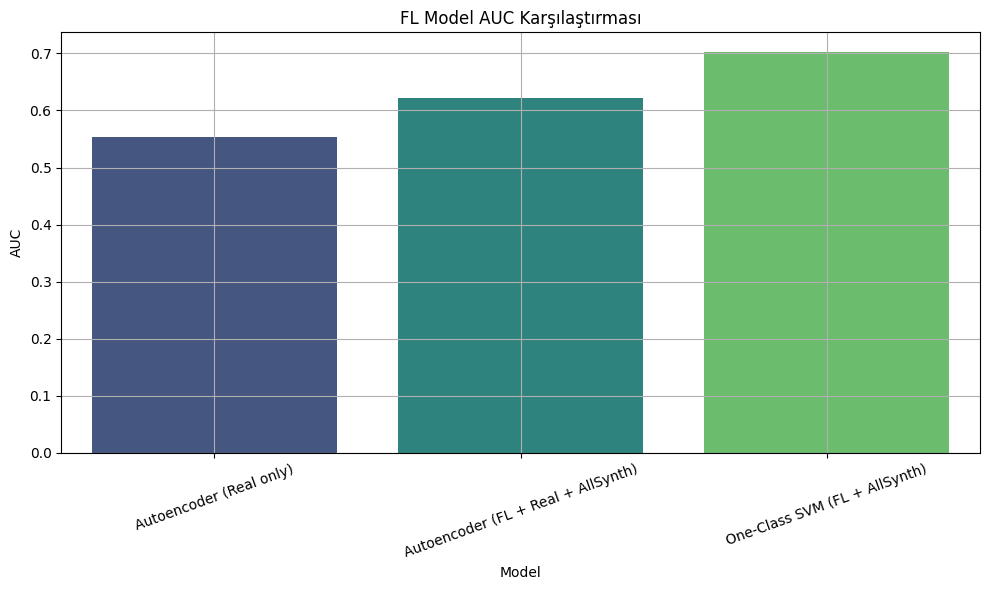

In [1]:
import pandas as pd

# 3 farklı model sonucunu tablo halinde saklıyoruz
comparison_results = pd.DataFrame([
    {
        "Model": "Autoencoder (Real only)",
        "FL": "❌",
        "GAN": "❌",
        "AUC": 0.5536,
        "Recall (Attack)": 0.03,
        "Precision (Attack)": 0.1451,
        "Notes": "Saldırıları neredeyse hiç tespit edemedi"
    },
    {
        "Model": "Autoencoder (FL + Real + AllSynth)",
        "FL": "✅",
        "GAN": "✅",
        "AUC": 0.6222,
        "Recall (Attack)": 1.00,
        "Precision (Attack)": 0.22,
        "Notes": "FL ve sentetik veri sayesinde saldırılar tamamen tespit edildi, fakat FP çok yüksek"
    },
    {
        "Model": "One-Class SVM (FL + AllSynth)",
        "FL": "✅",
        "GAN": "✅",
        "AUC": 0.7018,
        "Recall (Attack)": 0.0309,
        "Precision (Attack)": 0.1495,
        "Notes": "Saldırıları sınırlı tespit etti, AUC en yüksek"
    }
])

# Kaydet
comparison_results.to_csv("fl_model_comparison_results.csv", index=False)
print("✅ FL modeli karşılaştırma tablosu CSV olarak kaydedildi: fl_model_comparison_results.csv")

# Opsiyonel: Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_results, x="Model", y="AUC", palette="viridis")
plt.title("FL Model AUC Karşılaştırması")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# 📊 1. Data Shape Table
import pandas as pd

# Dataset dimensions
data_shapes = pd.DataFrame([
    {"Client": "Real", "Training Data Shape": "(495000, 35)"},
    {"Client": "Real+AllSynth", "Training Data Shape": "(990000, 35)"},
    {"Client": "Synthetic", "Training Data Shape": "(495000, 35)"}
])

# 📊 2. Training & Inference Times
training_times = pd.DataFrame([
    {"Client": "Real", "Total Training Time (s)": 125.15, "Inference Time (s)": 0.4437},
    {"Client": "Real+AllSynth", "Total Training Time (s)": 201.18, "Inference Time (s)": 0.6971},
    {"Client": "Synthetic", "Total Training Time (s)": 103.67, "Inference Time (s)": 0.7292}
])

# 📊 3. Classification Performance Metrics
metrics = pd.DataFrame([
    {"Client": "Real", "AUC": 0.5536, "Precision (Attack)": 0.1451, "Recall (Attack)": 0.0298, "F1 (Attack)": 0.0494, "Accuracy": 0.7458},
    {"Client": "Real+AllSynth", "AUC": 0.7018, "Precision (Attack)": 0.1495, "Recall (Attack)": 0.0309, "F1 (Attack)": 0.0511, "Accuracy": 0.7460},
    {"Client": "Synthetic", "AUC": 0.6278, "Precision (Attack)": 0.0407, "Recall (Attack)": 0.0074, "F1 (Attack)": 0.0126, "Accuracy": 0.7409},
    {"Client": "WGAN+FL AE (pooled)", "AUC": 0.6222, "Precision (Attack)": 0.2219, "Recall (Attack)": 1.0000, "F1 (Attack)": 0.3631, "Accuracy": 0.2219}
])

# 📊 4. Confusion Matrices (Text Format)
confusion_matrices = {
    "Real": "[[3132, 165], [912, 28]]",
    "Real+AllSynth": "[[3132, 165], [909, 29]]",
    "Synthetic": "[[3132, 165], [933, 7]]",
    "WGAN+FL AE (pooled)": "[[0, 3297], [0, 940]]"
}

# Save all outputs to CSV and TXT
data_shapes.to_csv("fl_data_shapes.csv", index=False)
training_times.to_csv("fl_training_times.csv", index=False)
metrics.to_csv("fl_model_metrics.csv", index=False)

with open("fl_confusion_matrices.txt", "w") as f:
    for client, matrix in confusion_matrices.items():
        f.write(f"{client} Confusion Matrix: {matrix}\n")

print("✅ All comparison tables have been saved as CSV and TXT files in English.")


✅ All comparison tables have been saved as CSV and TXT files in English.



--- Data Shape Table ---
| Client        | Training Data Shape   |
|:--------------|:----------------------|
| Real          | (495000, 35)          |
| Real+AllSynth | (990000, 35)          |
| Synthetic     | (495000, 35)          |

--- Training & Inference Times Table ---
| Client        |   Total Training Time (s) |   Inference Time (s) |
|:--------------|--------------------------:|---------------------:|
| Real          |                    125.15 |               0.4437 |
| Real+AllSynth |                    201.18 |               0.6971 |
| Synthetic     |                    103.67 |               0.7292 |


<ipython-input-4-3588241796>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=training_times, x="Client", y="Total Training Time (s)", palette="viridis")


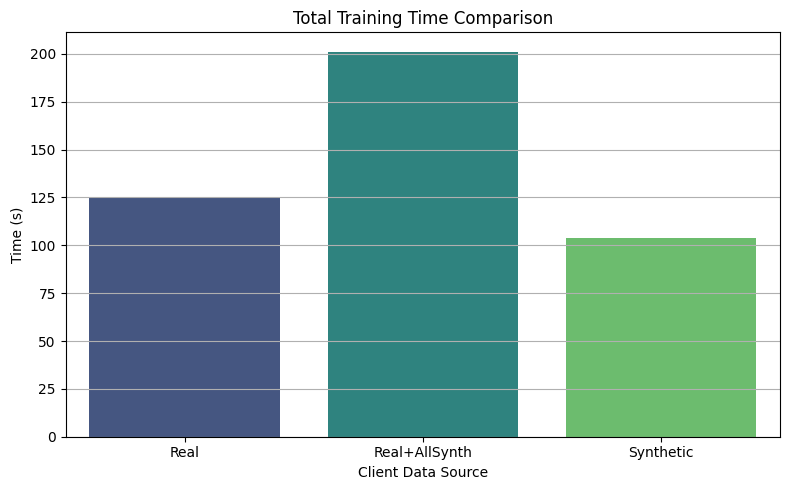

<ipython-input-4-3588241796>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=training_times, x="Client", y="Inference Time (s)", palette="plasma")


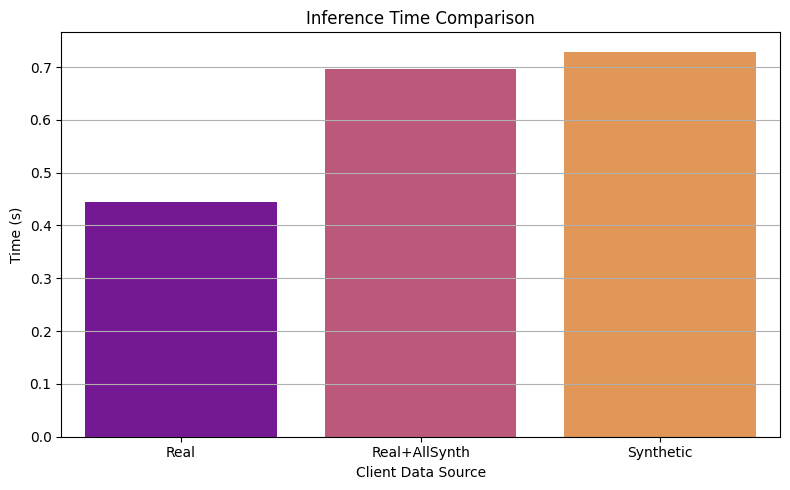


--- Classification Performance Metrics Table ---
| Client              |    AUC |   Precision (Attack) |   Recall (Attack) |   F1 (Attack) |   Accuracy |
|:--------------------|-------:|---------------------:|------------------:|--------------:|-----------:|
| Real                | 0.5536 |               0.1451 |            0.0298 |        0.0494 |     0.7458 |
| Real+AllSynth       | 0.7018 |               0.1495 |            0.0309 |        0.0511 |     0.746  |
| Synthetic           | 0.6278 |               0.0407 |            0.0074 |        0.0126 |     0.7409 |
| WGAN+FL AE (pooled) | 0.6222 |               0.2219 |            1      |        0.3631 |     0.2219 |


<ipython-input-4-3588241796>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x="Client", y="AUC", palette="mako")


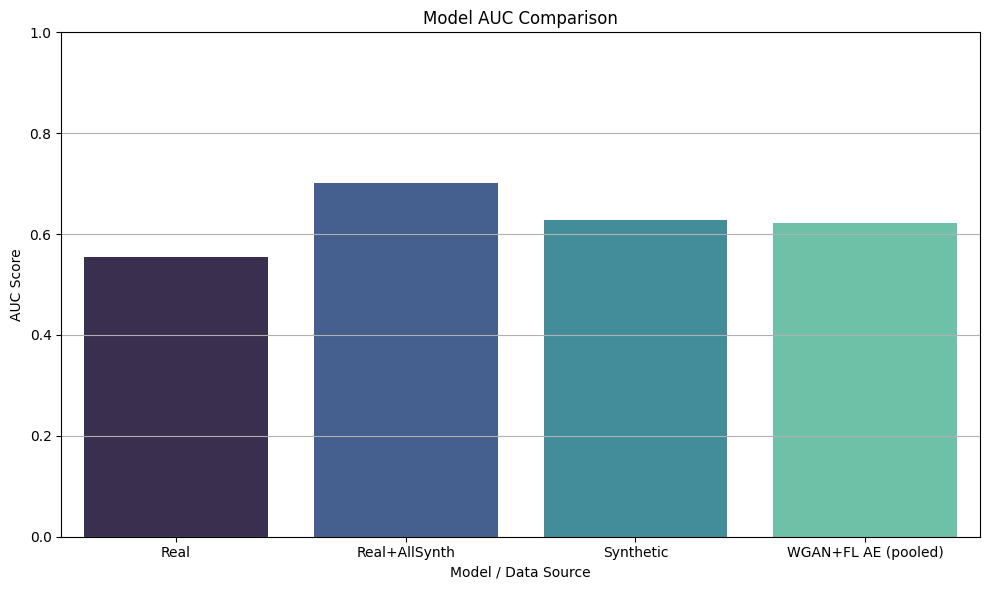

<ipython-input-4-3588241796>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x="Client", y="Recall (Attack)", palette="rocket")


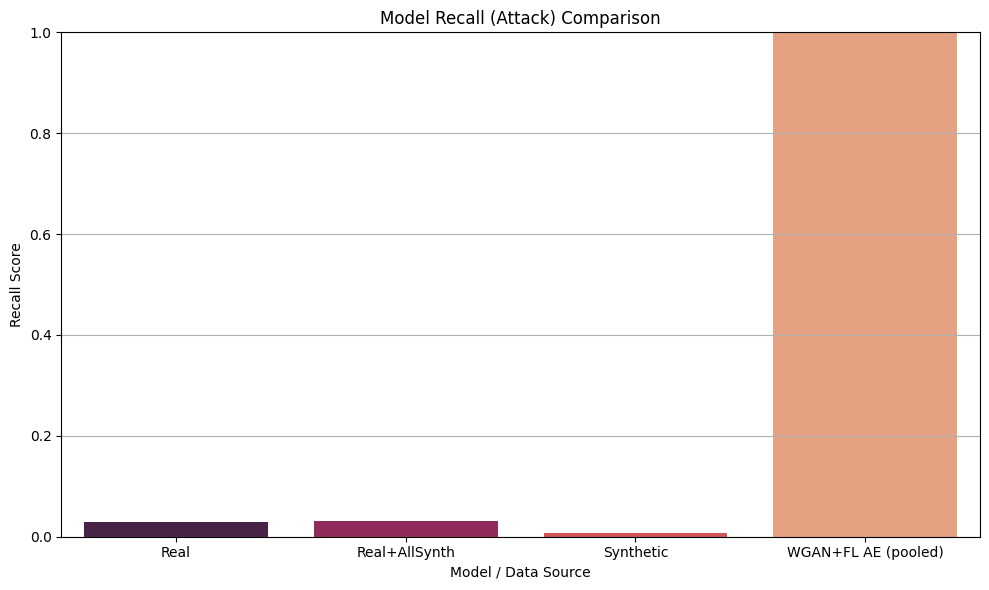

<ipython-input-4-3588241796>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x="Client", y="Precision (Attack)", palette="flare")


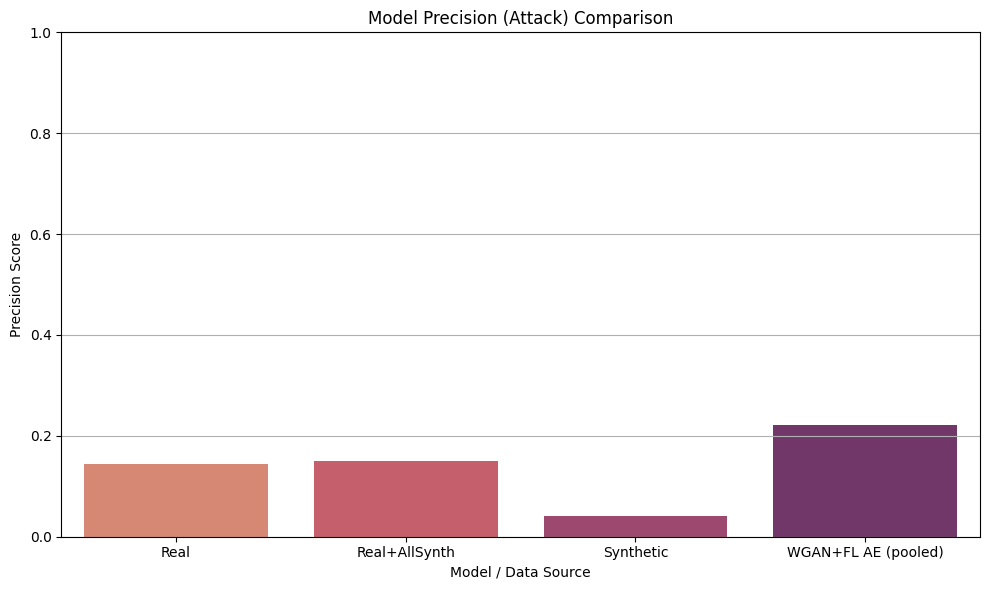

<ipython-input-4-3588241796>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x="Client", y="F1 (Attack)", palette="crest")


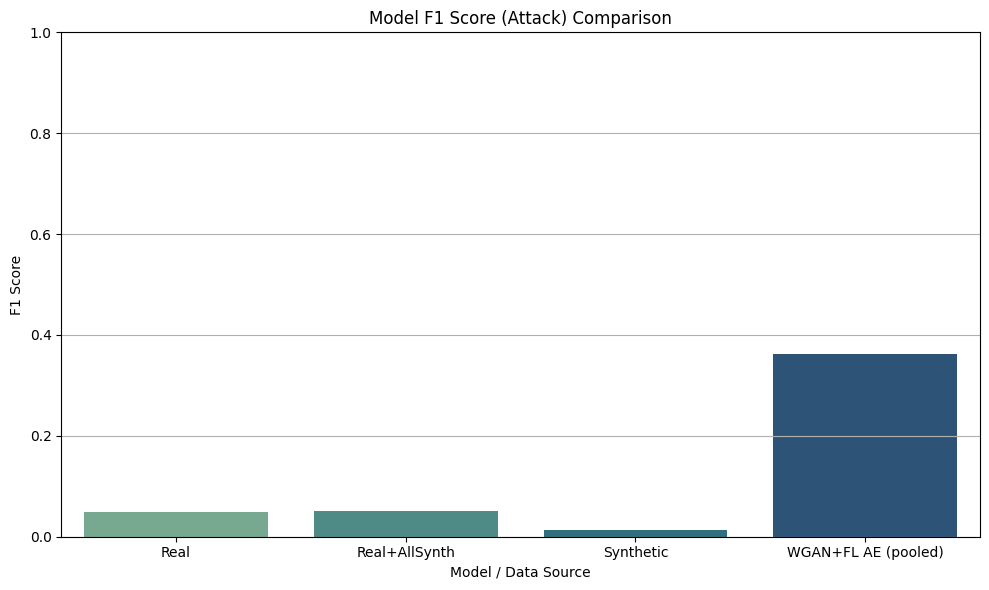

<ipython-input-4-3588241796>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x="Client", y="Accuracy", palette="viridis")


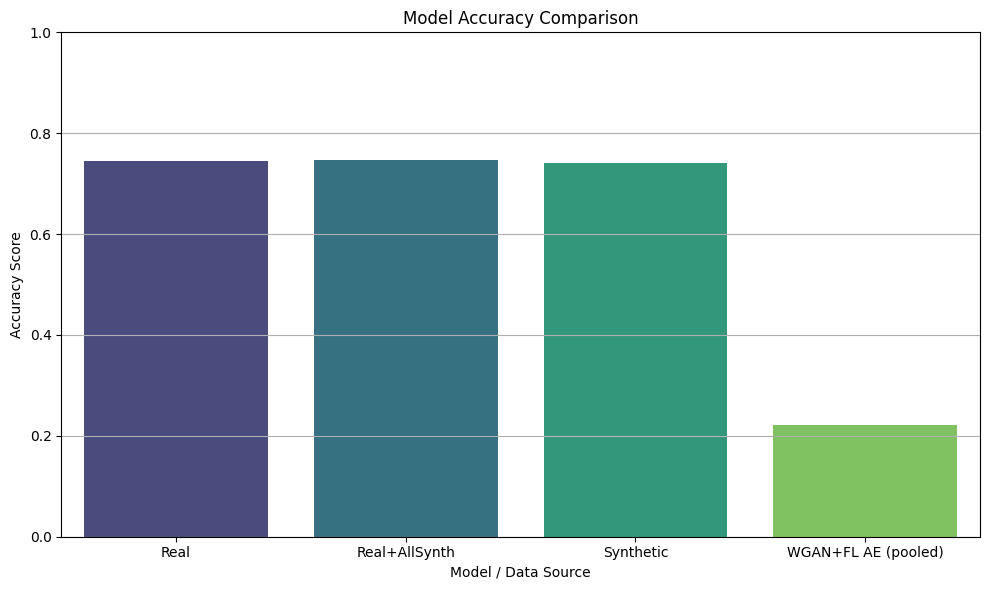


--- Confusion Matrices Visualization ---


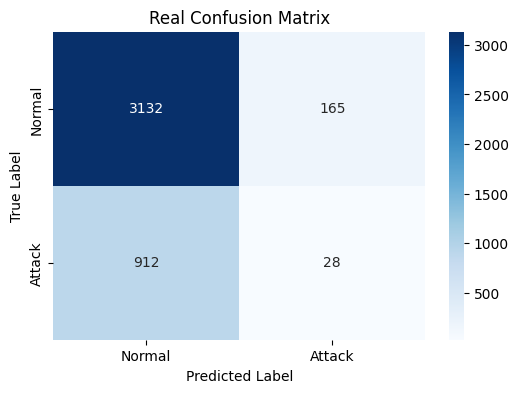

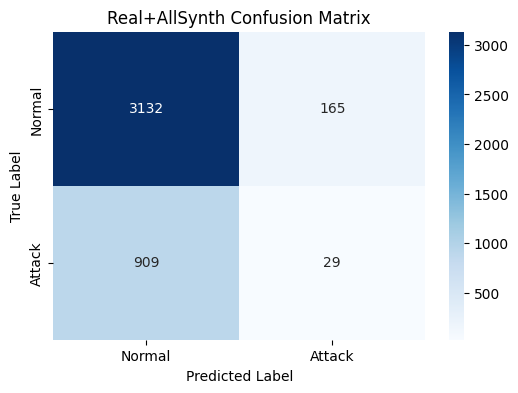

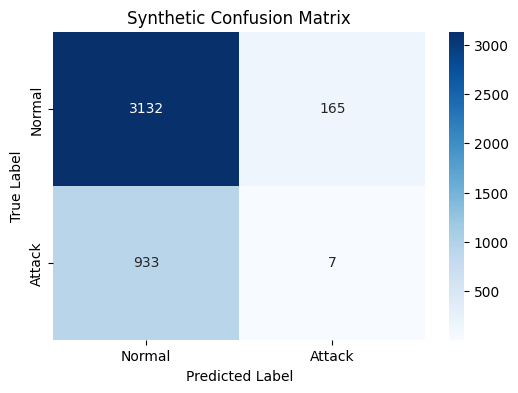

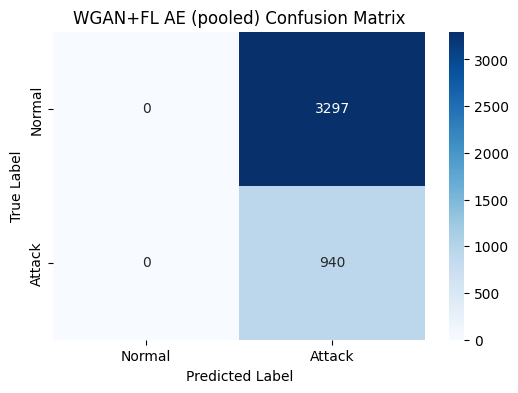


--- FL Model Comparison Table ---
| Model                              | FL   | GAN   |    AUC |   Recall (Attack) |   Precision (Attack) | Notes                                                                               |
|:-----------------------------------|:-----|:------|-------:|------------------:|---------------------:|:------------------------------------------------------------------------------------|
| Autoencoder (Real only)            | ❌   | ❌    | 0.5536 |            0.03   |               0.1451 | Saldırıları neredeyse hiç tespit edemedi                                            |
| Autoencoder (FL + Real + AllSynth) | ✅   | ✅    | 0.6222 |            1      |               0.22   | FL ve sentetik veri sayesinde saldırılar tamamen tespit edildi, fakat FP çok yüksek |
| One-Class SVM (FL + AllSynth)      | ✅   | ✅    | 0.7018 |            0.0309 |               0.1495 | Saldırıları sınırlı tespit etti, AUC en yüksek                                      |


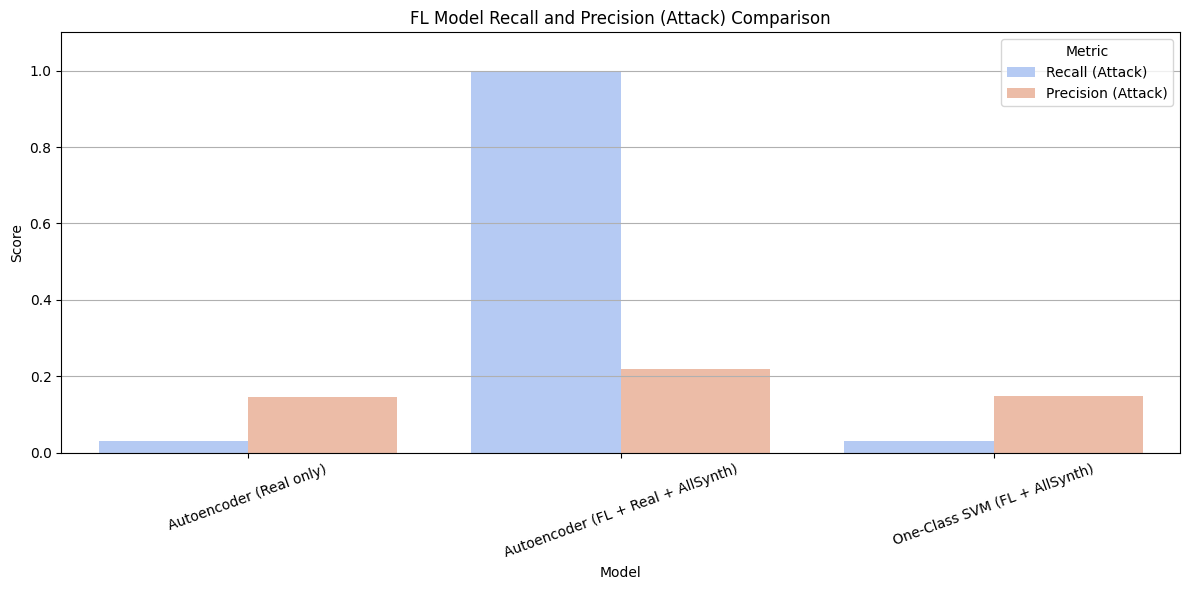

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization of Tables ---

# 📊 1. Data Shape Table Visualization
print("\n--- Data Shape Table ---")
print(data_shapes.to_markdown(index=False))

# 📊 2. Training & Inference Times Visualization
print("\n--- Training & Inference Times Table ---")
print(training_times.to_markdown(index=False))

# Bar plot for Training Time
plt.figure(figsize=(8, 5))
sns.barplot(data=training_times, x="Client", y="Total Training Time (s)", palette="viridis")
plt.title("Total Training Time Comparison")
plt.ylabel("Time (s)")
plt.xlabel("Client Data Source")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for Inference Time
plt.figure(figsize=(8, 5))
sns.barplot(data=training_times, x="Client", y="Inference Time (s)", palette="plasma")
plt.title("Inference Time Comparison")
plt.ylabel("Time (s)")
plt.xlabel("Client Data Source")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 📊 3. Classification Performance Metrics Visualization
print("\n--- Classification Performance Metrics Table ---")
print(metrics.to_markdown(index=False))

# Bar plot for AUC
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="Client", y="AUC", palette="mako")
plt.title("Model AUC Comparison")
plt.ylabel("AUC Score")
plt.xlabel("Model / Data Source")
plt.ylim(0, 1) # AUC is between 0 and 1
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for Recall (Attack)
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="Client", y="Recall (Attack)", palette="rocket")
plt.title("Model Recall (Attack) Comparison")
plt.ylabel("Recall Score")
plt.xlabel("Model / Data Source")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for Precision (Attack)
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="Client", y="Precision (Attack)", palette="flare")
plt.title("Model Precision (Attack) Comparison")
plt.ylabel("Precision Score")
plt.xlabel("Model / Data Source")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for F1 (Attack)
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="Client", y="F1 (Attack)", palette="crest")
plt.title("Model F1 Score (Attack) Comparison")
plt.ylabel("F1 Score")
plt.xlabel("Model / Data Source")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar plot for Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics, x="Client", y="Accuracy", palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model / Data Source")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 📊 4. Confusion Matrices Visualization (Using the stored text data)
print("\n--- Confusion Matrices Visualization ---")

# Function to parse the text matrix string into a numpy array
def parse_confusion_matrix_string(matrix_string):
    # Remove brackets and split by comma
    cleaned_string = matrix_string.replace('[', '').replace(']', '')
    elements = [int(x.strip()) for x in cleaned_string.split(',') if x.strip().isdigit()]
    if len(elements) == 4:
        return np.array(elements).reshape(2, 2)
    else:
        return None # Return None if parsing fails

for client, matrix_string in confusion_matrices.items():
    cm = parse_confusion_matrix_string(matrix_string)
    if cm is not None:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
        plt.title(f"{client} Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    else:
        print(f"⚠️ Could not visualize confusion matrix for {client} due to parsing error: {matrix_string}")


# 📊 5. FL Model Comparison Table Visualization (The first comparison table)
print("\n--- FL Model Comparison Table ---")
print(comparison_results.to_markdown(index=False))


# Bar plot for the first comparison table's AUC (already done above, but good to reiterate)
# plt.figure(figsize=(10, 6))
# sns.barplot(data=comparison_results, x="Model", y="AUC", palette="viridis")
# plt.title("FL Model AUC Karşılaştırması (İlk Tablo)")
# plt.xticks(rotation=20)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# You might want to visualize other metrics from this table too,
# e.g., Recall and Precision for "Attack"
plt.figure(figsize=(12, 6))
metrics_to_plot = comparison_results[['Model', 'Recall (Attack)', 'Precision (Attack)']].melt(
    id_vars='Model', var_name='Metric', value_name='Score'
)
sns.barplot(data=metrics_to_plot, x="Model", y="Score", hue="Metric", palette="coolwarm")
plt.title("FL Model Recall and Precision (Attack) Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1.1) # Allow a bit of space above 1
plt.xticks(rotation=20)
plt.legend(title="Metric")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

